# Final Project

### :מגישים 

אורי ביטון-213868797
דניאל גולדשמיד-209328244

# חשוב!
## לצורך בניית הקוד נעזרנו בצ'אט גיפיטי בחלק הטכני של מציאת הקודים המתאימים

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy.stats import zscore
from fuzzywuzzy import process
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from pyproj import Transformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
import shap


In [3]:
# URL ל-API
url = "https://data.gov.il/api/3/action/datastore_search"
resource_id = "7c8255d0-49ef-49db-8904-4cf917586031"  # מזהה המשאב

# שליחת בקשת GET
params = {"resource_id": resource_id}  # הגבלת מספר שורות
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()  # המרת התגובה ל-JSON
    records = data["result"]["records"]  # שליפת הנתונים
    data = pd.DataFrame(records)  # המרת הנתונים ל-DataFrame
     
else:
    print(f"Failed to fetch data: {response.status_code}")

# visualization


In [4]:
data.head()

_id  WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
0    1                    0                29               0               0   
1    2                    0                29               0               0   
2    3                    0                37               0               0   
3    4                    0                38               0               0   
4    5                    0                58               0               0   

   WinnersSeriesA WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
0              29                -       29                        0   
1              29                -       29                        0   
2              37                -       37                        0   
3              38                -       38                        0   
4              58                -       58                        0   

   SubscribersSeriesC  ...  LotteryStatusValue  Eligibility  MarketingRep  \
0                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
1                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
2                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
3                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   
4                   0  ...       פורסמו תוצאות     לא מוגדר         משב"ש   

   MarketingMethodDesc  MarketingMethod         CentralizationType  \
0          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
1          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
2          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
3          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
4          מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   

   ContinLotteryId ParentLotteryId  LotteryType LotteryId  
0                -               -       ראשונה      2503  
1                -               -       ראשונה      2502  
2                -               -       ראשונה      2501  
3                -               -       ראשונה      2500  
4                -               -       ראשונה      2499  

[5 rows x 40 columns]

In [5]:
data.columns

Index(['_id', 'WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'ContinLotteryId', 'ParentLotteryId', 'LotteryType', 'LotteryId'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   _id                              2294 non-null   int64 
 1   WinnersMeshapryDiur              2294 non-null   int64 
 2   WinnersHasryDiur                 2294 non-null   int64 
 3   WinnersSeriesC                   2294 non-null   int64 
 4   WinnersSeriesB                   2294 non-null   int64 
 5   WinnersSeriesA                   2294 non-null   int64 
 6   WinnersBneyMakom                 2294 non-null   object
 7   Winners                          2294 non-null   int64 
 8   SubscribersMeshapryDiur          2294 non-null   int64 
 9   SubscribersSeriesC               2294 non-null   int64 
 10  SubscribersSeriesB               2294 non-null   int64 
 11  SubscribersSeriesA               2294 non-null   int64 
 12  SubscribersDisabled              2

In [7]:
data.describe().iloc[:,0:15]

_id  WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  \
count  2294.000000          2294.000000       2294.000000     2294.000000   
mean   1147.500000             1.543156         54.149520       10.027027   
std     662.365081             5.239290         66.038418       22.196918   
min       1.000000             0.000000          0.000000        0.000000   
25%     574.250000             0.000000         14.000000        0.000000   
50%    1147.500000             0.000000         35.000000        0.000000   
75%    1720.750000             0.000000         70.750000       10.000000   
max    2294.000000            89.000000       1000.000000      337.000000   

       WinnersSeriesB  WinnersSeriesA      Winners  SubscribersMeshapryDiur  \
count     2294.000000     2294.000000  2294.000000              2294.000000   
mean         7.874019       36.248474    55.715780                83.040541   
std         19.818084       63.847399    66.329835               301.088691   
min          0.000000        0.000000     0.000000                 0.000000   
25%          0.000000        1.000000    15.000000                 0.000000   
50%          1.000000        7.000000    36.000000                 0.000000   
75%          6.000000       50.000000    73.000000                18.000000   
max        206.000000     1000.000000  1000.000000              3395.000000   

       SubscribersSeriesC  SubscribersSeriesB  SubscribersSeriesA  \
count         2294.000000         2294.000000         2294.000000   
mean           696.130776          380.311683         5114.064952   
std           1838.613617          890.176739         9316.754330   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000           42.000000   
50%              0.000000           42.500000          194.500000   
75%            380.500000          322.750000         6272.250000   
max          23866.000000         7564.000000        44435.000000   

       SubscribersDisabled  SubscribersBenyMakom   Subscribers  \
count          2294.000000           2294.000000   2294.000000   
mean              0.842197            761.407585   6273.547951   
std               2.888907           1294.946735   9062.987913   
min               0.000000              0.000000      9.000000   
25%               0.000000             96.000000    596.500000   
50%               0.000000            281.500000   2374.000000   
75%               0.000000            735.000000   7708.250000   
max              34.000000          11040.000000  44435.000000   

       LotteryNativeHousingUnits  
count                2294.000000  
mean                   21.462075  
std                    25.122397  
min                     0.000000  
25%                     4.000000  
50%                    16.000000  
75%                    29.000000  
max                   351.000000

In [8]:
data.describe().iloc[:,15:]

LotteryHousingUnits  LotterySignupHousingUnits     ProjectId  \
count          2294.000000                2294.000000  2.294000e+03   
mean             69.153444                  69.851787  4.716543e+04   
std              74.772678                  75.648122  3.264529e+04   
min               0.000000                   1.000000  1.000000e+01   
25%              20.000000                  20.000000  4.323325e+04   
50%              47.500000                  48.000000  4.817700e+04   
75%              90.000000                  93.000000  6.152325e+04   
max            1000.000000                1000.000000  1.234567e+06   

         LamasCode  MarketingMethod    LotteryId  
count  2294.000000      2294.000000  2294.000000  
mean   4312.281604        19.495205  1313.389276  
std    3232.879520         2.411942   691.074956  
min      31.000000        16.000000   101.000000  
25%    1247.000000        18.000000   720.250000  
50%    2640.000000        19.000000  1318.500000  
75%    7600.000000        19.000000  1904.750000  
max    9999.000000        90.000000  2503.000000

In [9]:
data.describe(include='O')

WinnersBneyMakom LotterySignupNativeHousingUnits PriceForMeter  \
count              2294                            2294          2294   
unique              122                             108           861   
top                   -                               -             -   
freq                543                             542            41   

       ConstructionPermitName  ProjectStatus                 ProviderName  \
count                    2294           2294                         2294   
unique                      7              4                          519   
top                  היתר מלא  בתהליכי הגרלה  דונה חברה להנדסה ובנין בע"מ   
freq                     1491           1096                           65   

       ProjectName Neighborhood LamasName LotteryExecutionDate  \
count         2294         2294      2294                 2293   
unique         394          212       111                 2201   
top           מזרח         מזרח    אשקלון  2018-12-16 10:04:31   
freq            94          107       189                   31   

       LotteryEndSignupDate LotteryStatusValue       Eligibility MarketingRep  \
count                  2294               2294              2294         2294   
unique                  155                  3                 5            2   
top     2022-10-04 00:00:00      פורסמו תוצאות  חסרי ומשפרי דיור        משב"ש   
freq                    150               2262               675         1397   

       MarketingMethodDesc CentralizationType ContinLotteryId ParentLotteryId  \
count                 2294               2294            2294            2294   
unique                   2                 21             998             998   
top            מחיר למשתכן                  -               -               -   
freq                  2282                687            1297            1297   

       LotteryType  
count         2294  
unique           2  
top         ראשונה  
freq          1297

we can see that some columns are object because of the way they wrote the nulls,lets fix that

In [10]:
data.replace('-', np.nan, inplace=True)
data.replace('לא מוגדר', None, inplace=True)    

In [11]:
#turning any optional column to numeric as for wexample priceformeter
for col in data.columns:
            if data[col].dtype == 'object':  # Only check non-numeric columns
                # Check if all non-null values can be converted to numeric
                if data[col].dropna().apply(lambda x: x.replace(',', '').replace('.', '', 1).replace('-', '', 1).isdigit()).all():
                    # Try converting to numeric, safely handling number-like strings
                    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

In [12]:
data=data.drop('_id',axis=1)

bney makom and hasrey diur are part of serieses a,b,c
lets check that:

In [13]:
data_no_nulls = data.dropna(subset=['WinnersHasryDiur'])


In [14]:
len(data_no_nulls)

2294

In [15]:
#922 times WinnersHasreyDiur is the same as winnersSeriesA
len(data_no_nulls[data_no_nulls['WinnersHasryDiur']==data_no_nulls['WinnersSeriesA']])

922

In [16]:
lst_total_winners=data['WinnersSeriesA']+data['WinnersSeriesB']+data['WinnersSeriesC']+data['WinnersMeshapryDiur']
a=lst_total_winners==data['Winners']
a.value_counts()
#we dont need the winners column for the model

True     2286
False       8
Name: count, dtype: int64

In [17]:
a[a==False].index

Index([423, 466, 937, 1409, 2011, 2015, 2275, 2293], dtype='int64')

In [18]:
#lets drop those rows:
data=data.drop([423, 466, 937, 1409, 2011, 2015, 2275, 2293],axis=0)

In [19]:
lst_total_subs=data['SubscribersSeriesA']+data['SubscribersSeriesB']+data['SubscribersSeriesC']+data['SubscribersMeshapryDiur']
w=lst_total_subs==data['Subscribers']
w.value_counts()
#len(lst_total_subs==data['Subscribers'])
#we dont need the subs column for the model

True    2286
Name: count, dtype: int64

#overall serieses a,b,c ae representing all the winners and include the hasrey+bneymakom
#so for the model we will drop hasrey and bney makom from the subscribers and the winners(from the model only)
#plus we will drop the columns subscribers and winners also (for the model only)


In [20]:
#we can see that in the lotteryhouses columns the min is 0 which is odd. lets take a look
data[data['LotteryHousingUnits']==0]
#lets drop that row
data=data.drop(1888,axis=0)

In [21]:
#converting all  the categorial columns which is np.number to objects

data['ProjectId'] = data['ProjectId'].astype('object')
data['LotteryId'] = data['LotteryId'].astype('object')
data['MarketingMethod'] = data['MarketingMethod'].astype('object')
data['LamasCode'] = data['LamasCode'].astype('object')

In [22]:
#converting the date columns to datetime
data['LotteryExecutionDate'] = pd.to_datetime(data['LotteryExecutionDate'])
data['LotteryEndSignupDate'] = pd.to_datetime(data['LotteryEndSignupDate'])

# Handle missing values


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2285 entries, 0 to 2292
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   WinnersMeshapryDiur              2285 non-null   int64         
 1   WinnersHasryDiur                 2285 non-null   int64         
 2   WinnersSeriesC                   2285 non-null   int64         
 3   WinnersSeriesB                   2285 non-null   int64         
 4   WinnersSeriesA                   2285 non-null   int64         
 5   WinnersBneyMakom                 1746 non-null   float64       
 6   Winners                          2285 non-null   int64         
 7   SubscribersMeshapryDiur          2285 non-null   int64         
 8   SubscribersSeriesC               2285 non-null   int64         
 9   SubscribersSeriesB               2285 non-null   int64         
 10  SubscribersSeriesA               2285 non-null   int64         
 

In [24]:
#we can see we have too many nulls in contin and parant lotteries so we will drop those columns
data=data.drop(['ParentLotteryId','ContinLotteryId'],axis=1)

In [25]:
#lets see the distributions of the columns with nulls do decide how to fill the missing values:
def plot_missing(data):
    # Filter columns with missing values
    missing_cols = data.columns[data.isnull().any()].tolist()
    num_cols = data[missing_cols].select_dtypes(include=np.number).columns.tolist()
    obj_cols = data[missing_cols].select_dtypes(include=object).columns.tolist()

    for label in num_cols:
        sns.boxplot(data=data, x=label)
        plt.title(f"Distribution of {label} (Missing Values Present)")
        plt.show()

    for label in obj_cols:
        num_categories = data[label].nunique()
        if num_categories <= 10:
            # Create a dynamic color palette for categories
            custom_colors = sns.color_palette("husl", num_categories)
            sns.countplot(data=data, x=label, palette=custom_colors)
            plt.title(f"Count of {label} (Missing Values Present)")
            plt.show()
    

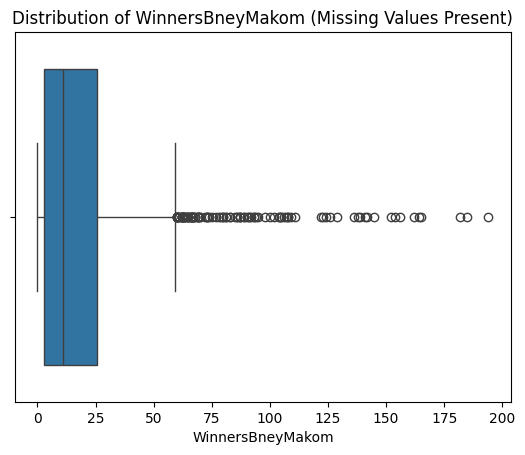

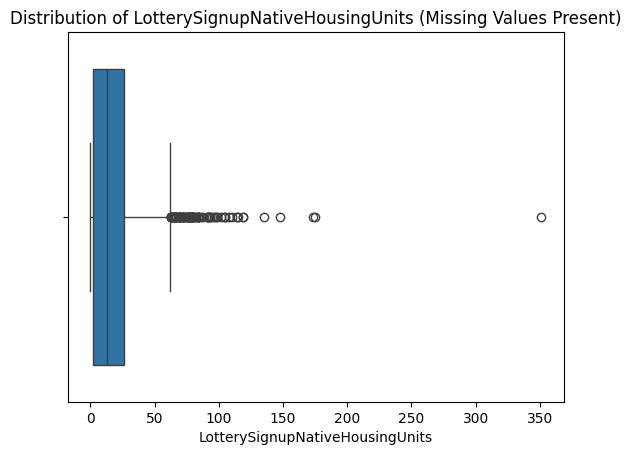

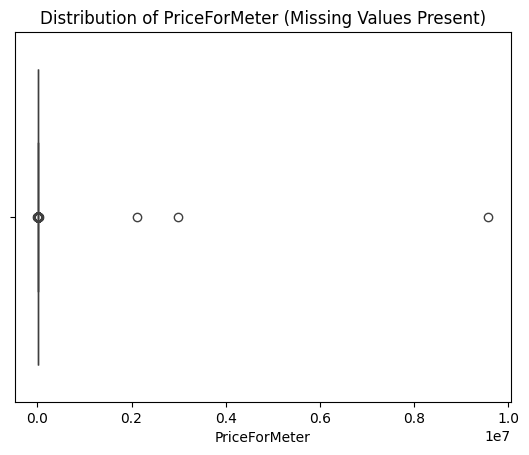

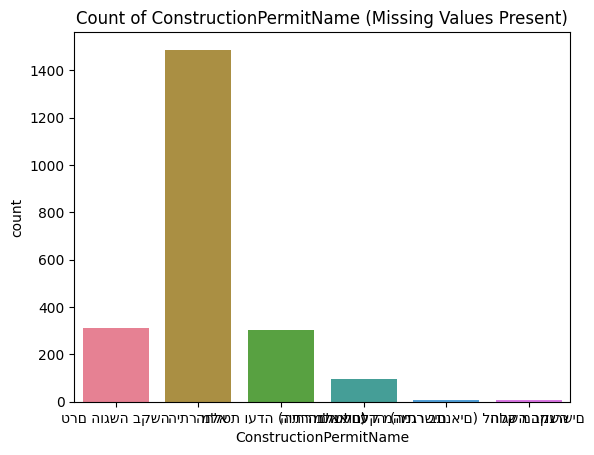

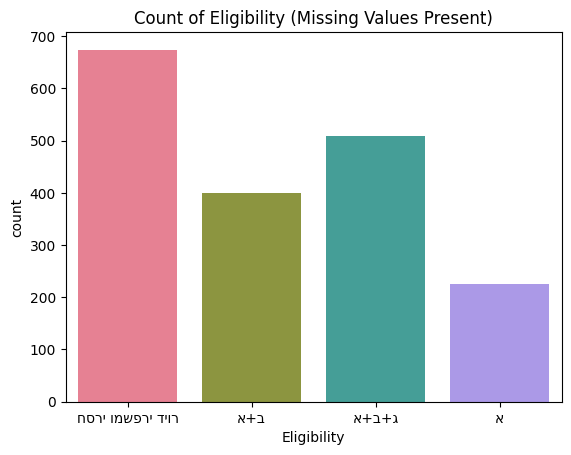

In [26]:
plot_missing(data)

In [27]:
#we can see that for the numeric columns we have many outliers therefore we will fill with the median
#for the categorial columns we will fill with the most frequent value
obj_cols = data.select_dtypes(include='object').columns
for col in obj_cols:
    most_frequent = data[col].mode()[0]
    data[col].fillna(most_frequent, inplace=True)

for i in data.index:
    data['WinnersBneyMakom']=data['WinnersBneyMakom'].fillna(min([data['WinnersBneyMakom'].median(),data.loc[i,'Winners']]))

for i in data.index:
    data['LotterySignupNativeHousingUnits']=data['LotterySignupNativeHousingUnits'].fillna(min([data['LotterySignupNativeHousingUnits'].median(),data.loc[i,'LotterySignupHousingUnits']]))
    
data['PriceForMeter']=data['PriceForMeter'].fillna(data['PriceForMeter'].median())




In [28]:
data[data['WinnersBneyMakom']>data['Winners']]

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
394                    0                 9               0               0   
414                    0                 5               0               0   
415                    0                10               0               0   
633                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
394               9              11.0        9                        0   
414               5              11.0        5                        0   
415              10              11.0       10                        0   
633               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
394                   0                   0  ...   2022-07-25 20:42:46   
414                   0                   0  ...   2022-07-25 18:16:20   
415                   0                   0  ...   2022-07-25 18:09:21   
633                   0                   0  ...   2022-04-26 13:06:56   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
394            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
414            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
415            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
633            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod    CentralizationType  LotteryType  \
394          מחיר למשתכן               21             יולי 2022       ראשונה   
414          מחיר למשתכן               21             יולי 2022       ראשונה   
415          מחיר למשתכן               21             יולי 2022       ראשונה   
633          מחיר למשתכן               21  הגרלה גדולה מרץ 2022       ראשונה   

    LotteryId  
394      2104  
414      2084  
415      2083  
633      1844  

[4 rows x 37 columns]

In [29]:
data[data['LotterySignupNativeHousingUnits']>data['LotterySignupHousingUnits']]

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
25                     0                11               0               0   
270                    0                12               0               0   
394                    0                 9               0               0   
414                    0                 5               0               0   
415                    0                10               0               0   
416                    0                11               0               0   
417                    0                11               0               0   
524                    0                12               0               0   
633                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
25               11              11.0       11                        0   
270              12              11.0       12                        0   
394               9              11.0        9                        0   
414               5              11.0        5                        0   
415              10              11.0       10                        0   
416              11              11.0       11                        0   
417              11              11.0       11                        0   
524              12              11.0       12                        0   
633               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
25                    0                   0  ...   2024-11-11 13:26:29   
270                   0                   0  ...   2023-01-16 17:03:22   
394                   0                   0  ...   2022-07-25 20:42:46   
414                   0                   0  ...   2022-07-25 18:16:20   
415                   0                   0  ...   2022-07-25 18:09:21   
416                   0                   0  ...   2022-07-25 18:04:31   
417                   0                   0  ...   2022-07-25 18:00:13   
524                   0                   0  ...   2022-04-28 13:11:49   
633                   0                   0  ...   2022-04-26 13:06:56   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
25             2024-03-11       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
270            2023-08-01       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
394            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
414            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
415            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
416            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
417            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
524            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   
633            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod         CentralizationType  \
25           מחיר למשתכן               23  הגרלה גדולה - ספטמבר 2024   
270          מחיר למשתכן               23           הגרלת דצמבר 2022   
394          מחיר למשתכן               21                  יולי 2022   
414          מחיר למשתכן               21                  יולי 2022   
415          מחיר למשתכן               21                  יולי 2022   
416          מחיר למשתכן               21                  יולי 2022   
417          מחיר למשתכן               21                  יולי 2022   
524          מחיר למשתכן               21       הגרלה גדולה מרץ 2022   
633          מחיר למשתכן               21       הגרלה גדולה מרץ 2022   

     LotteryType LotteryId  
25        ראשונה      2478  
270       ראשונה      2229  
394       ראשונה      2104  
414       ראשונה      2084  
415       ראשונה      2083  
416       ראשונה      2082

# Handle outliers

firs of all as we can see from the data above there is some impossible rows in the data where for example Winners value isn't the biggest one out of all the winners columns.
lets handle that

In [30]:
rows_not_greater = data[data[['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom']].gt(data['Winners'], axis=0).any(axis=1)]

In [31]:
rows_not_greater

WinnersMeshapryDiur  WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  \
394                    0                 9               0               0   
414                    0                 5               0               0   
415                    0                10               0               0   
633                    0                 8               0               0   

     WinnersSeriesA  WinnersBneyMakom  Winners  SubscribersMeshapryDiur  \
394               9              11.0        9                        0   
414               5              11.0        5                        0   
415              10              11.0       10                        0   
633               8              11.0        8                        0   

     SubscribersSeriesC  SubscribersSeriesB  ...  LotteryExecutionDate  \
394                   0                   0  ...   2022-07-25 20:42:46   
414                   0                   0  ...   2022-07-25 18:16:20   
415                   0                   0  ...   2022-07-25 18:09:21   
633                   0                   0  ...   2022-04-26 13:06:56   

     LotteryEndSignupDate  LotteryStatusValue       Eligibility  MarketingRep  \
394            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
414            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
415            2022-07-17       פורסמו תוצאות  חסרי ומשפרי דיור         משב"ש   
633            2022-10-04       פורסמו תוצאות             א+ב+ג         משב"ש   

     MarketingMethodDesc  MarketingMethod    CentralizationType  LotteryType  \
394          מחיר למשתכן               21             יולי 2022       ראשונה   
414          מחיר למשתכן               21             יולי 2022       ראשונה   
415          מחיר למשתכן               21             יולי 2022       ראשונה   
633          מחיר למשתכן               21  הגרלה גדולה מרץ 2022       ראשונה   

    LotteryId  
394      2104  
414      2084  
415      2083  
633      1844  

[4 rows x 37 columns]

In [32]:
data=data.drop(rows_not_greater.index,axis=0)

In [33]:
data.columns

Index(['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'LotteryStatusValue', 'Eligibility', 'MarketingRep',
       'MarketingMethodDesc', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId'],
      dtype='object')

In [34]:
rows_not_greater = data[data[['SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom']].gt(data['Subscribers'], axis=0).any(axis=1)]

In [35]:
rows_not_greater

Empty DataFrame
Columns: [WinnersMeshapryDiur, WinnersHasryDiur, WinnersSeriesC, WinnersSeriesB, WinnersSeriesA, WinnersBneyMakom, Winners, SubscribersMeshapryDiur, SubscribersSeriesC, SubscribersSeriesB, SubscribersSeriesA, SubscribersDisabled, SubscribersBenyMakom, Subscribers, LotteryNativeHousingUnits, LotteryHousingUnits, LotterySignupNativeHousingUnits, LotterySignupHousingUnits, PriceForMeter, ConstructionPermitName, ProjectStatus, ProviderName, ProjectName, ProjectId, Neighborhood, LamasName, LamasCode, LotteryExecutionDate, LotteryEndSignupDate, LotteryStatusValue, Eligibility, MarketingRep, MarketingMethodDesc, MarketingMethod, CentralizationType, LotteryType, LotteryId]
Index: []

[0 rows x 37 columns]

In [36]:
rows_not_greater = data[data[['LotteryNativeHousingUnits']].gt(data['LotteryHousingUnits'], axis=0).any(axis=1)]

In [37]:
rows_not_greater[['LotteryHousingUnits','LotteryNativeHousingUnits']]

LotteryHousingUnits  LotteryNativeHousingUnits
2035                   56                         92

In [38]:
data=data.drop(2035,axis=0)

In [39]:
rows_not_greater = data[data[['LotterySignupNativeHousingUnits']].gt(data['LotterySignupHousingUnits'], axis=0).any(axis=1)]

In [40]:
rows_not_greater[['LotterySignupNativeHousingUnits','LotterySignupHousingUnits']]

LotterySignupNativeHousingUnits  LotterySignupHousingUnits
25                              13.0                         11
270                             13.0                         12
416                             13.0                         11
417                             13.0                         11
524                             13.0                         12

In [41]:
data=data.drop(rows_not_greater.index,axis=0)

In [42]:
#lets see the distributions of our columns to detect outliers
def plot_everything(data):
    num_cols = data.select_dtypes(include=np.number).columns.tolist()
    obj_cols = data.select_dtypes(include=object).columns.tolist()
    

    for label in num_cols:
        sns.boxplot(data=data, x=label)
        plt.title(f"Distribution of {label}")
        plt.show()
        
    for label in num_cols:
        sns.histplot(data=data, x=label)
        plt.title(f"Distribution of {label}")
        plt.show()

    for label in obj_cols:
        # מספר הקטגוריות בנתונים
        num_categories = data[label].nunique()
        if num_categories<=10:
            # יצירת פלטת צבעים דינמית בהתאמה למספר הקטגוריות
            custom_colors = sns.color_palette("husl", num_categories)  # "husl" נותן צבעים מגוונים
            sns.countplot(data=data, x=label, palette=custom_colors)
            plt.title(f"Count of {label}")
            plt.show()
    

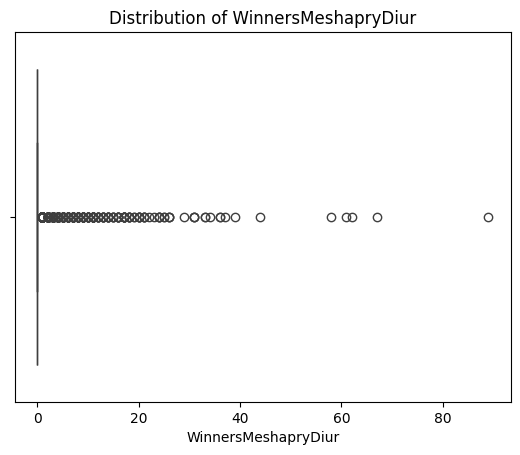

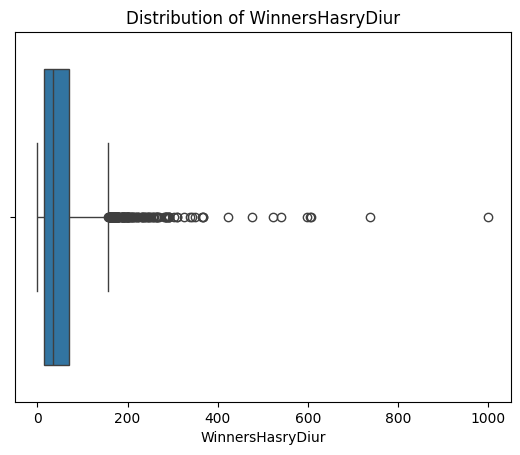

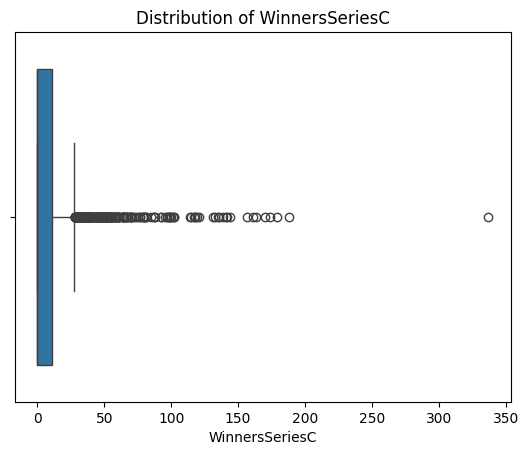

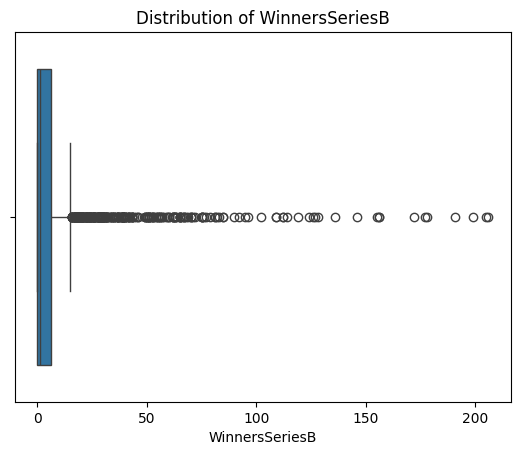

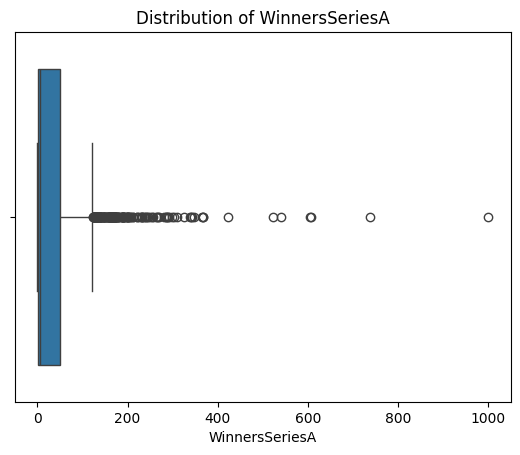

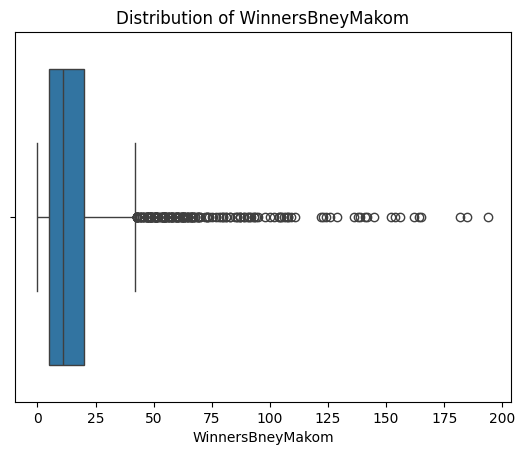

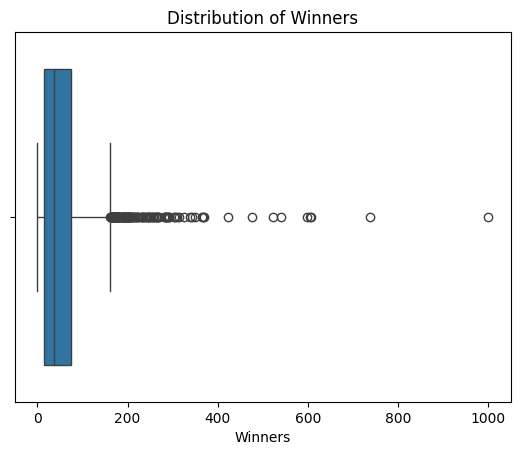

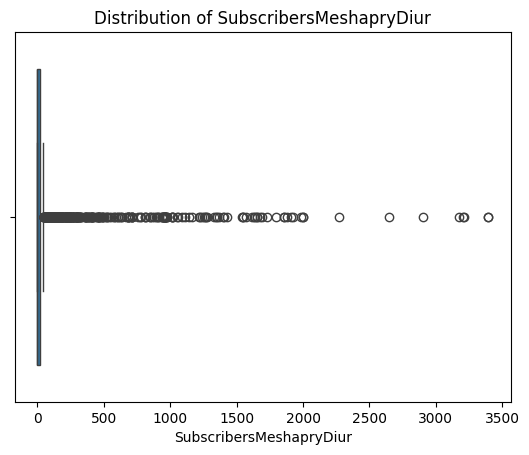

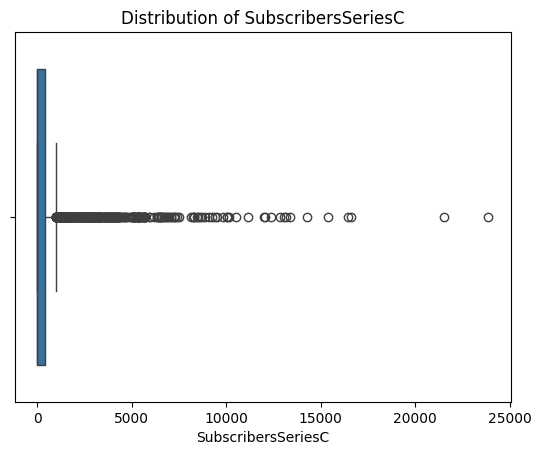

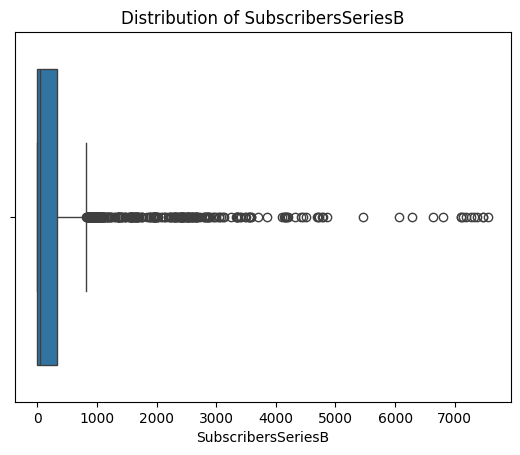

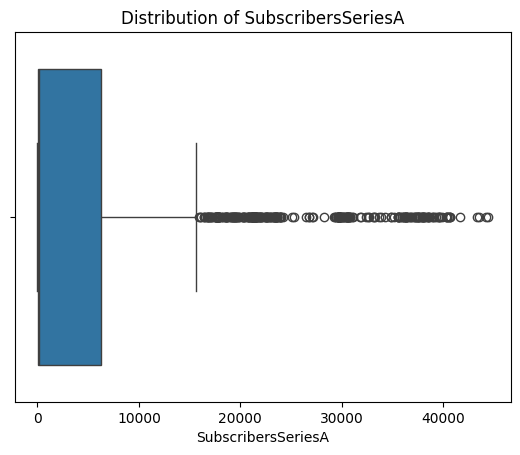

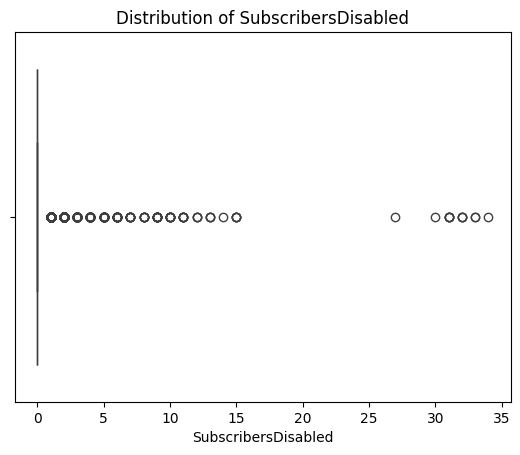

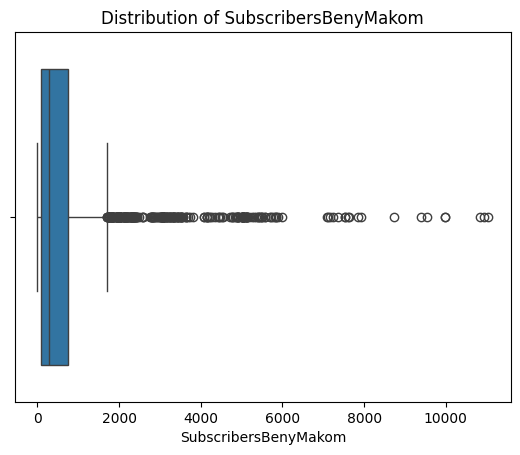

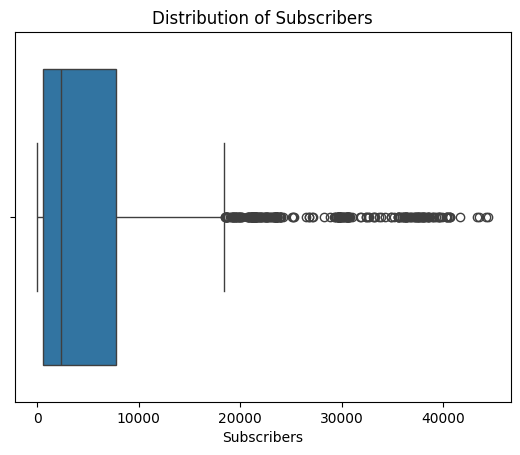

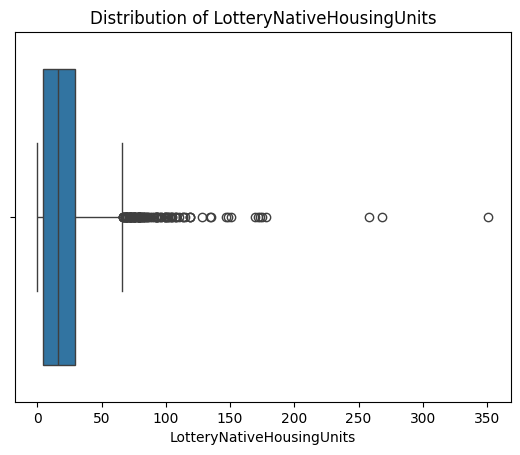

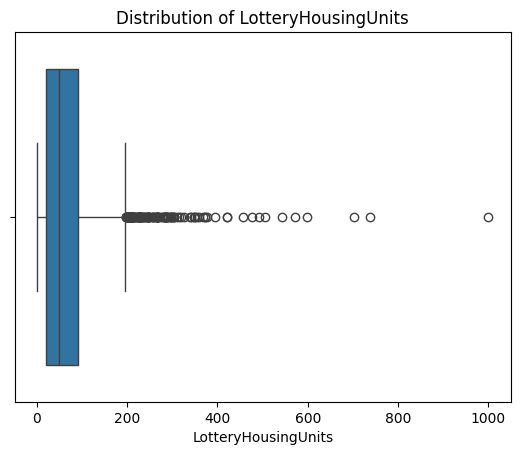

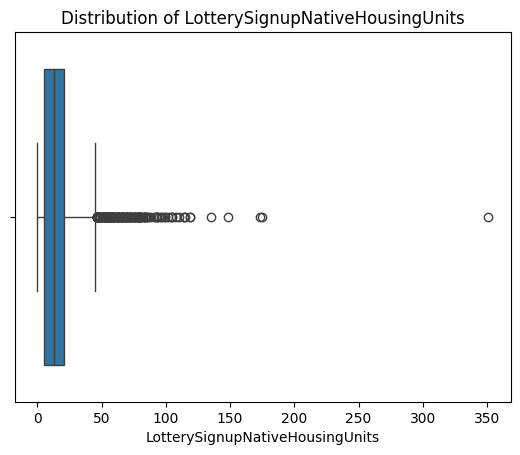

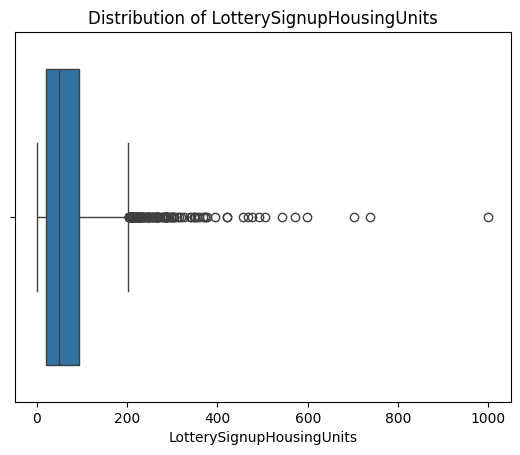

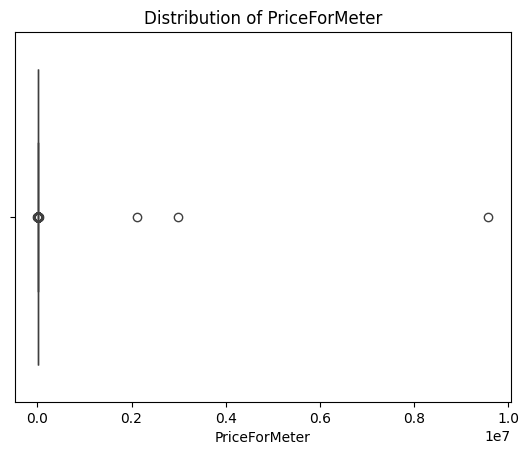

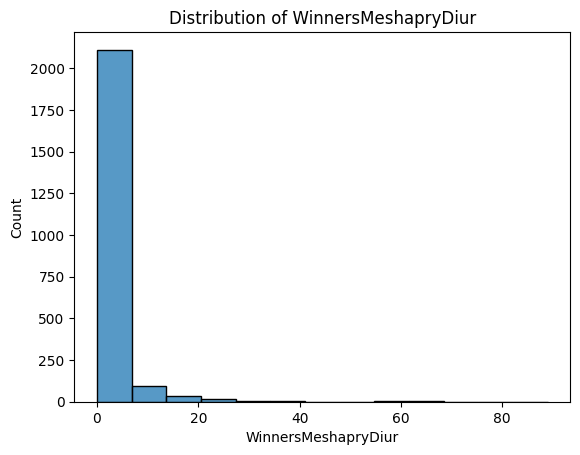

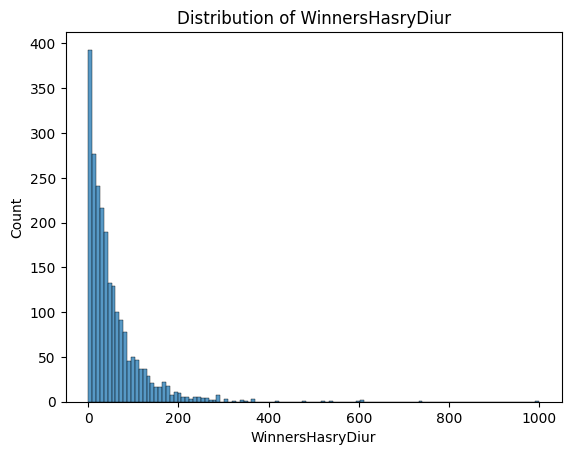

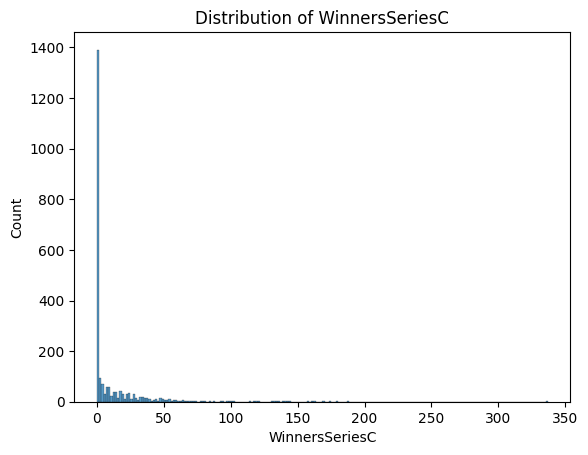

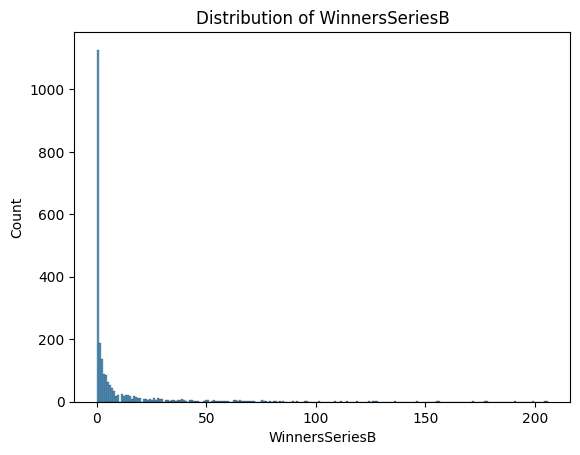

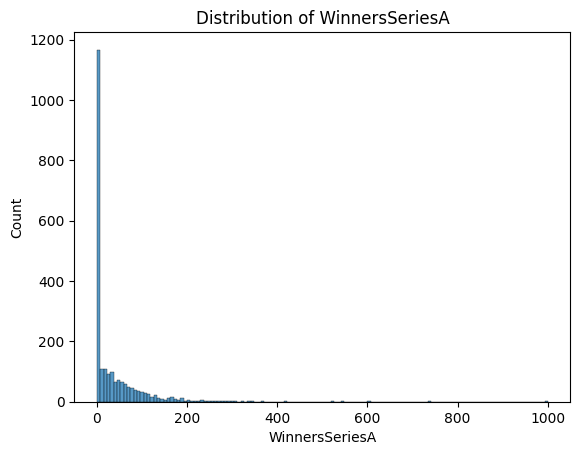

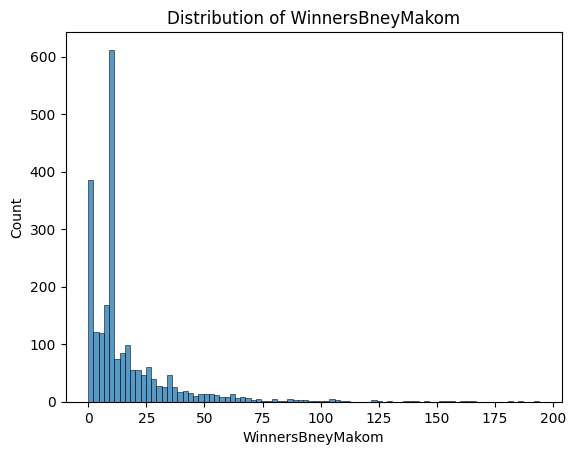

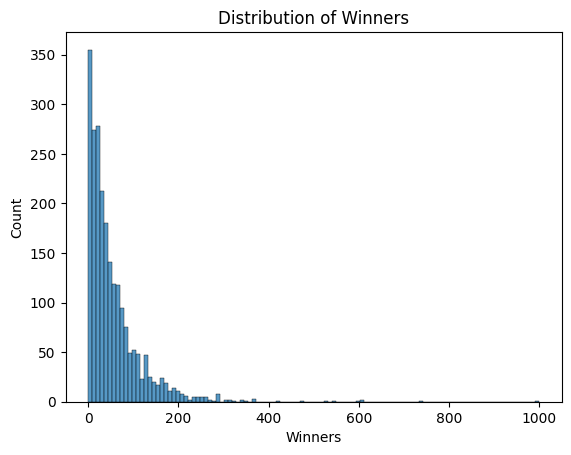

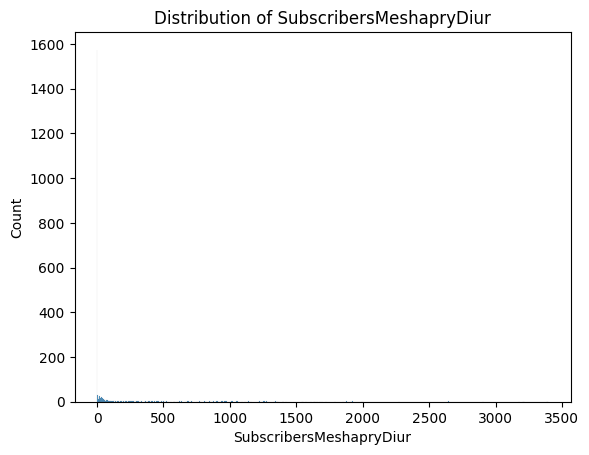

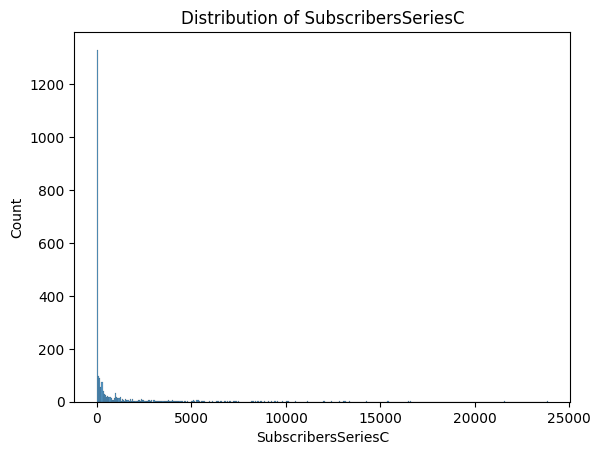

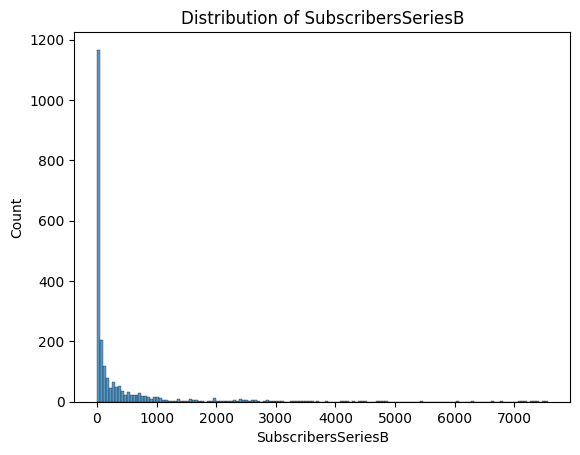

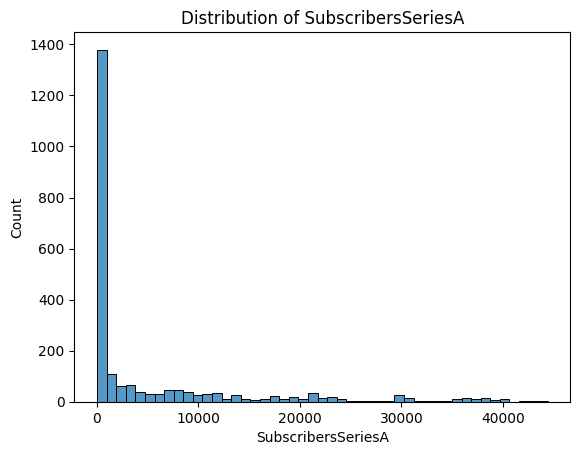

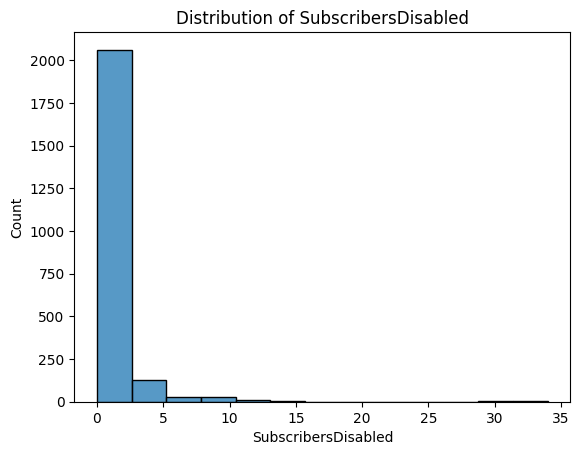

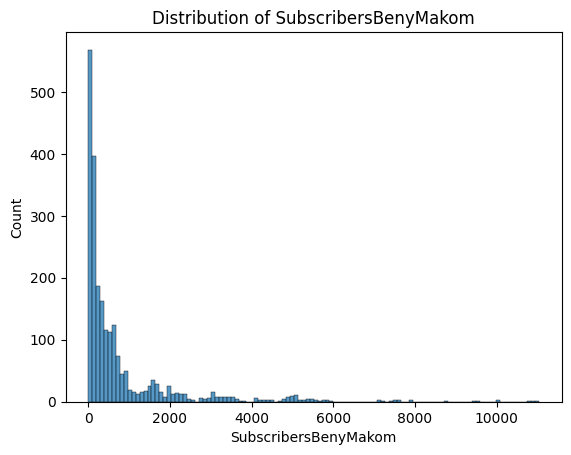

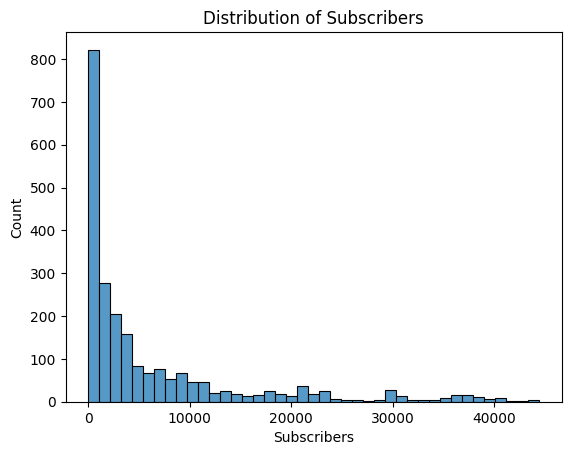

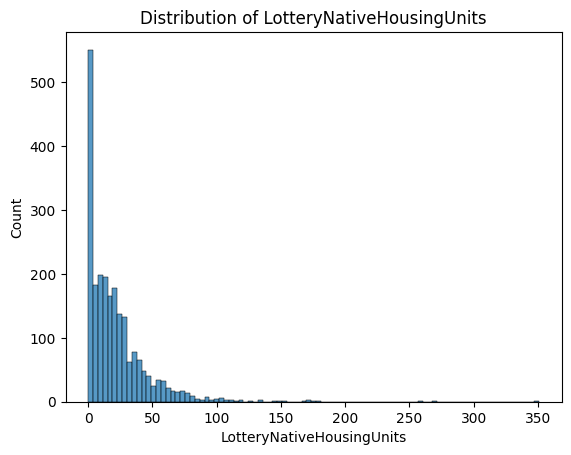

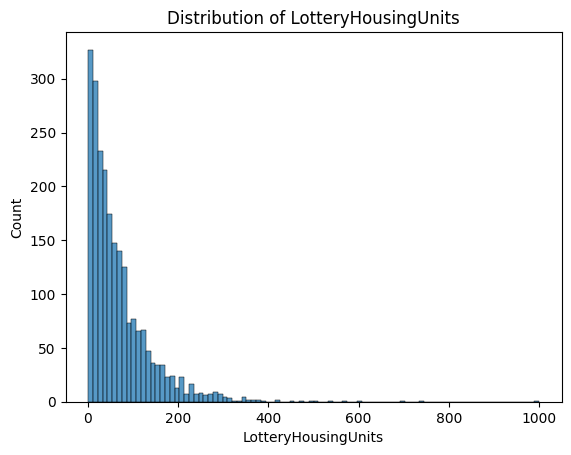

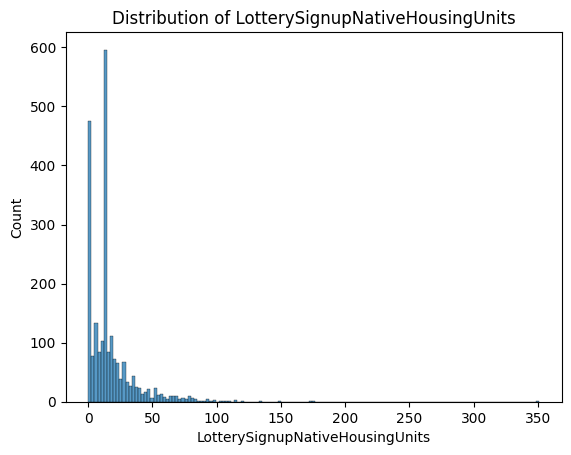

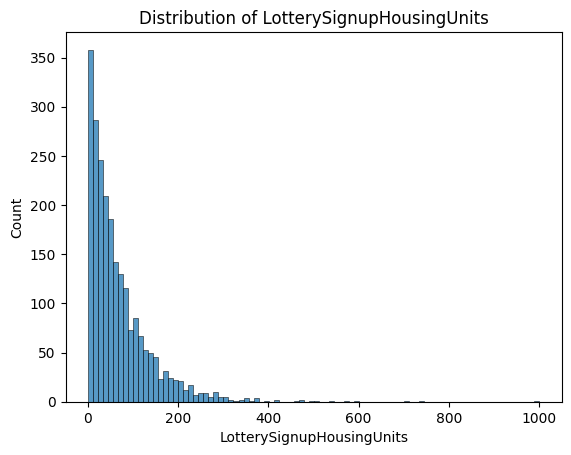

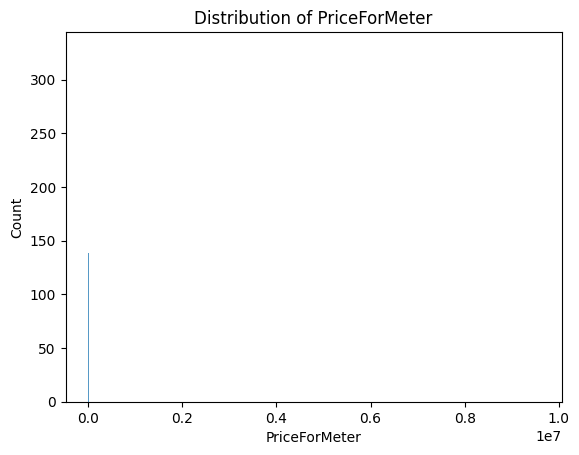

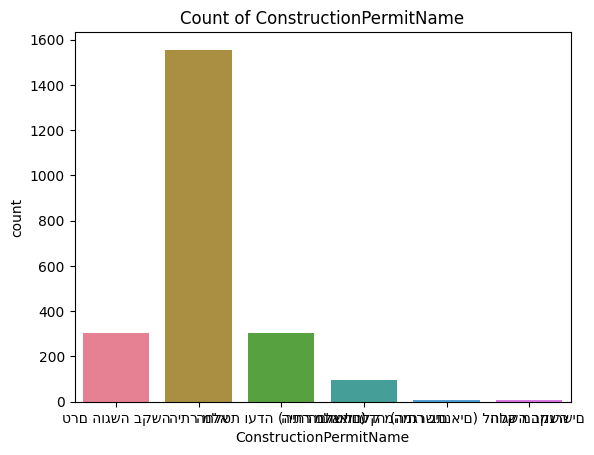

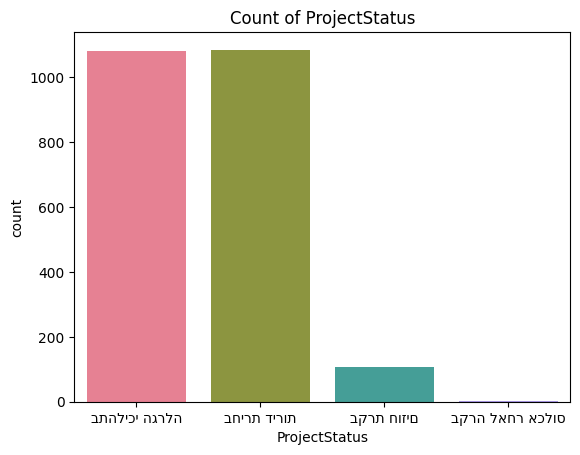

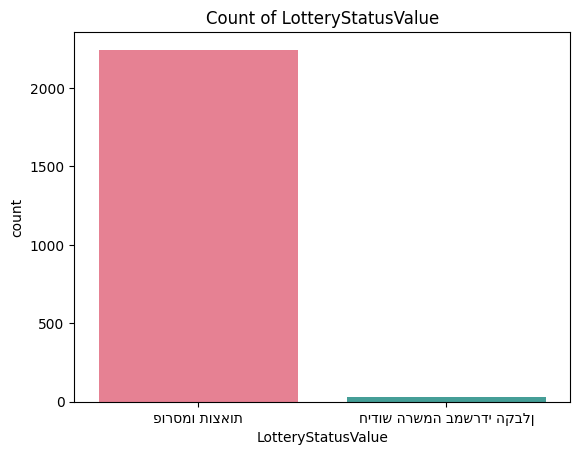

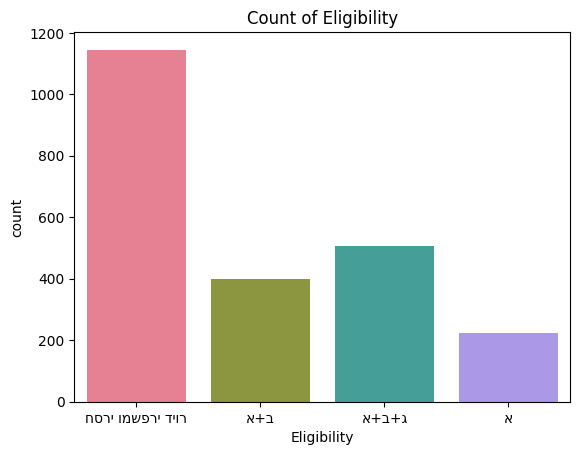

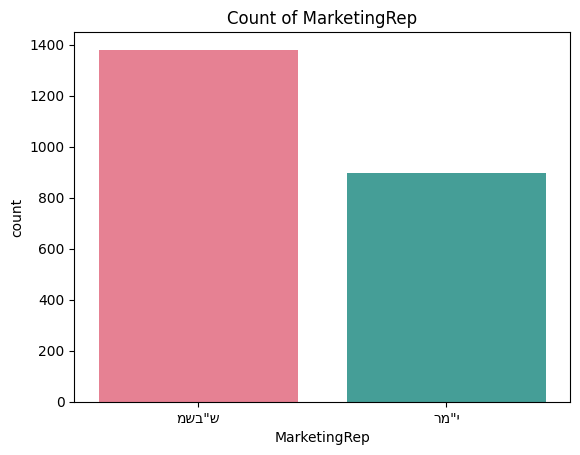

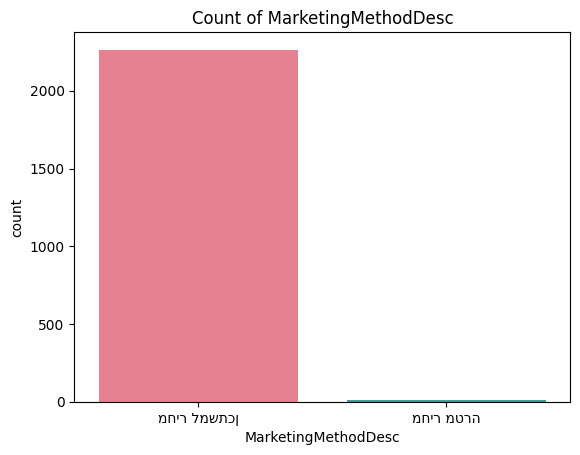

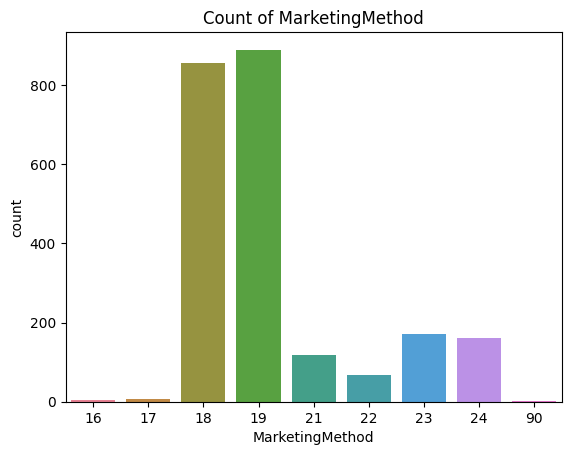

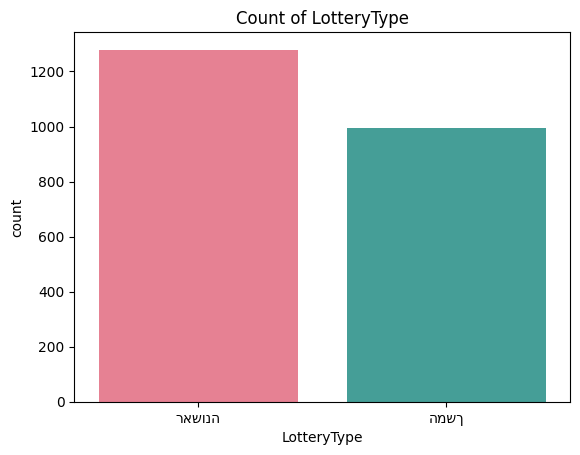

In [43]:
plot_everything(data)

In [44]:
num_cols=data.select_dtypes(include=[np.number]).columns

## detecting general outliers based 3 different models (Isolation Forest, OneClassSVM, LOF). and plotting the outliers only if all of the models detected them as outliers

In [45]:
def process_and_identify_outliers(data, contamination=0.05):
    # Step 1: Fill missing values with median for numeric and mode for categorical
    def fill_missing_values(df):
        for col in df.columns:
            if df[col].dtype in ['int64', 'float64']:  # Numeric column
                df[col].fillna(df[col].median(), inplace=True)
            else:  # Categorical column
                df[col].fillna(df[col].mode()[0], inplace=True)
        return df
    
    data = fill_missing_values(data)
    
    # Step 2: Convert datetime columns to categorical (object)
    def convert_datetime_columns(df):
        for col in df.select_dtypes(include=['datetime64[ns]']).columns:
            df[col] = df[col].astype('object')  # Convert datetime columns to categorical
        return df

    data = convert_datetime_columns(data)
    
    # Step 3: Separate numeric and categorical columns
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    
    # Save original data for later
    original_data = data.copy()  # Save original data
    
    # Step 4: Apply get_dummies to categorical columns to convert to one-hot encoding
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
    
    # Step 5: Normalize the numeric data
    scaler = StandardScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])  # Normalize numeric columns
    
    # Step 6: Apply PCA to reduce dimensionality to 2 components
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(data[numeric_cols])
    
    # Step 7: Apply outlier detection models
    outliers_if = IsolationForest(contamination=contamination)
    outliers_svm = OneClassSVM(nu=1 - contamination)
    outliers_lof = LocalOutlierFactor(n_neighbors=10, contamination=contamination)
    
    # Predict outliers
    outliers_if_pred = outliers_if.fit_predict(data[numeric_cols]) == -1
    outliers_svm_pred = outliers_svm.fit_predict(data[numeric_cols]) == -1
    outliers_lof_pred = outliers_lof.fit_predict(data[numeric_cols]) == -1
    
    # Combine outlier predictions using AND (only mark as outliers if they are detected by all models)
    combined_outliers = outliers_if_pred & outliers_svm_pred & outliers_lof_pred
    
    # Step 8: Plot the PCA components and highlight the outliers
    plt.figure(figsize=(10, 8))
    plt.scatter(pca_components[:, 0], pca_components[:, 1], c=combined_outliers, cmap='coolwarm', edgecolors='k', s=60)
    plt.title("PCA Plot with Outliers Highlighted")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Outlier Status")
    plt.show()
    
    # Return the indices of the outliers
    outlier_indices = data.index[combined_outliers].tolist()

    # Step 9: Return the original data (non-normalized) with original columns
    # Reverse normalization and get the original data
    data[numeric_cols] = scaler.inverse_transform(data[numeric_cols])  # Return normalized columns to original
    data = original_data  # Restore the data to its original form, non-normalized

    return outlier_indices, data




  File "C:\Users\admin\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


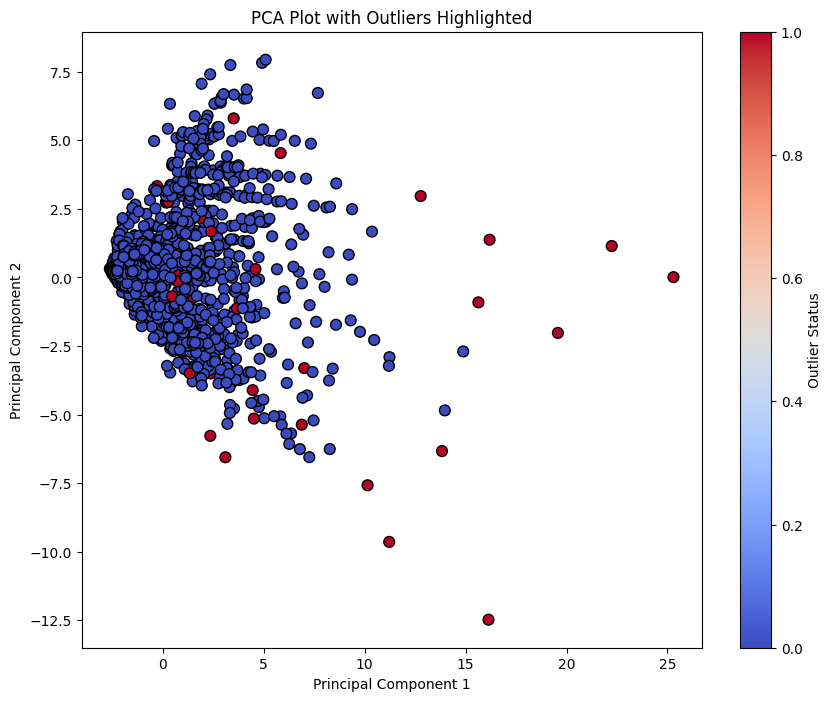

In [46]:
outliers_indexes,no_outliers=process_and_identify_outliers(data)

#### Creating a new dataframe without the outliers

In [47]:
no_outliers=data.drop(outliers_indexes)

In [48]:
num_cols=no_outliers.select_dtypes(include=np.number).columns

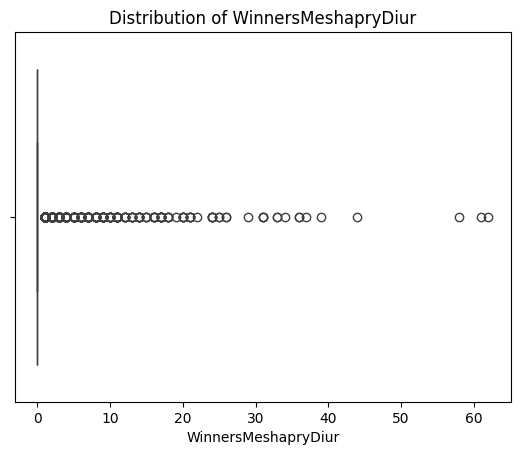

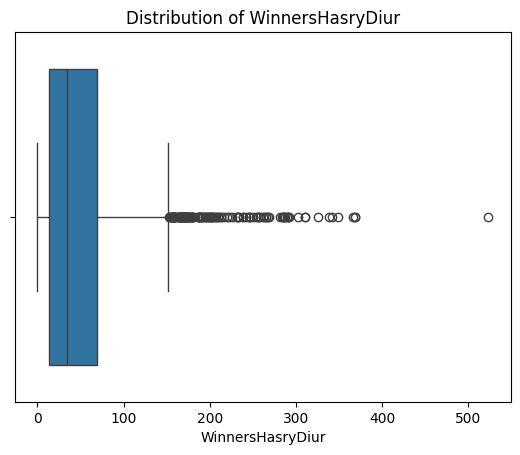

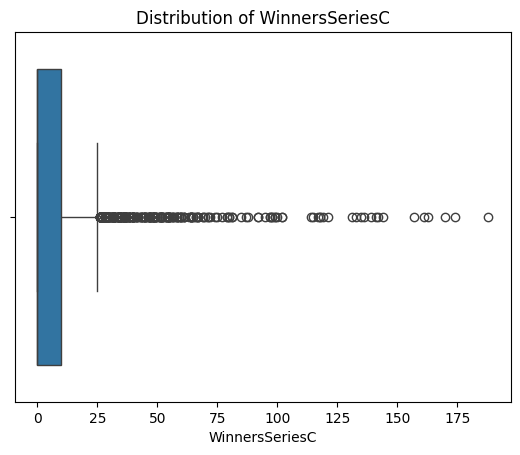

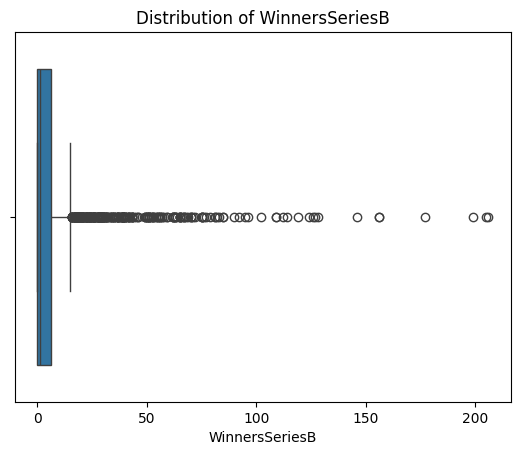

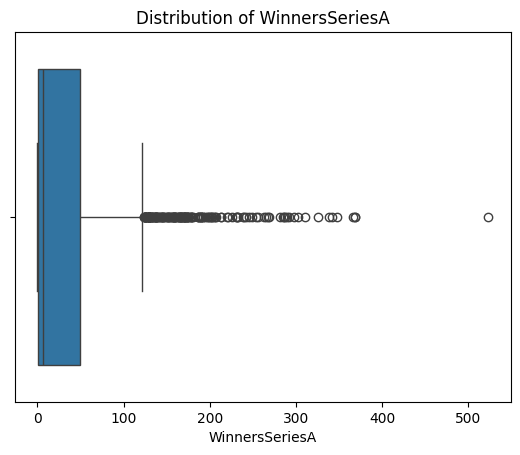

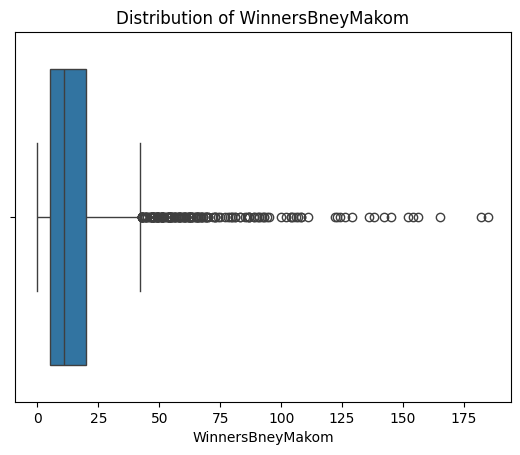

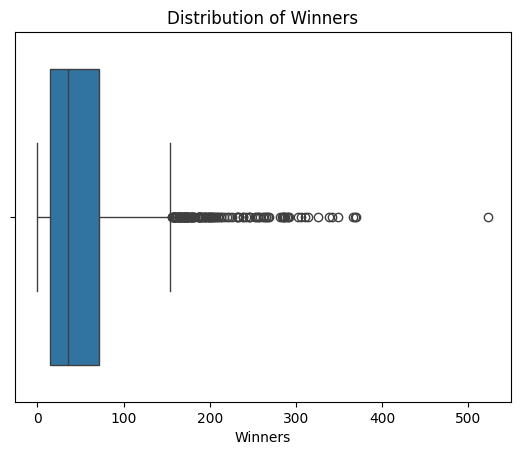

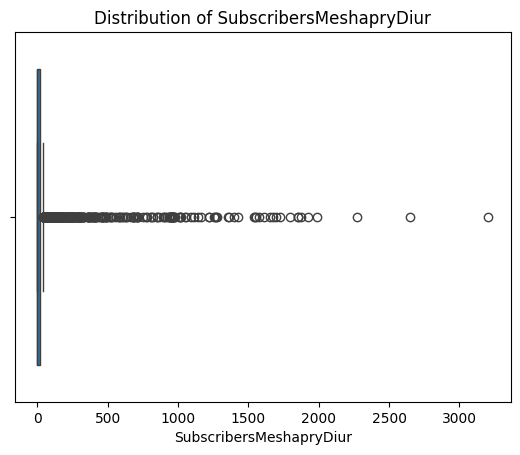

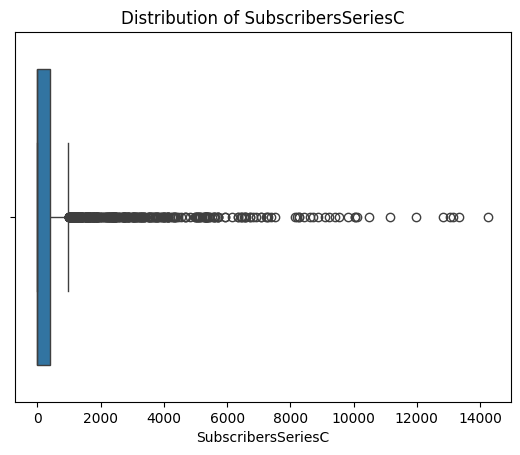

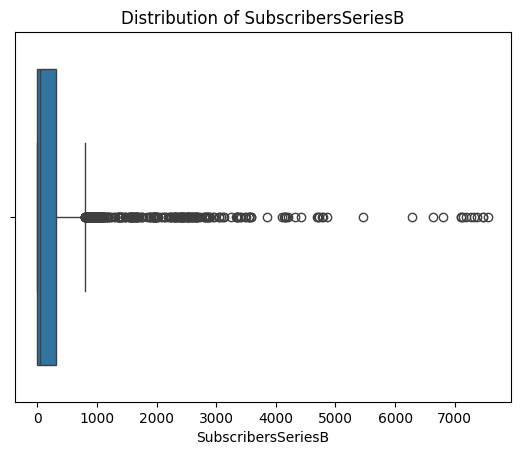

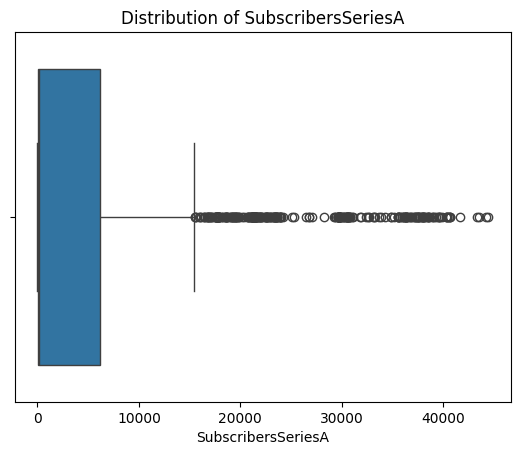

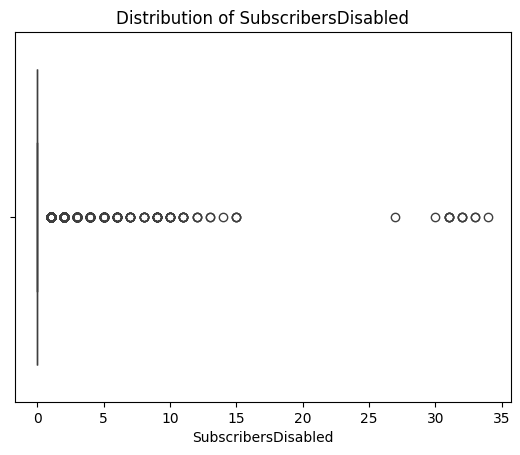

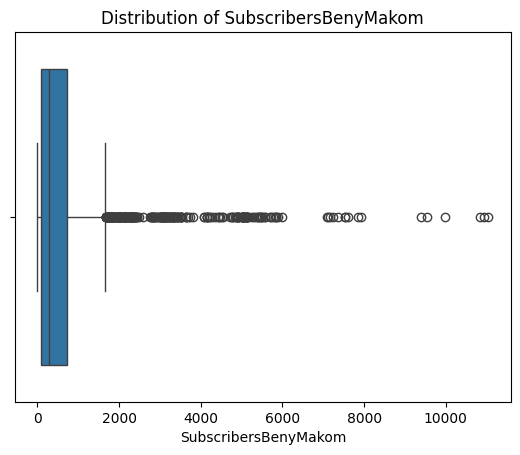

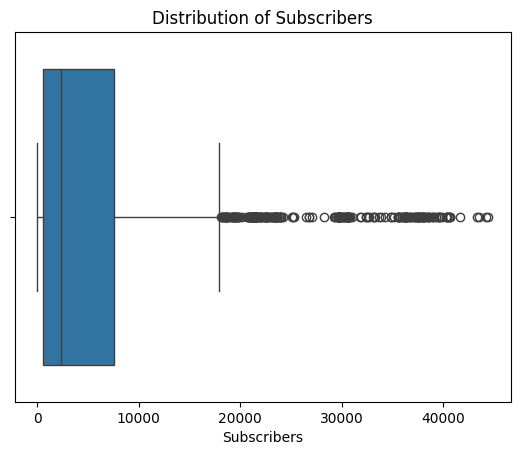

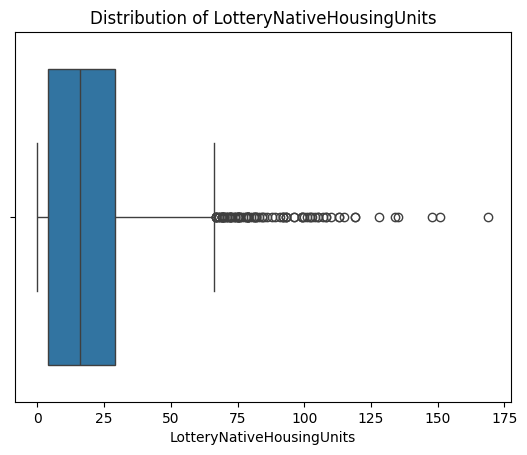

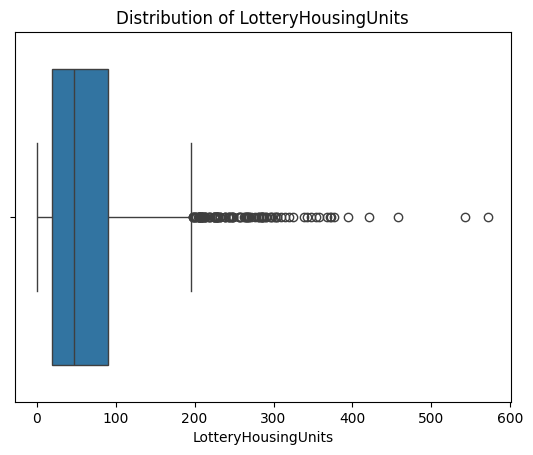

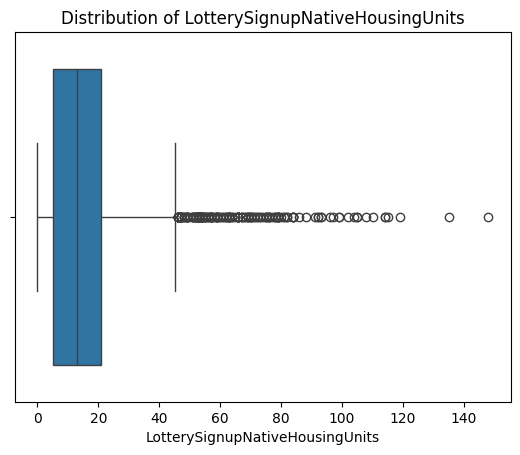

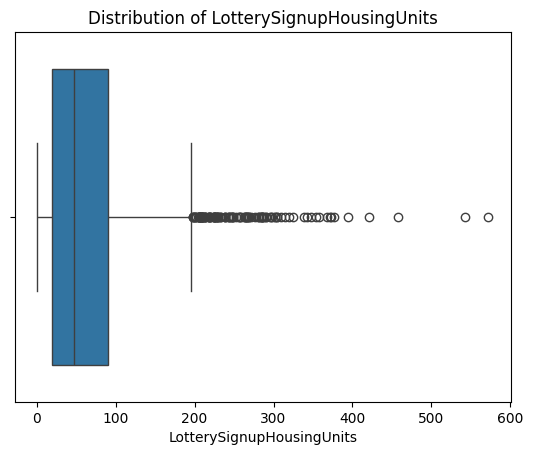

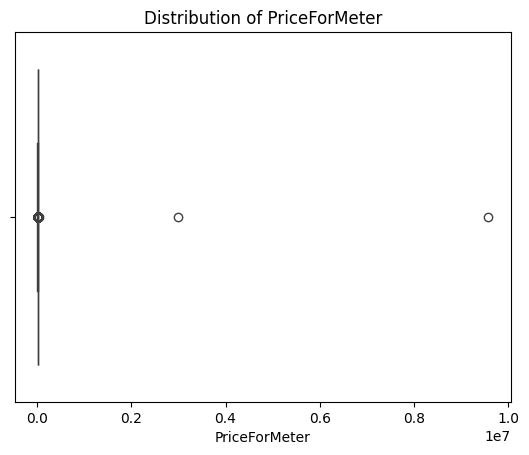

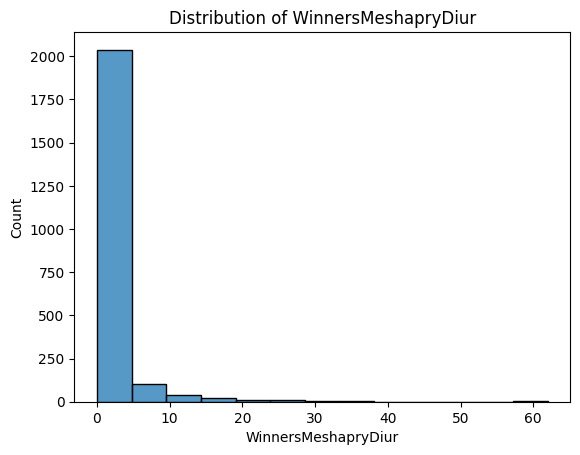

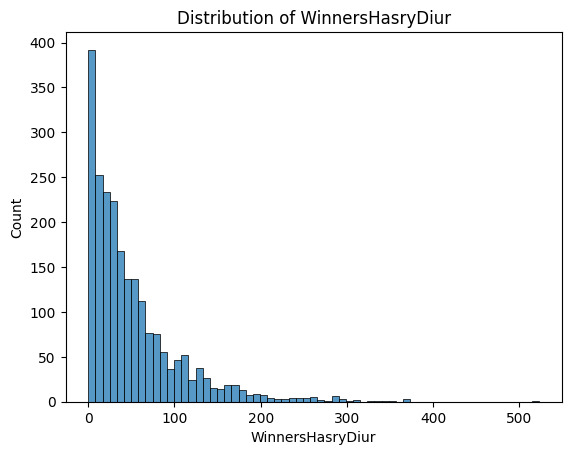

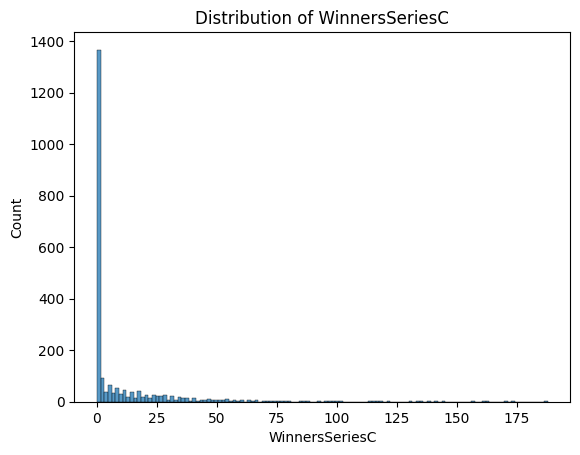

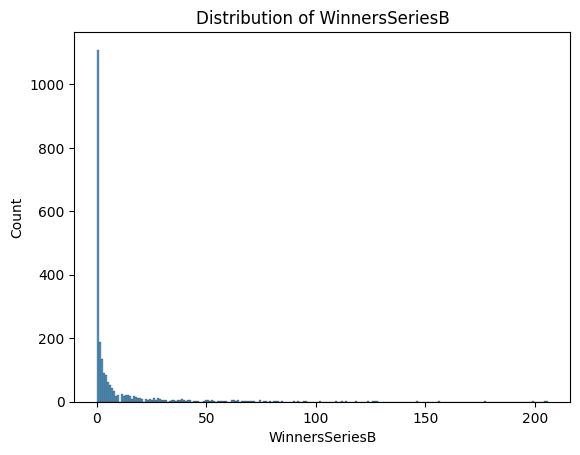

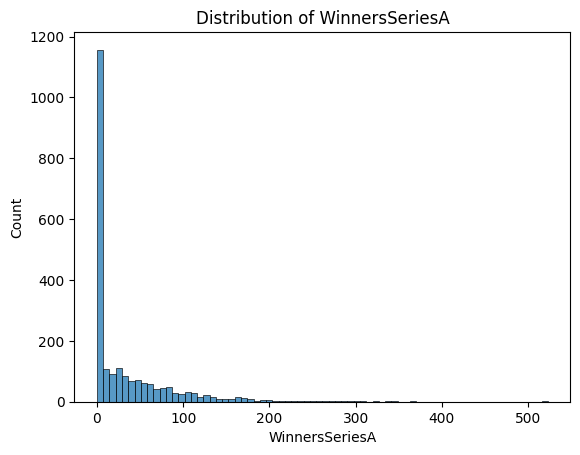

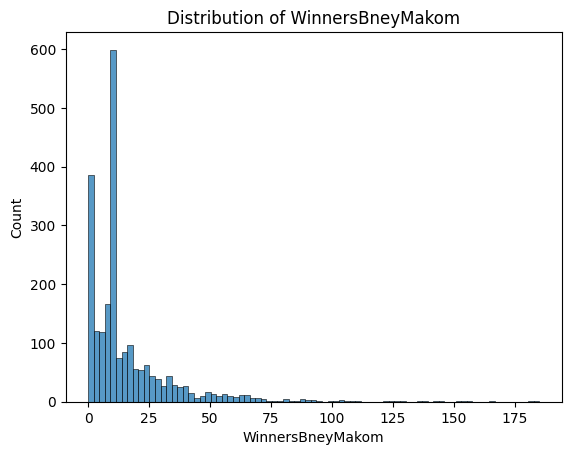

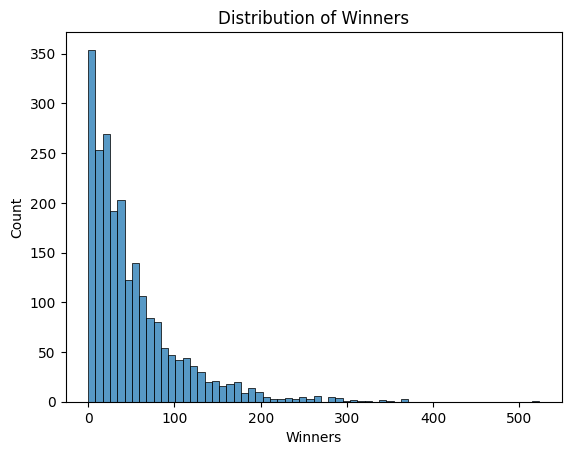

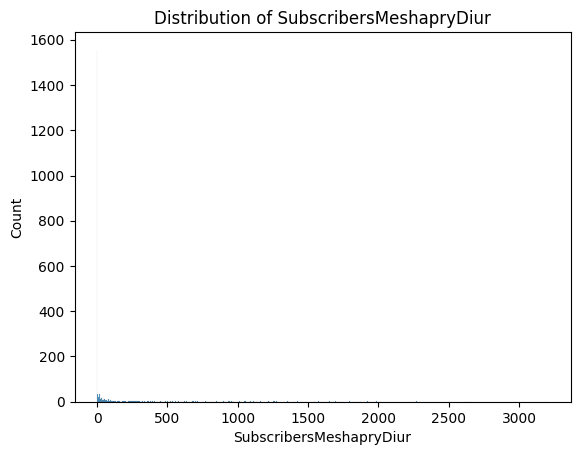

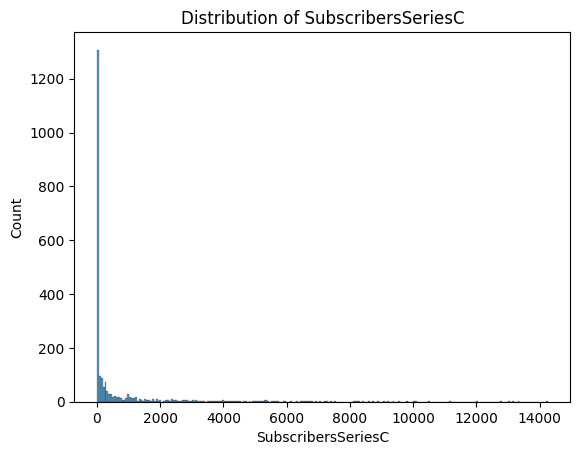

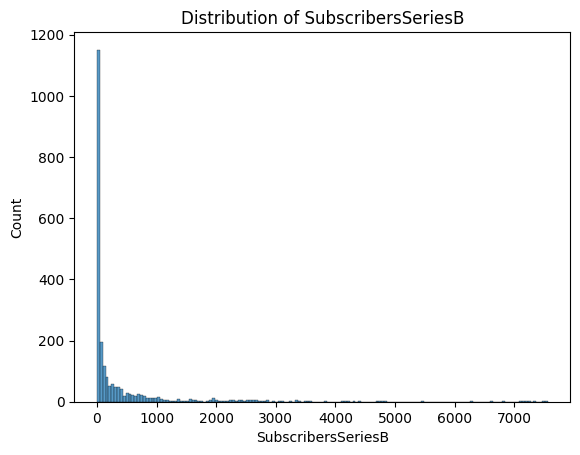

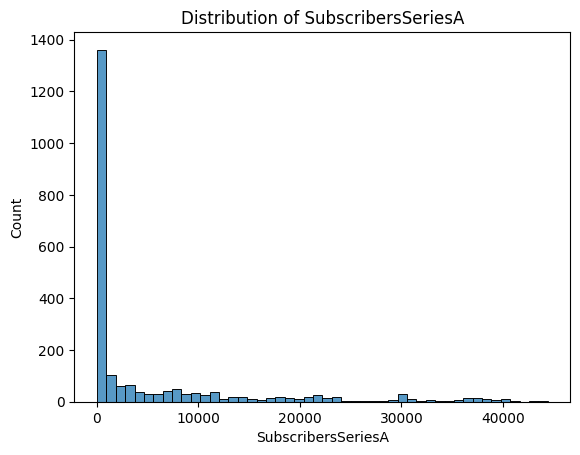

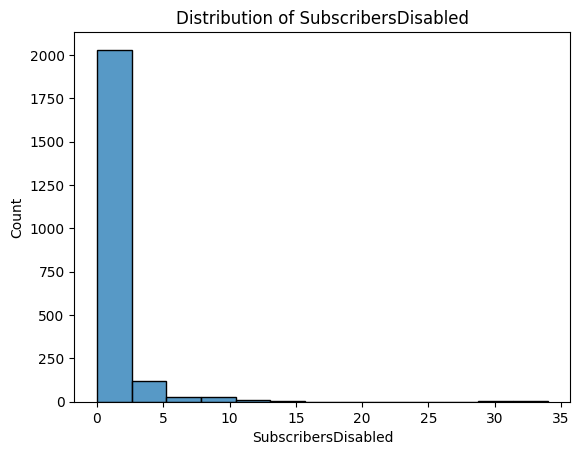

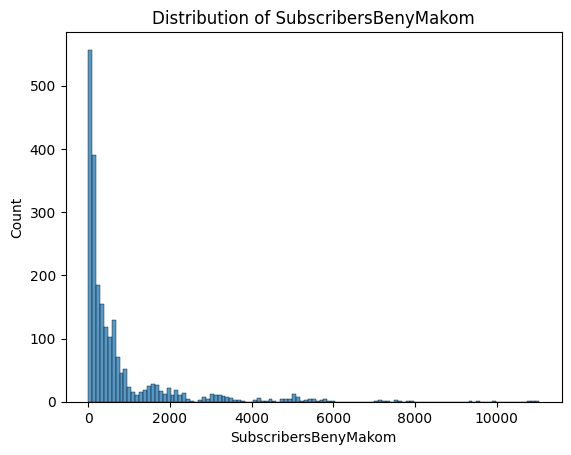

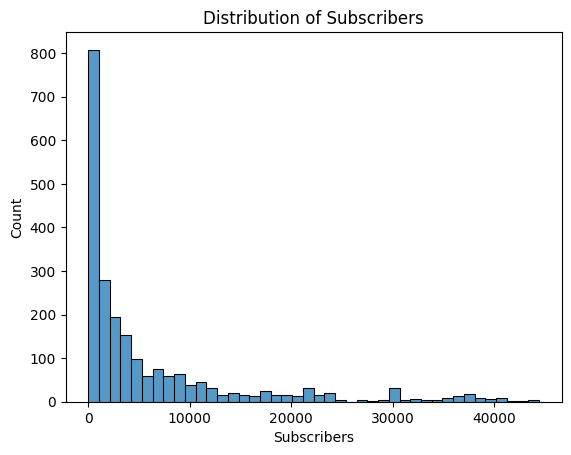

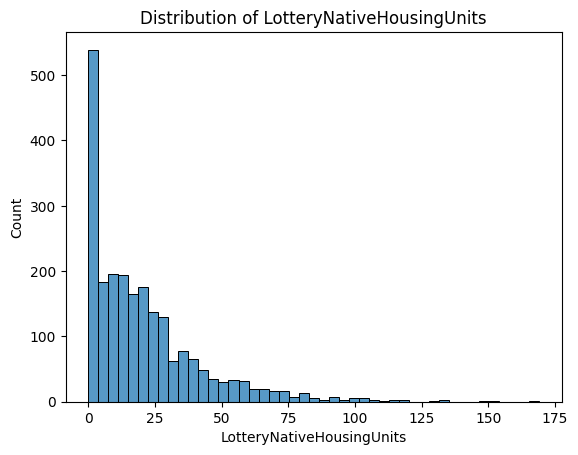

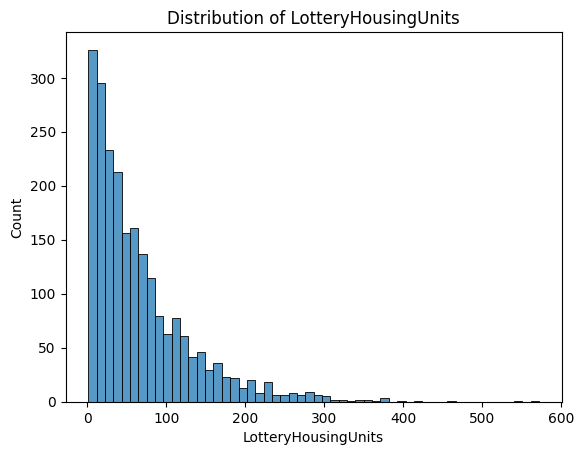

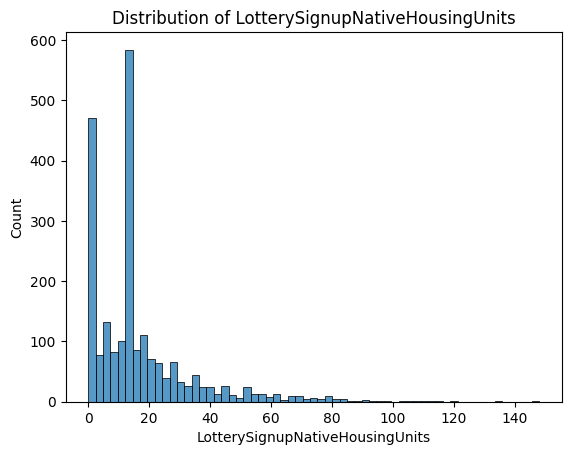

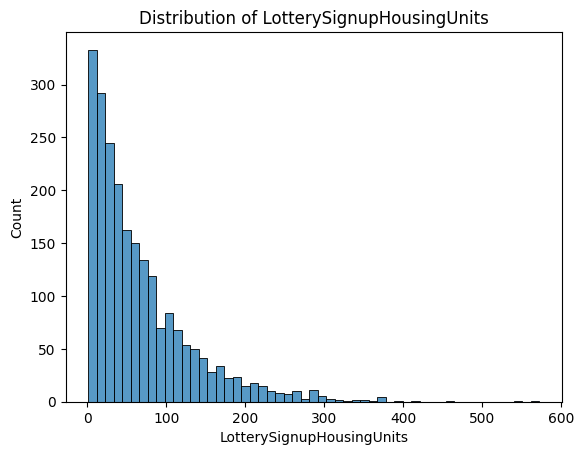

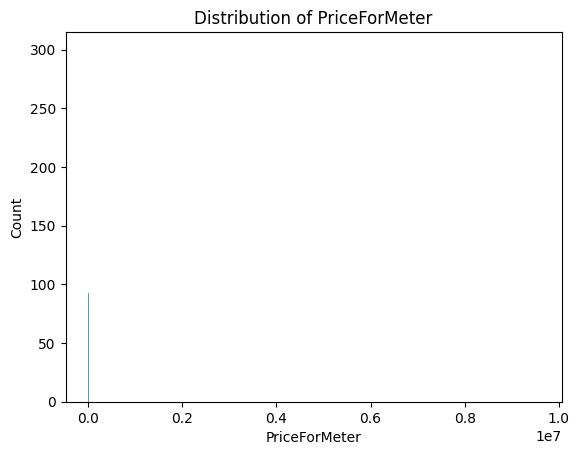

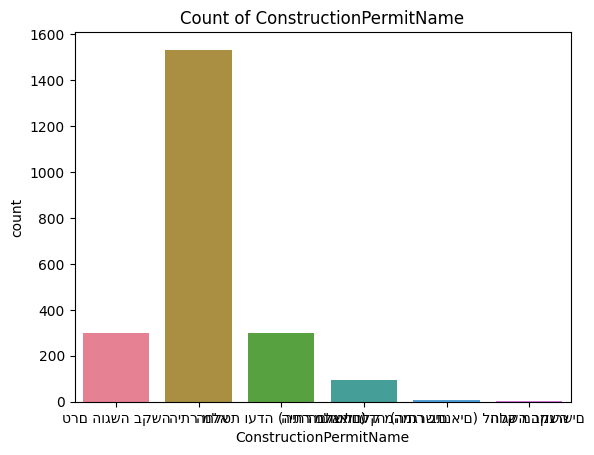

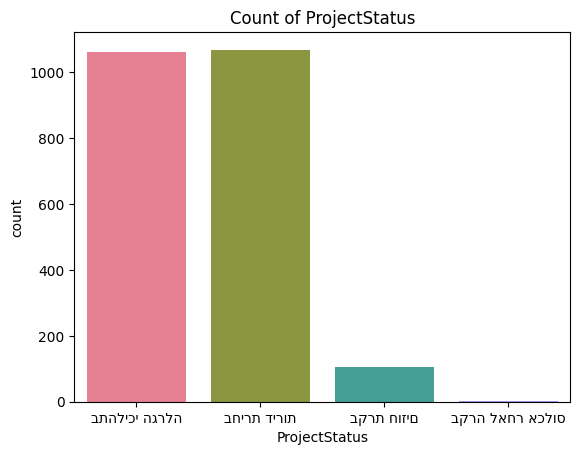

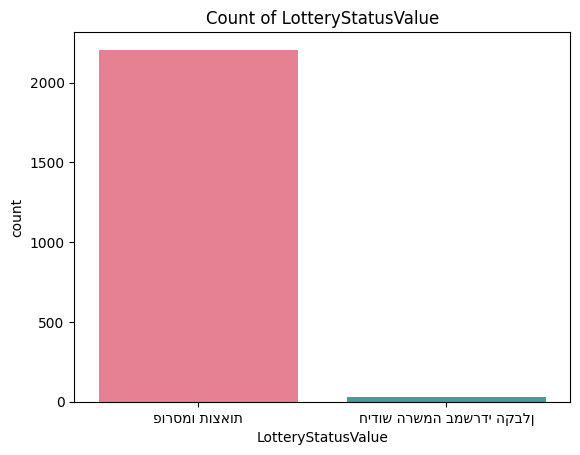

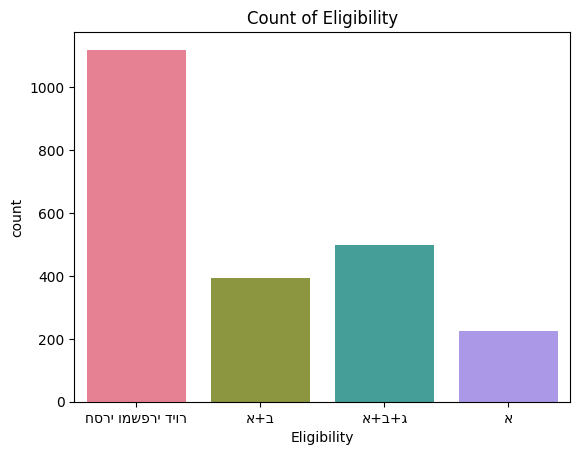

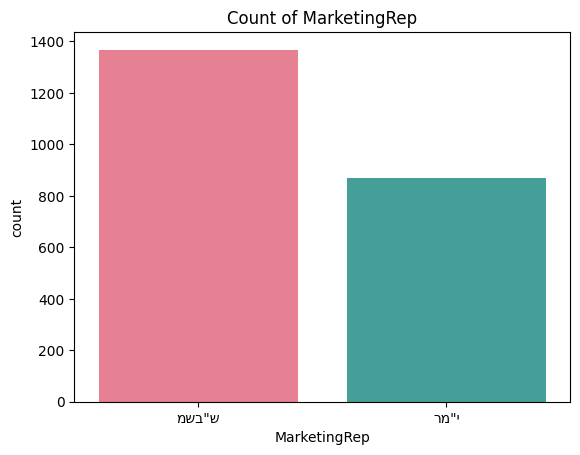

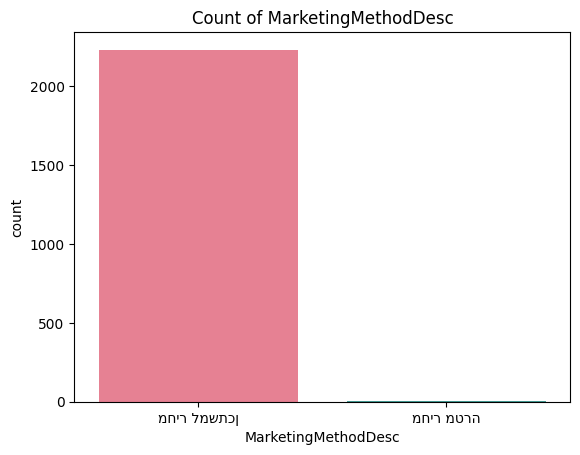

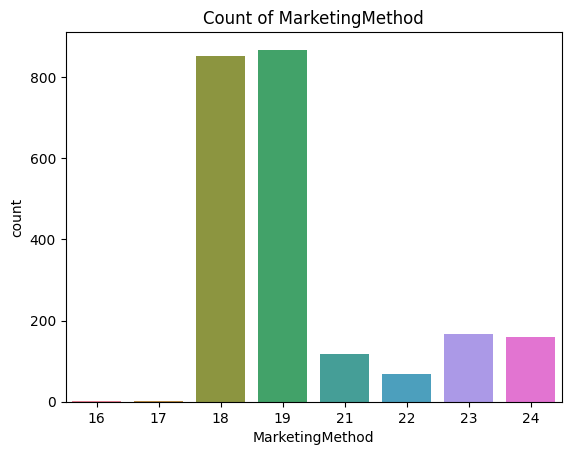

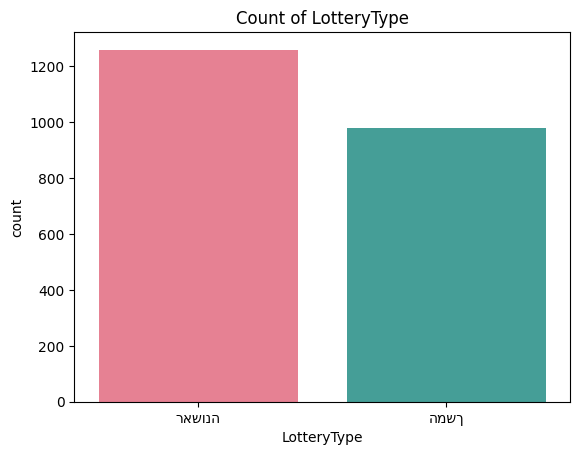

In [49]:
plot_everything(no_outliers)

### Dropping big outliers in each column with Isolation Forest 

In [50]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import numpy as np

def remove_extreme_outliers(data, contamination=0.001):
    """
    Detect and remove extreme outliers using Isolation Forest.
    Only removes outliers that are very different from the rest of the column.
    :param data: DataFrame with numeric columns
    :param contamination: Fraction of outliers in the data
    :return: DataFrame with outliers removed
    """
    clean_data = data.copy()
    original_data = clean_data.copy()  # שמור עותק של הנתונים המקוריים
    outliers_removed = {col: 0 for col in clean_data.select_dtypes(include=[np.number]).columns}

    # Iterate through all numeric columns
    for col in clean_data.select_dtypes(include=[np.number]).columns:
        column_data = clean_data[col].dropna()  # Drop NA values
        
        # Check if the column contains numeric data
        if not pd.api.types.is_numeric_dtype(column_data):
            print(f"Column '{col}' contains non-numeric values. Skipping...")
            continue

        # Use Isolation Forest to detect extreme outliers
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outliers_iforest = iso_forest.fit_predict(column_data.values.reshape(-1, 1)) == -1
        outlier_count = np.sum(outliers_iforest)
        outliers_removed[col] += outlier_count
        clean_data = clean_data.loc[~outliers_iforest, :]  # Remove extreme outliers
        print(f"Column '{col}' extreme outliers removed using Isolation Forest: {outlier_count} removed.")

    # החזרת הערכים המקוריים לעמודות
    clean_data = original_data.loc[clean_data.index]  # החזרת הנתונים המקוריים

    # Return the cleaned data and the outliers removed information
    return clean_data, outliers_removed



In [51]:
# הדאטה שלך
cleaned_data, outliers_info = remove_extreme_outliers(no_outliers[num_cols], contamination=0.01)
print(f"Outliers removed: {outliers_info}")


Column 'WinnersMeshapryDiur' extreme outliers removed using Isolation Forest: 23 removed.
Column 'WinnersHasryDiur' extreme outliers removed using Isolation Forest: 23 removed.
Column 'WinnersSeriesC' extreme outliers removed using Isolation Forest: 22 removed.
Column 'WinnersSeriesB' extreme outliers removed using Isolation Forest: 22 removed.
Column 'WinnersSeriesA' extreme outliers removed using Isolation Forest: 22 removed.
Column 'WinnersBneyMakom' extreme outliers removed using Isolation Forest: 22 removed.
Column 'Winners' extreme outliers removed using Isolation Forest: 22 removed.
Column 'SubscribersMeshapryDiur' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersSeriesC' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersSeriesB' extreme outliers removed using Isolation Forest: 21 removed.
Column 'SubscribersSeriesA' extreme outliers removed using Isolation Forest: 20 removed.
Column 'SubscribersDisabled' extreme outli

In [52]:
len(cleaned_data)

1846

In [53]:
cleaned_data.columns

Index(['WinnersMeshapryDiur', 'WinnersHasryDiur', 'WinnersSeriesC',
       'WinnersSeriesB', 'WinnersSeriesA', 'WinnersBneyMakom', 'Winners',
       'SubscribersMeshapryDiur', 'SubscribersSeriesC', 'SubscribersSeriesB',
       'SubscribersSeriesA', 'SubscribersDisabled', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter'],
      dtype='object')

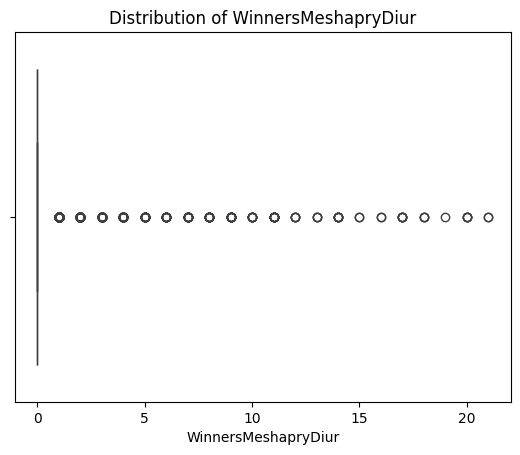

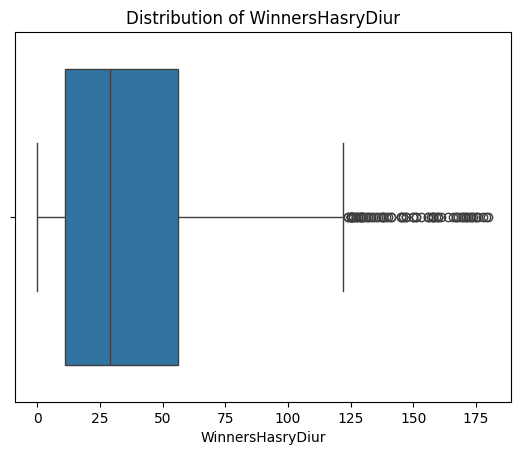

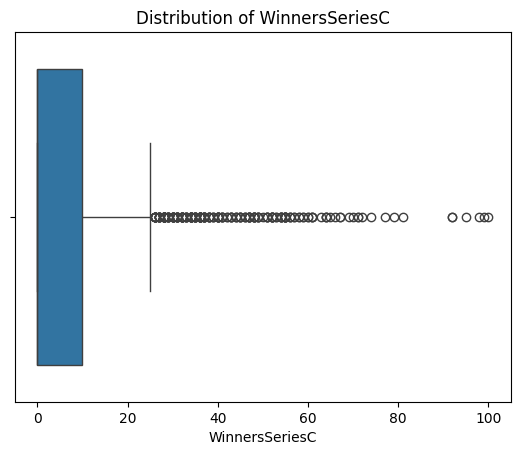

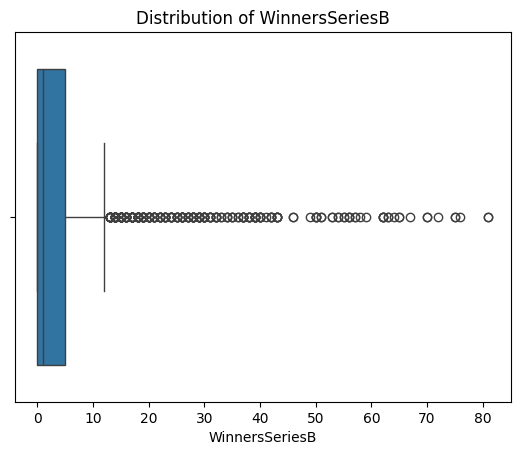

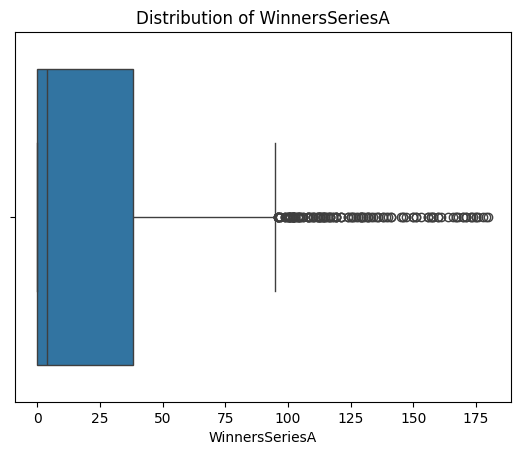

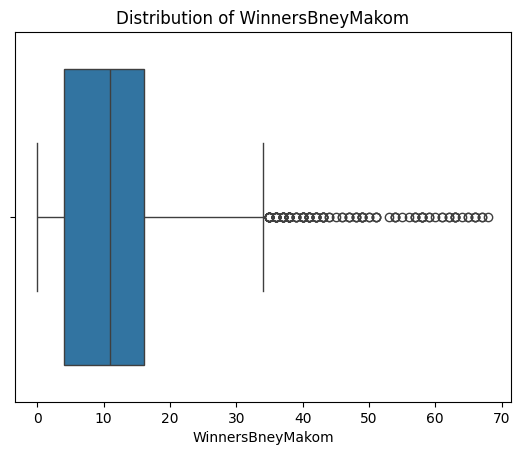

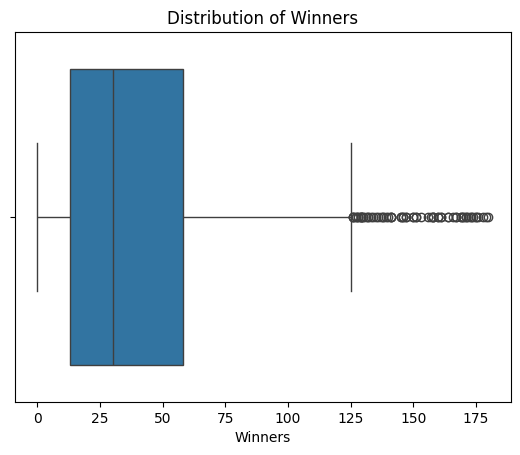

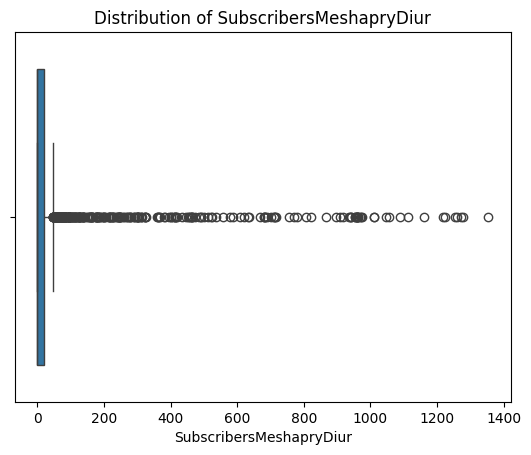

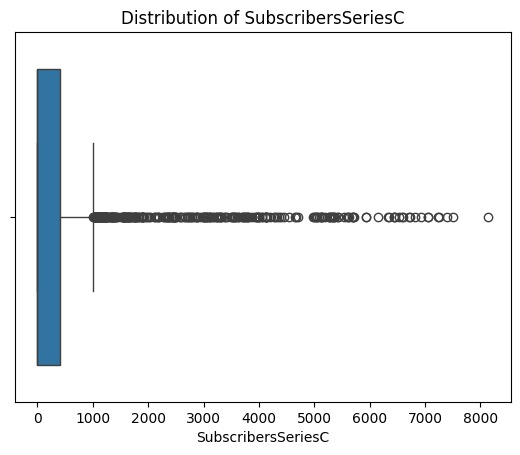

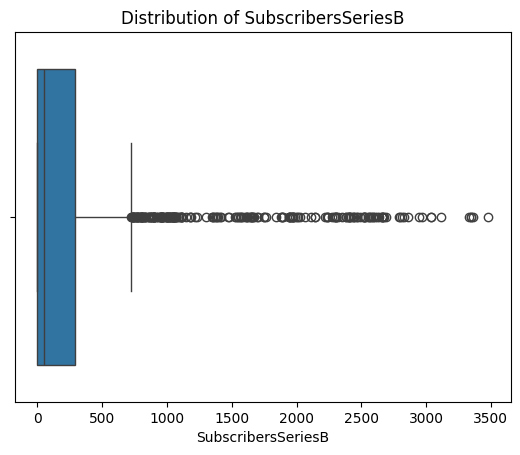

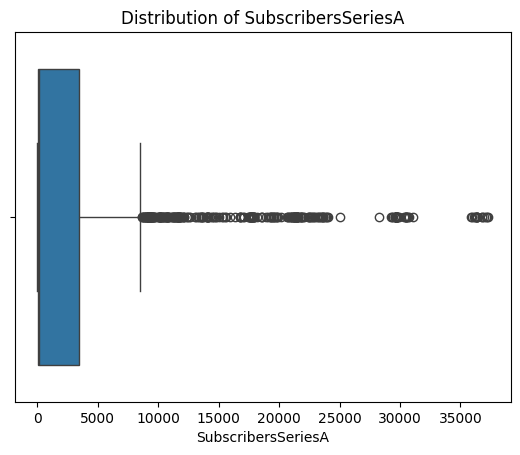

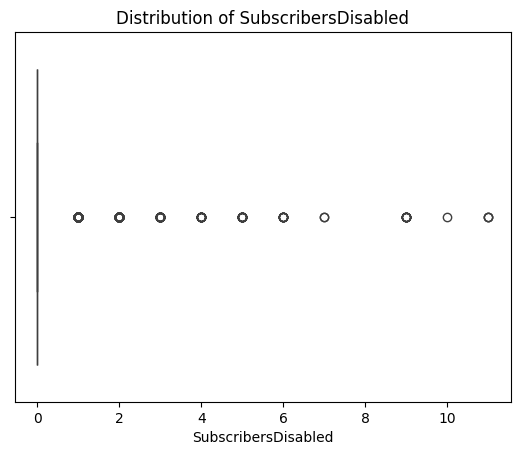

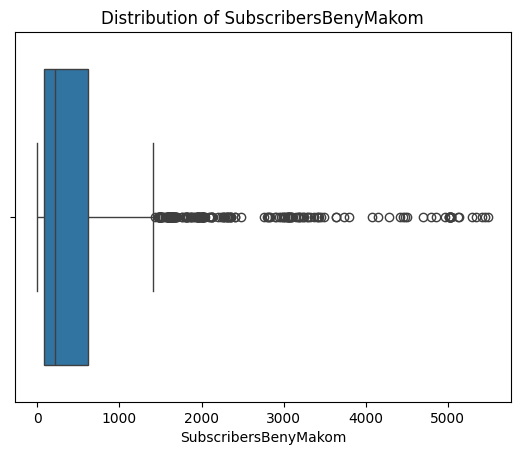

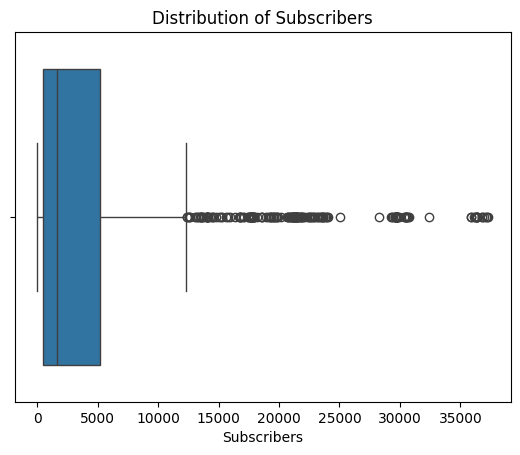

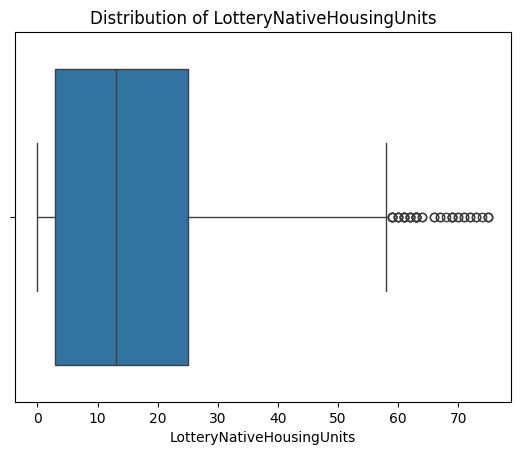

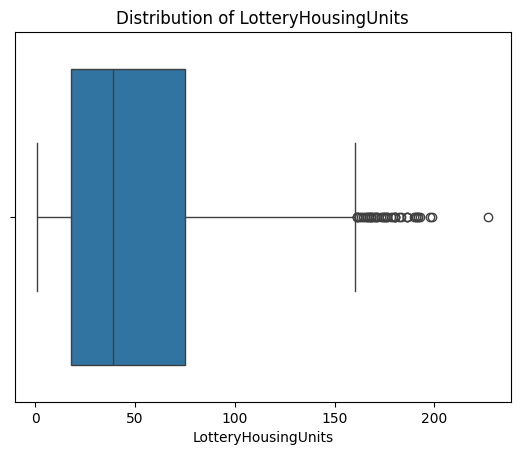

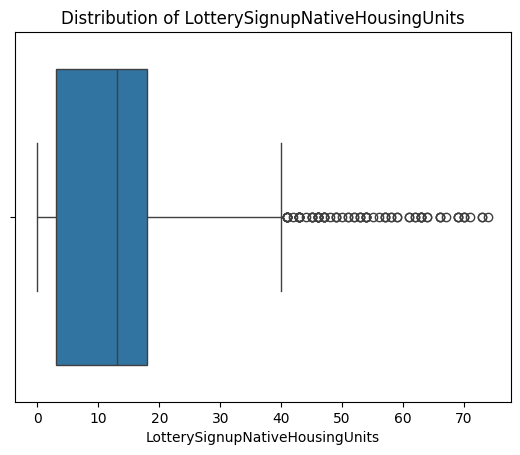

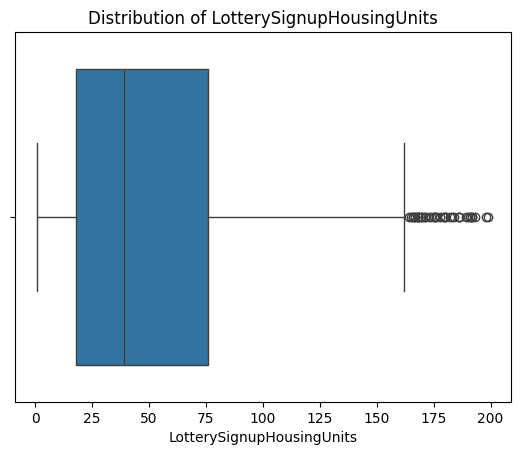

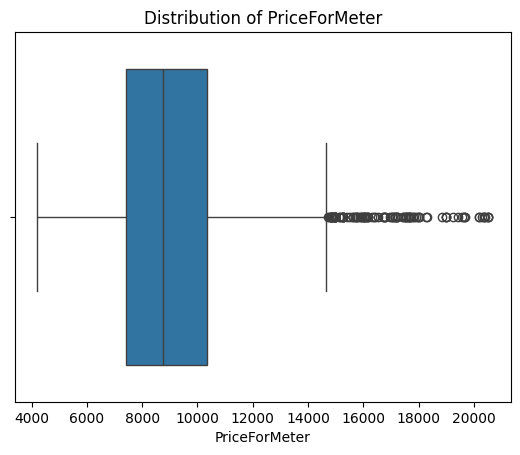

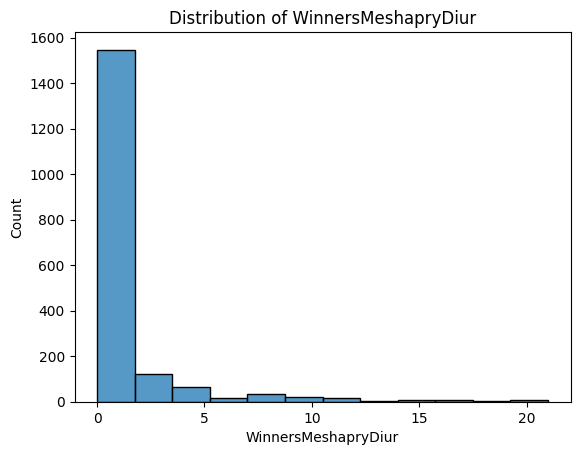

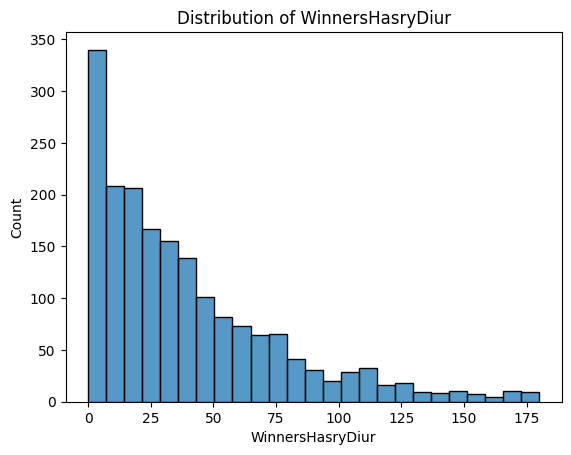

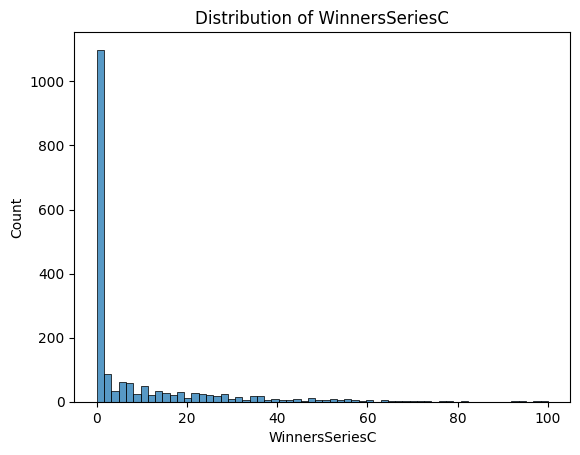

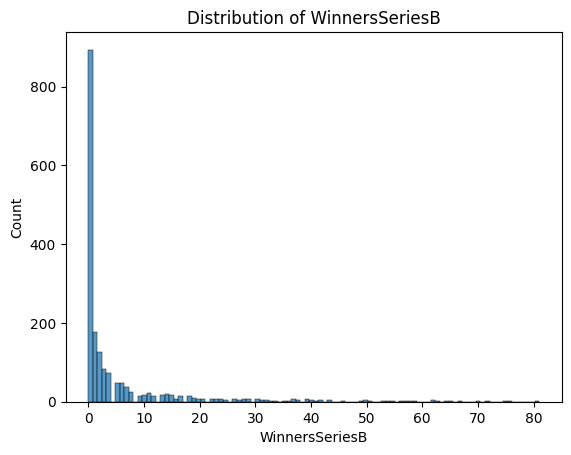

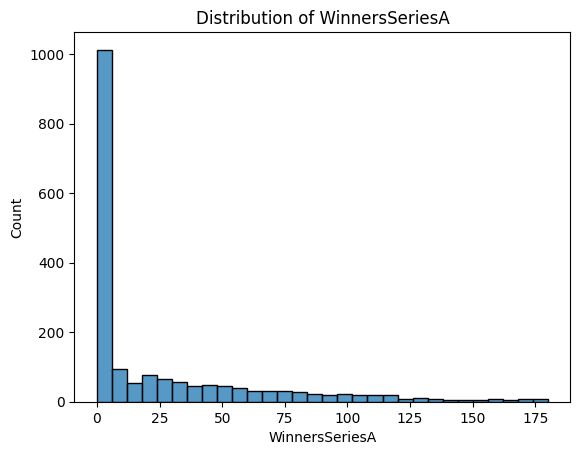

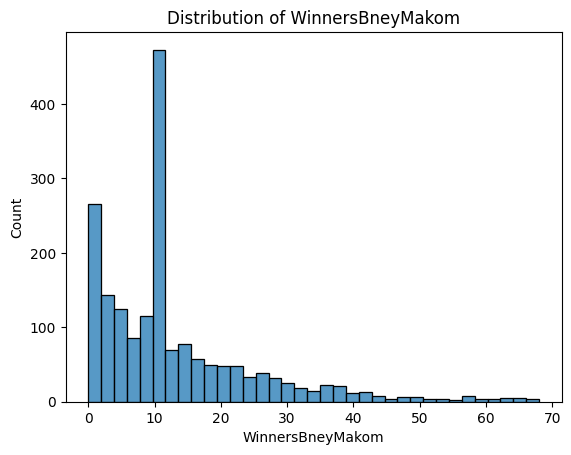

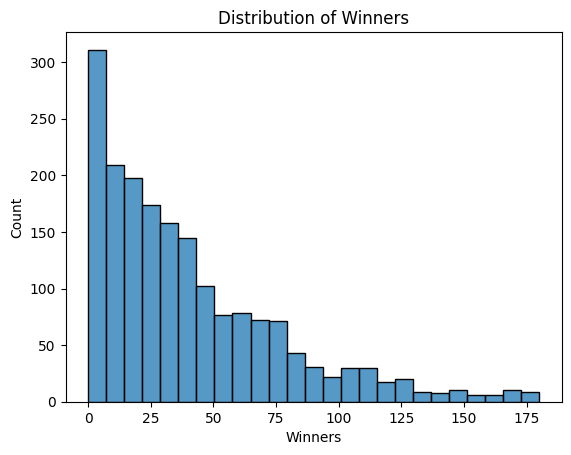

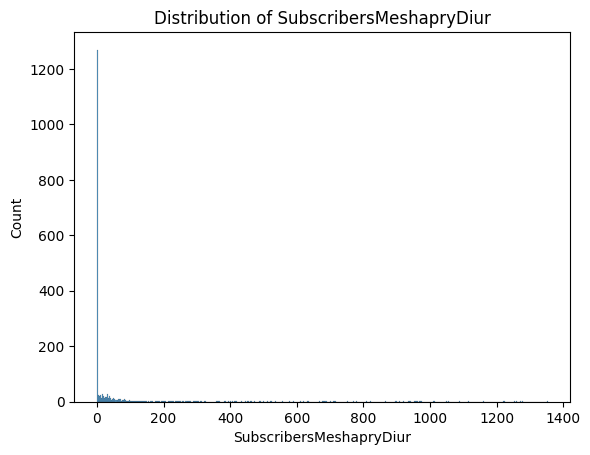

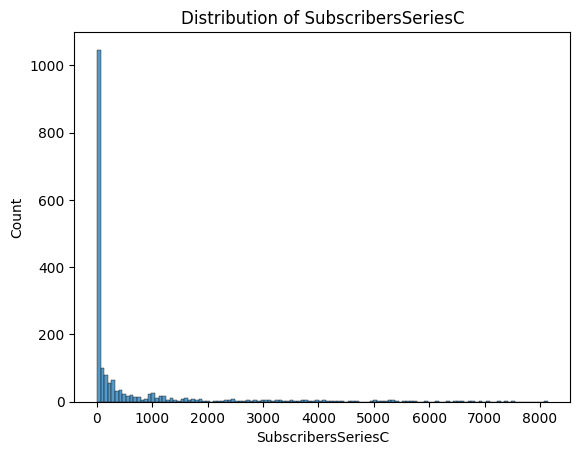

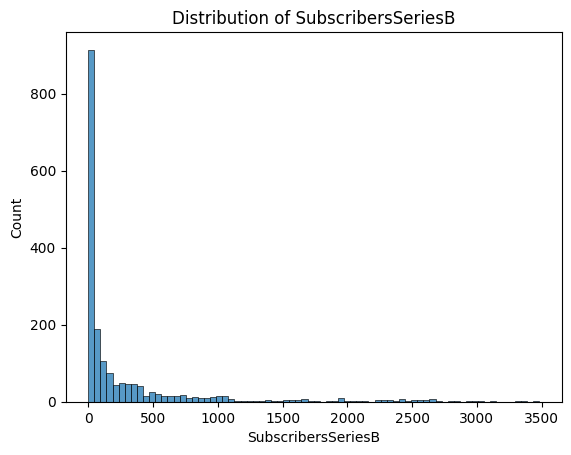

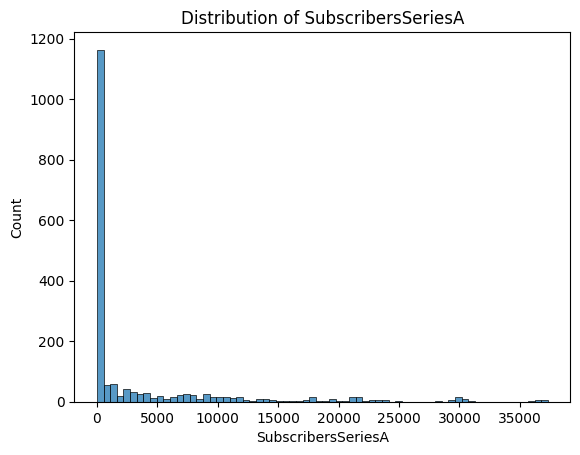

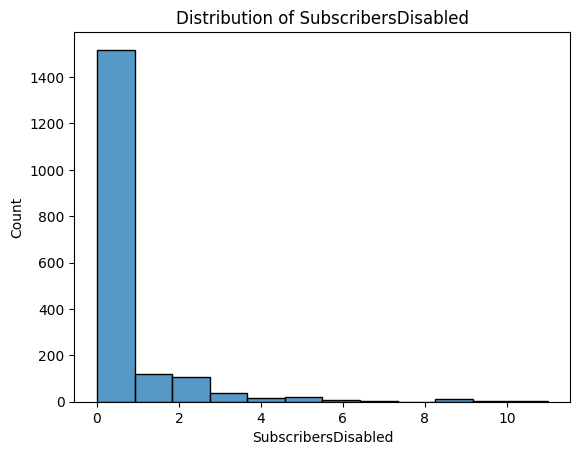

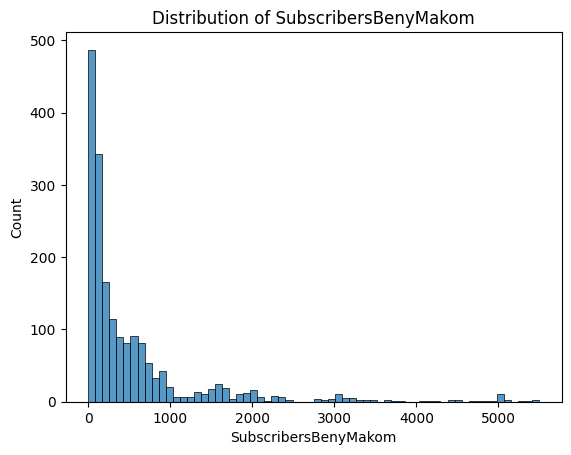

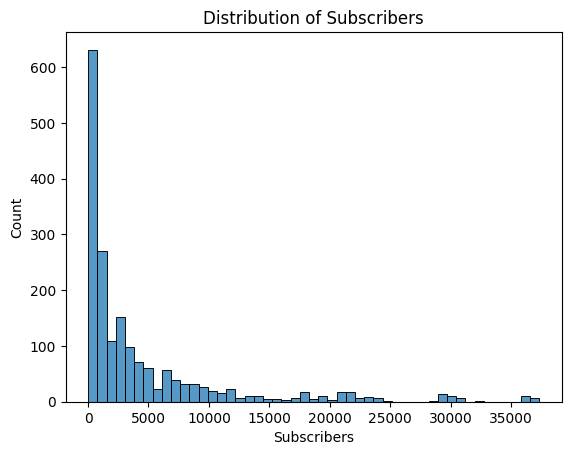

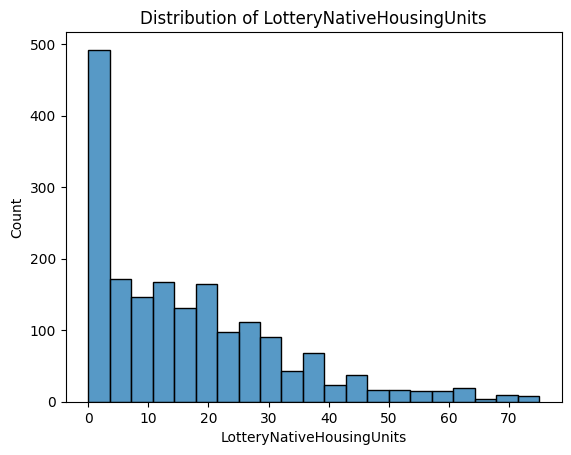

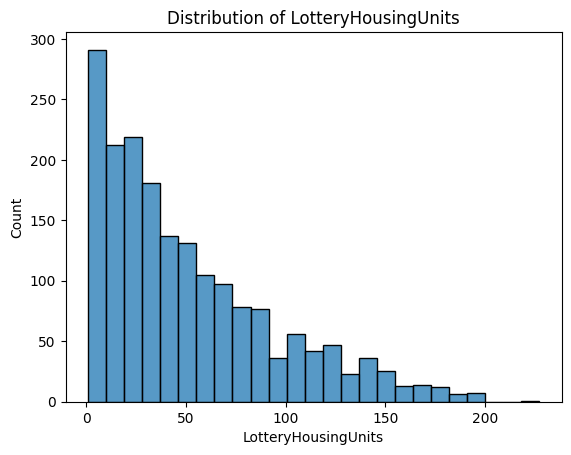

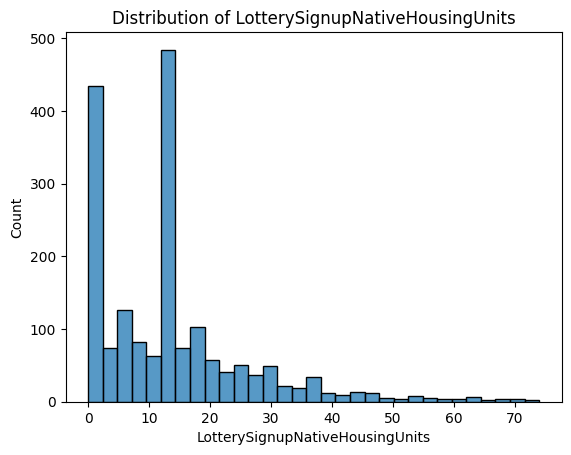

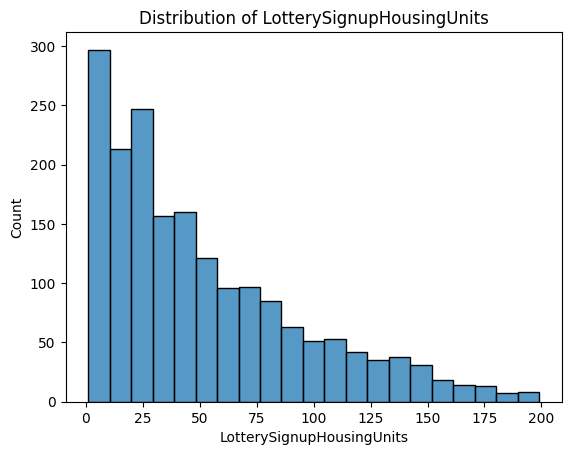

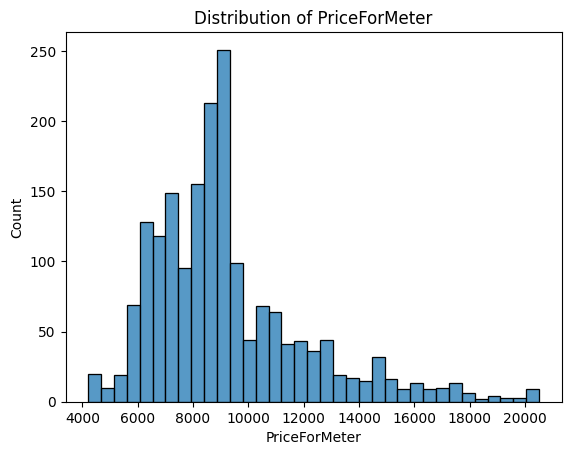

In [54]:
plot_everything(cleaned_data)

In [55]:
#dropping columns with almost only 1 value
cleaned_data=cleaned_data.drop(['WinnersMeshapryDiur','SubscribersDisabled','SubscribersMeshapryDiur'],axis=1)


In [56]:
#outliers in object columns:
object_cols=data.select_dtypes(include=['object','datetime64[ns]']).columns

In [57]:
cleaned_data.head()

WinnersHasryDiur  WinnersSeriesC  WinnersSeriesB  WinnersSeriesA  \
0                29               0               0              29   
1                29               0               0              29   
2                37               0               0              37   
3                38               0               0              38   
4                58               0               0              58   

   WinnersBneyMakom  Winners  SubscribersSeriesC  SubscribersSeriesB  \
0              11.0       29                   0                   0   
1              11.0       29                   0                   0   
2              11.0       37                   0                   0   
3              11.0       38                   0                   0   
4              11.0       58                   0                   0   

   SubscribersSeriesA  SubscribersBenyMakom  Subscribers  \
0               21197                   110        21197   
1               21279                   112        21279   
2               21120                   109        21120   
3               21260                   110        21260   
4               21347                   109        21347   

   LotteryNativeHousingUnits  LotteryHousingUnits  \
0                         10                   29   
1                         10                   29   
2                         12                   37   
3                         13                   38   
4                         20                   58   

   LotterySignupNativeHousingUnits  LotterySignupHousingUnits  PriceForMeter  
0                             13.0                         29       14811.03  
1                             13.0                         29       14369.94  
2                             13.0                         37       15268.50  
3                             13.0                         38       14811.03  
4                             13.0                         58       14739.66

### combine the numeric columns with the object columns together again after taking care of outliers

In [58]:
no_outliers= cleaned_data.join(data[object_cols])


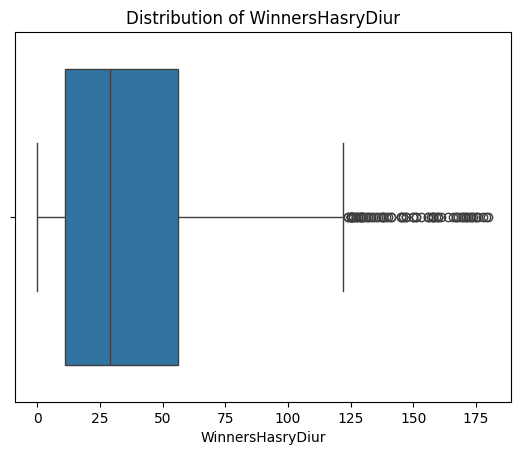

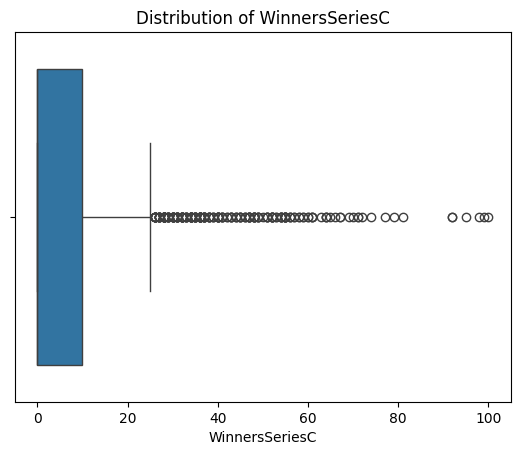

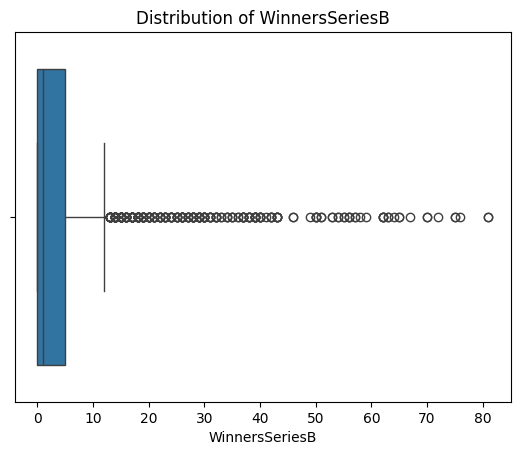

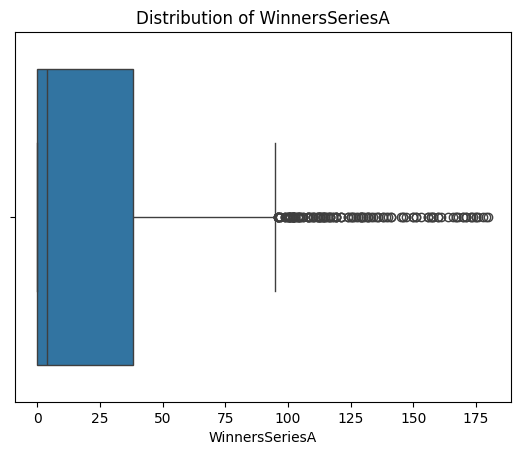

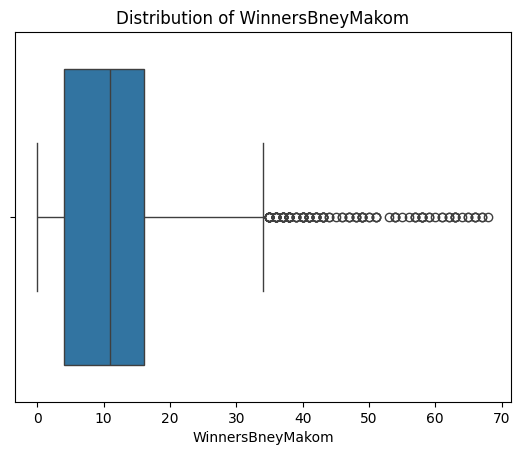

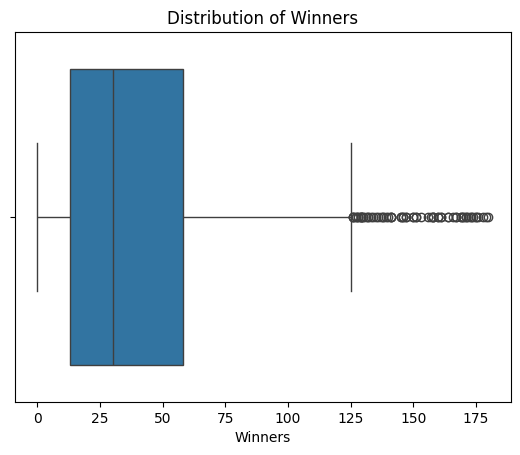

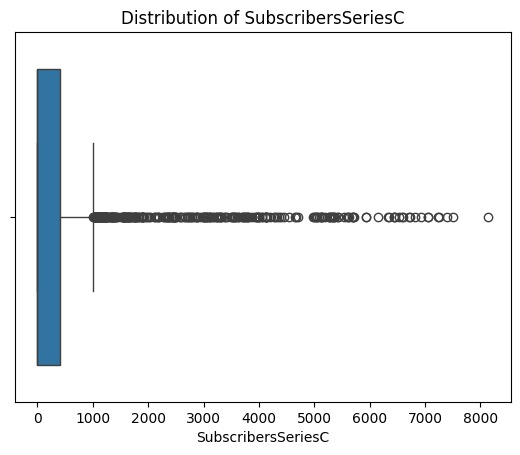

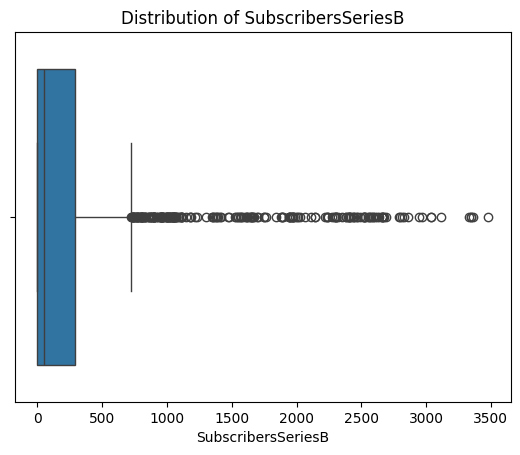

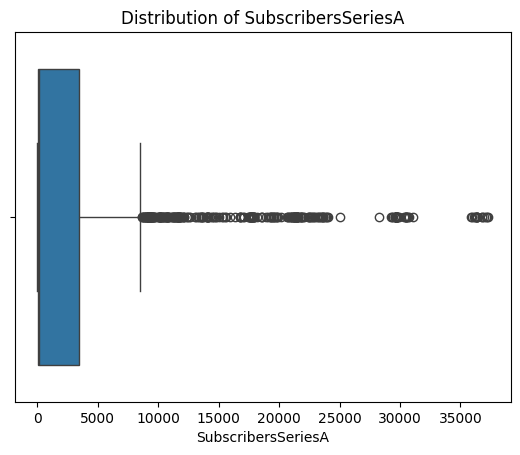

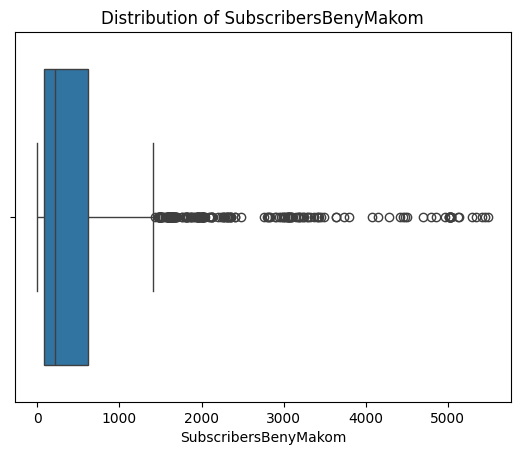

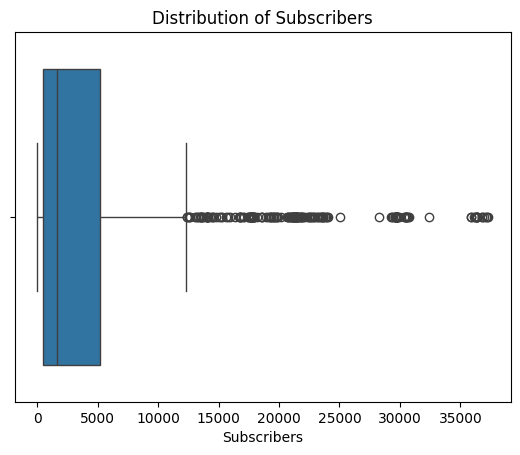

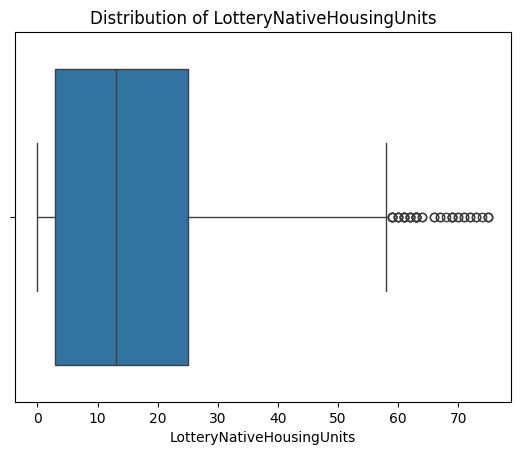

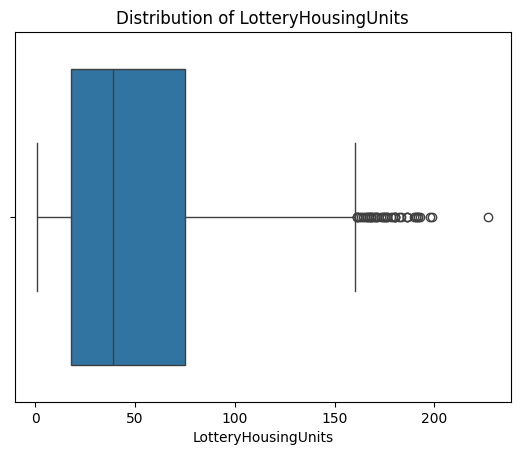

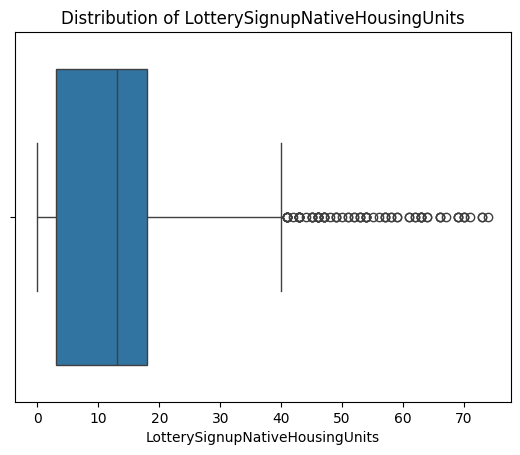

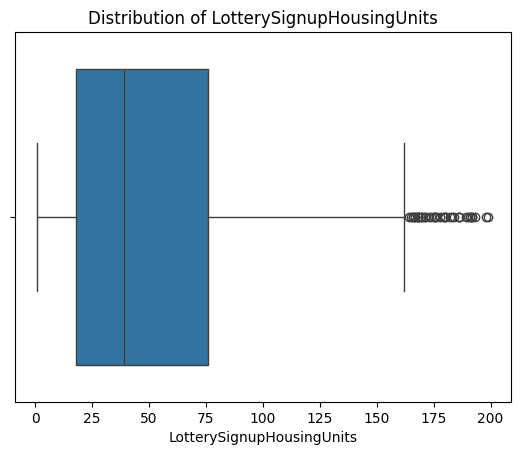

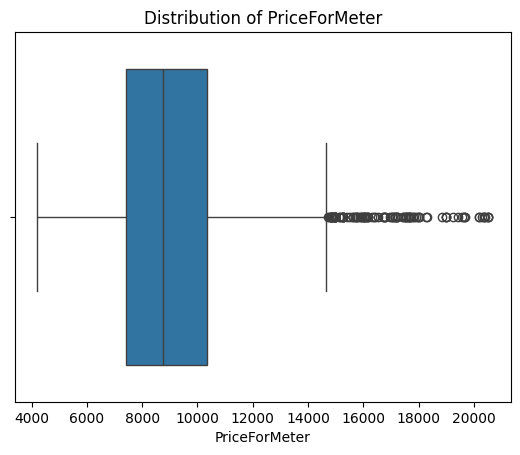

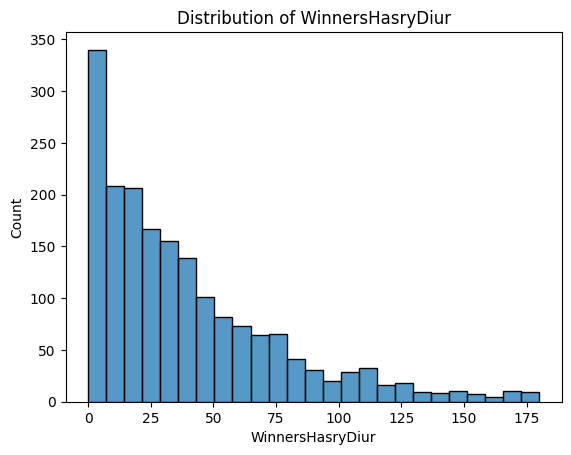

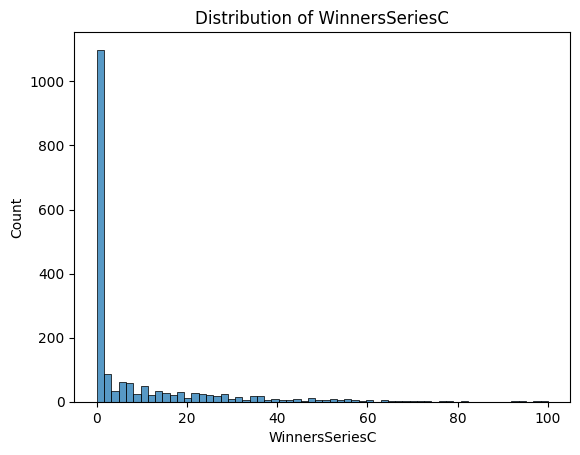

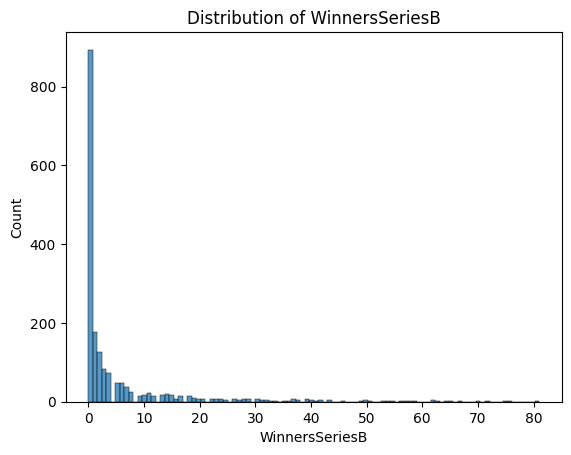

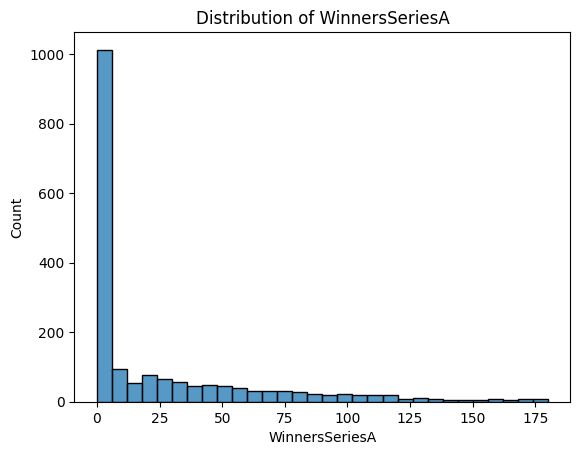

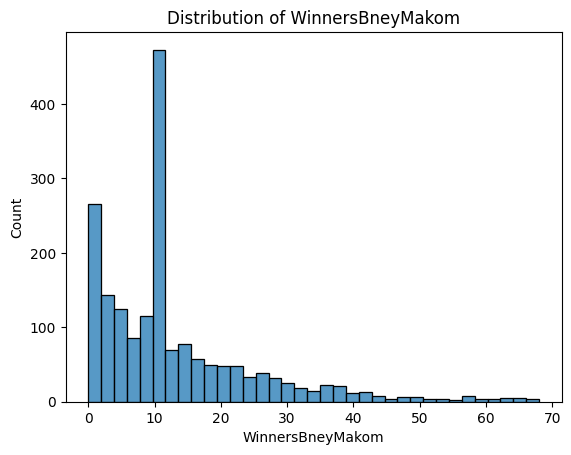

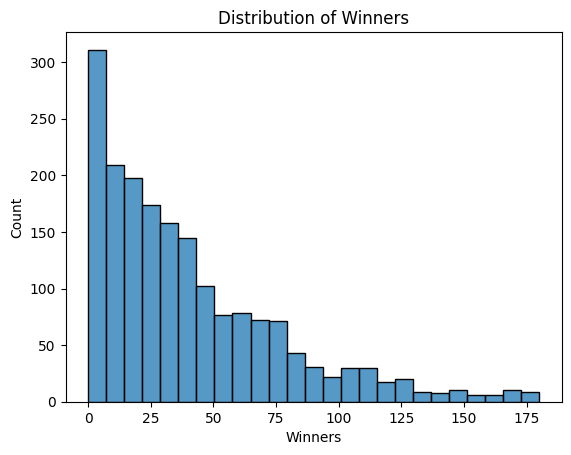

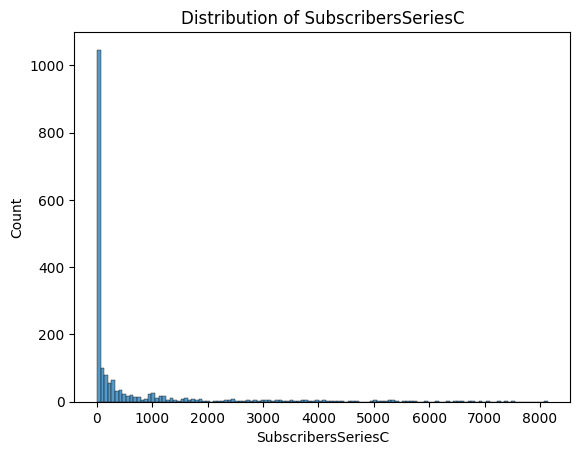

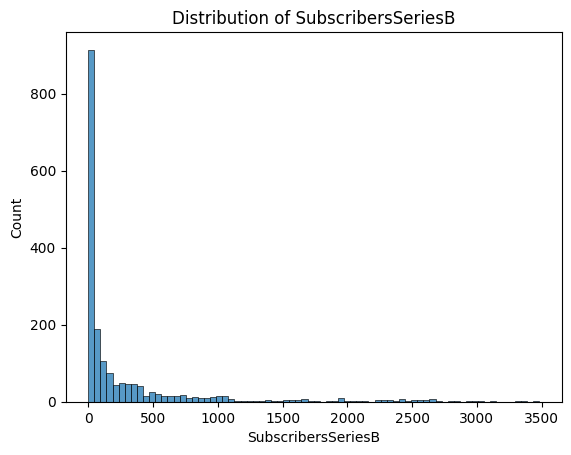

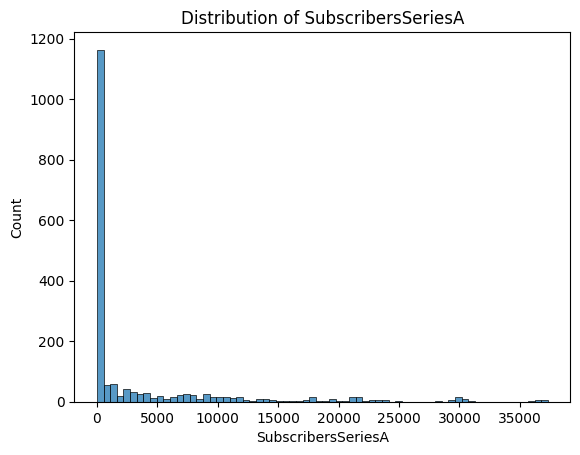

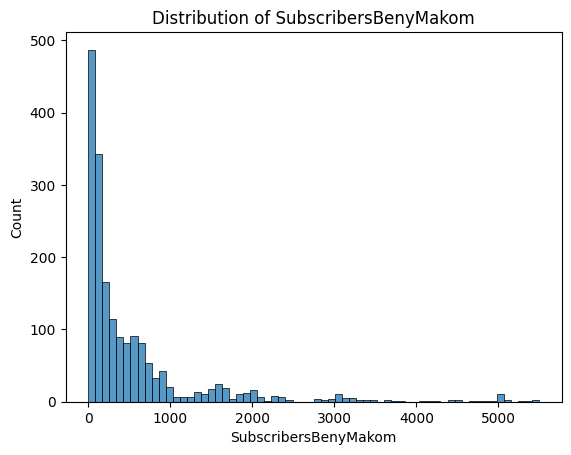

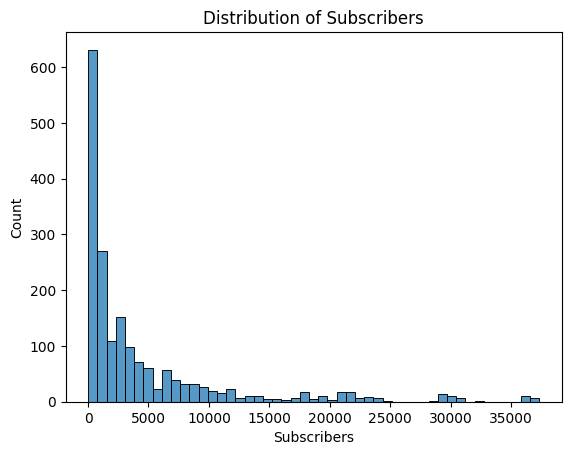

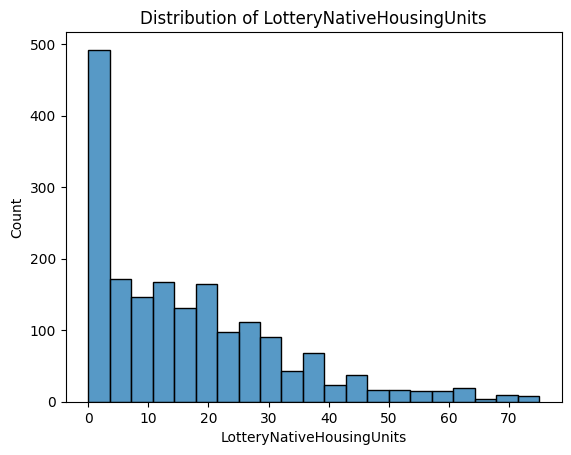

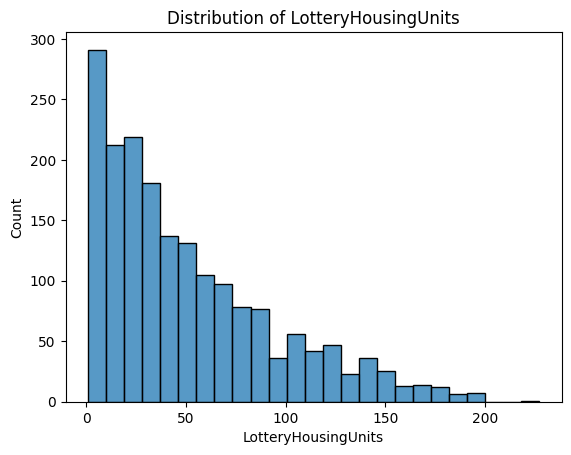

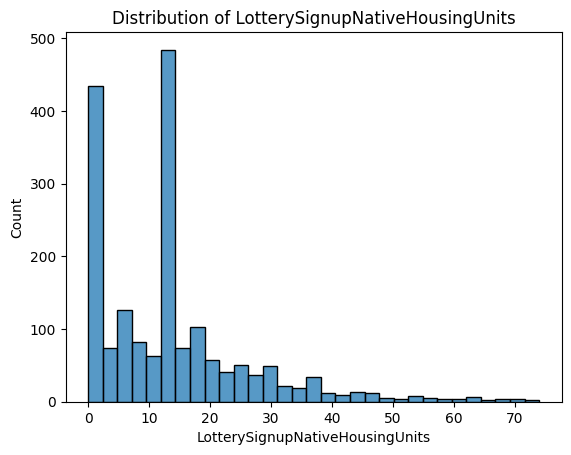

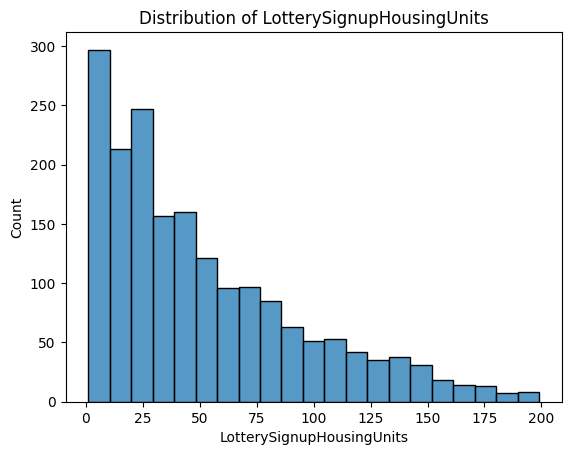

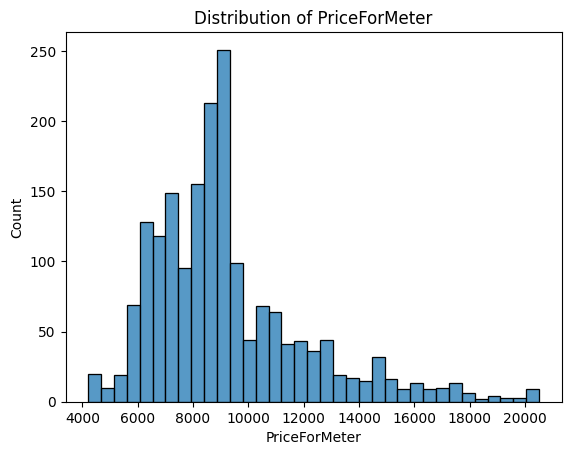

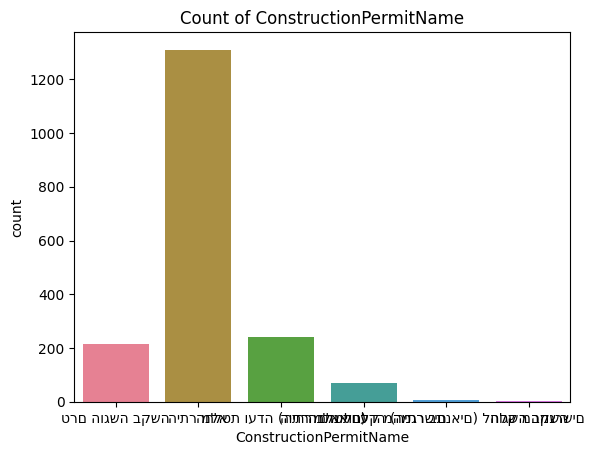

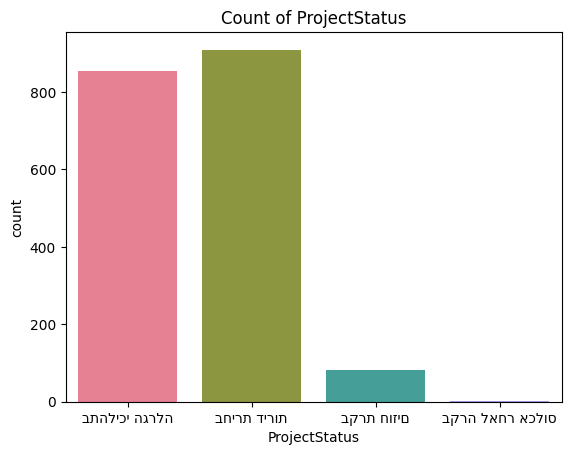

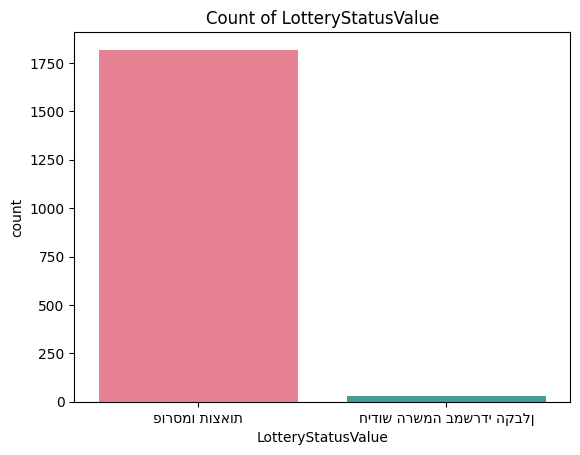

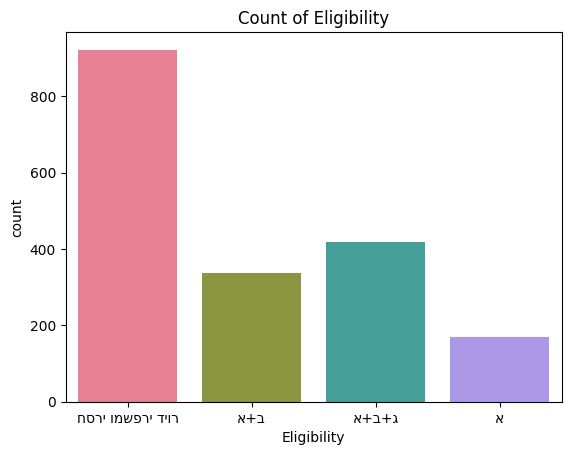

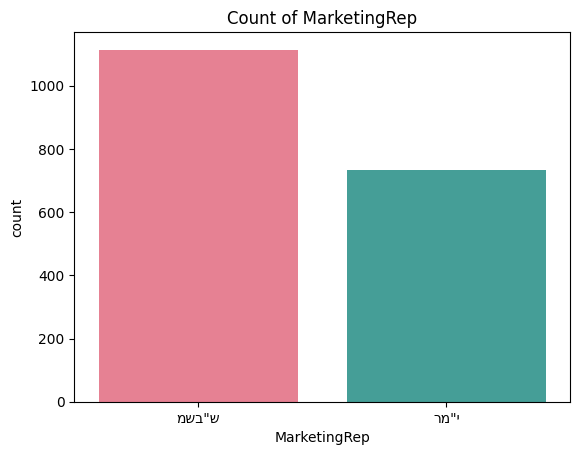

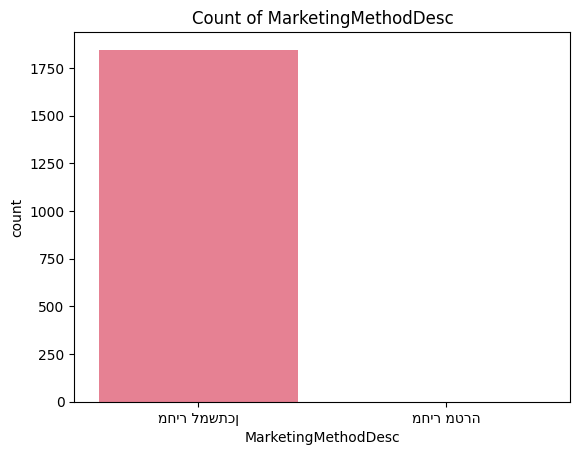

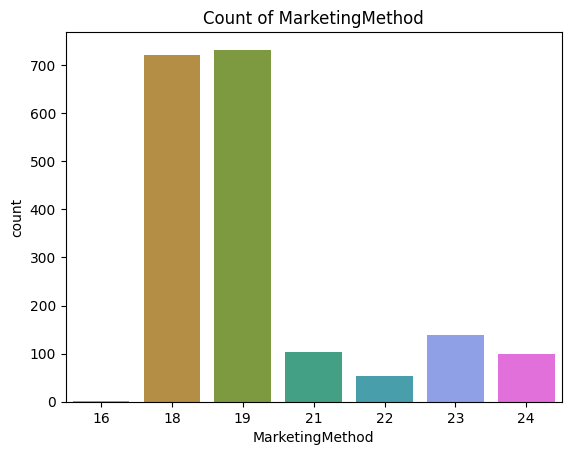

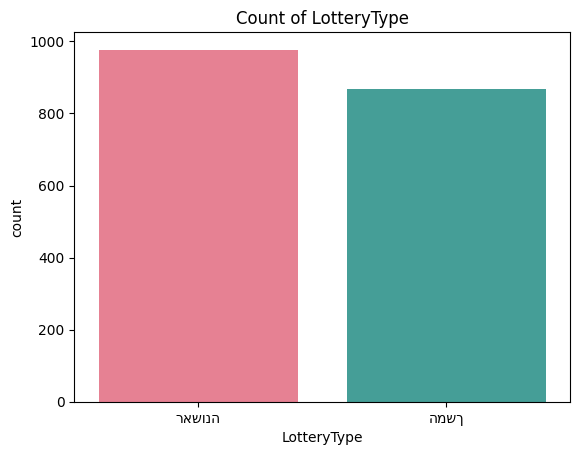

In [59]:
plot_everything(no_outliers)

## handle object outliers

In [60]:
#almost only 1 specific value
no_outliers=no_outliers.drop('MarketingMethodDesc',axis=1)

In [61]:
no_outliers['LotteryStatusValue'].value_counts()

LotteryStatusValue
פורסמו תוצאות               1818
חידוש הרשמה במשרדי הקבלן      28
Name: count, dtype: int64

In [62]:
no_outliers=no_outliers.drop('LotteryStatusValue',axis=1)

In [63]:
no_outliers['ProjectStatus'].value_counts()

ProjectStatus
בחירת דירות        909
בתהליכי הגרלה      853
בקרת חוזים          82
בקרה לאחר אכלוס      2
Name: count, dtype: int64

In [64]:
no_outliers=no_outliers.drop(no_outliers[no_outliers['ProjectStatus']=='בקרה לאחר אכלוס'].index)

In [65]:
no_outliers['ConstructionPermitName'].value_counts()

ConstructionPermitName
היתר מלא                                  1308
החלטת ועדה (היתר בתנאים)                   240
טרם הוגשה בקשה                             216
היתר מלא לחלק מהמגרשים                      70
החלטת ועדה (היתר בתנאים) לחלק מהמגרשים       7
הוגשה בקשה                                   3
Name: count, dtype: int64

In [66]:
no_outliers=no_outliers.drop(no_outliers[no_outliers['ConstructionPermitName']=='הוגשה בקשה'].index)
no_outliers=no_outliers.drop(no_outliers[no_outliers['ConstructionPermitName']=='החלטת ועדה (היתר בתנאים) לחלק מהמגרשים'].index)

In [67]:
len(no_outliers)/len(data)

0.8061538461538461

# Feature Engeneering

### new column which represent the number of days between the end of singnup the the lottery execution date

In [68]:
# Ensure both columns are in datetime format
no_outliers['LotteryExecutionDate'] = pd.to_datetime(no_outliers['LotteryExecutionDate'])
no_outliers['LotteryEndSignupDate'] = pd.to_datetime(no_outliers['LotteryEndSignupDate'])

# Calculate the difference in days
no_outliers['num_of_days_between'] = (no_outliers['LotteryExecutionDate'] - no_outliers['LotteryEndSignupDate']).dt.days


### lotteries happened before sing up date is over for over then 50%!

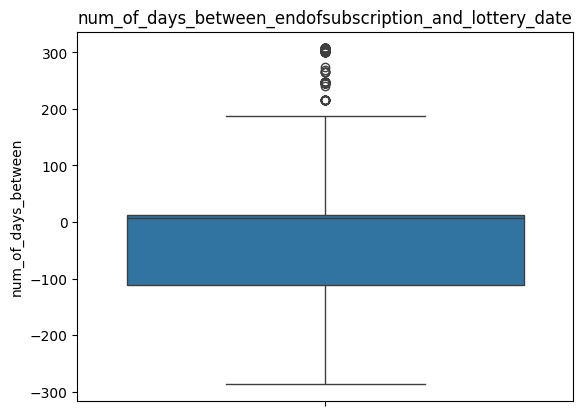

In [69]:
#we can see that most of the lotteries been done before the Endsignup dates
sns.boxplot(data=no_outliers,y='num_of_days_between')
plt.title('num_of_days_between_endofsubscription_and_lottery_date')
plt.show()

In [70]:
#it might cause because over subscription rate, lets check that:
no_outliers['OversubscriptionRate'] = no_outliers['Subscribers'] / no_outliers['LotteryHousingUnits']

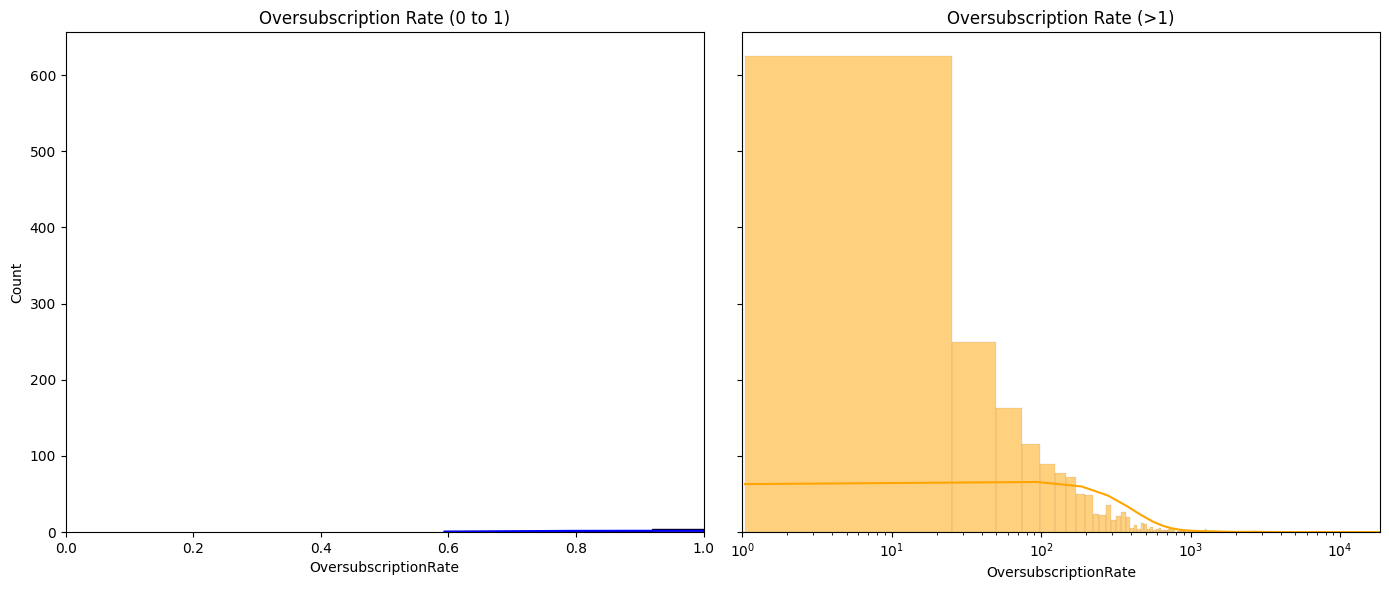

In [71]:
# Create two subsets based on the OversubscriptionRate values
below_one = no_outliers[no_outliers['OversubscriptionRate'] <= 1]
above_one = no_outliers[no_outliers['OversubscriptionRate'] > 1]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot the distribution for values between 0 and 1
sns.histplot(data=below_one, x='OversubscriptionRate', kde=True, ax=axes[0], color="blue")
axes[0].set_title('Oversubscription Rate (0 to 1)')
axes[0].set_xlim(0, 1)

# Plot the distribution for values above 1
sns.histplot(data=above_one, x='OversubscriptionRate', kde=True, ax=axes[1], color="orange")
axes[1].set_title('Oversubscription Rate (>1)')
axes[1].set_xlim(1, above_one['OversubscriptionRate'].max())
axes[1].set_xscale('log')
# Display the plots
plt.tight_layout()
plt.show()



### we can clearly see that we have way too many subscribers that might cause the date of the lottery to be before the signupdate ends

### we are going to predict if we will have houses left after a lottery or not, this is an importent prediction which will indicate if that will happen and what are the couses for that:
### first i will plot a time plot of the winners and the houses we have for each lottery

In [72]:
# Group by month and calculate the sum of relevant columns
monthly_data = (
    no_outliers.groupby(no_outliers['LotteryExecutionDate'].dt.to_period('M'))[[ 'Winners', 'LotteryHousingUnits']]
    .sum()
    .reset_index()
)
monthly_data['LotteryExecutionDate'] = monthly_data['LotteryExecutionDate'].dt.to_timestamp()

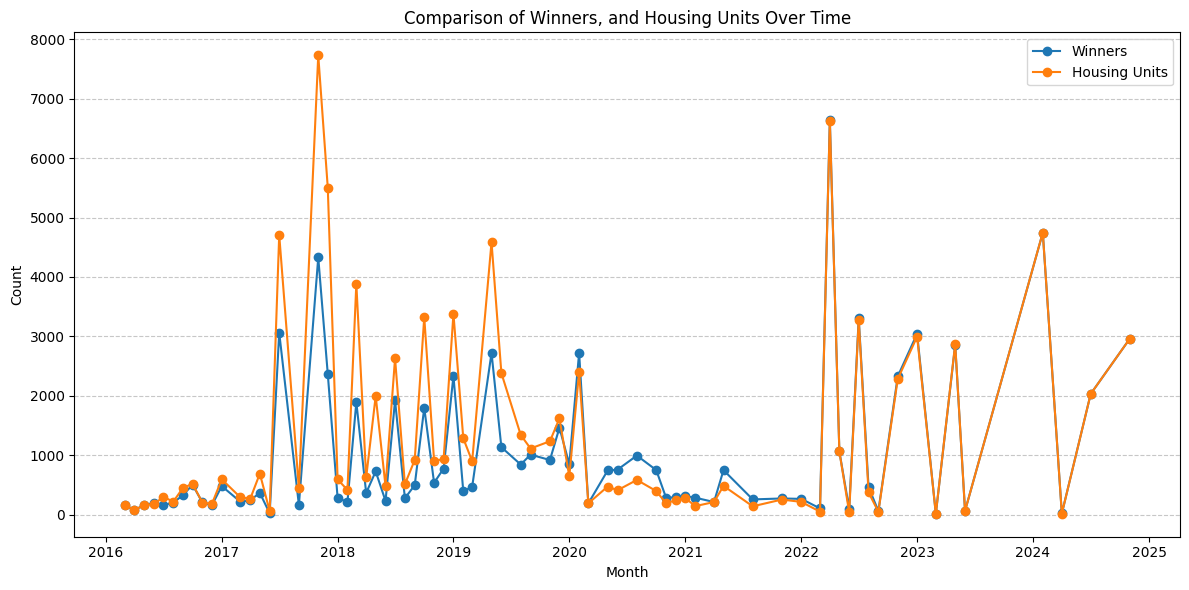

In [73]:
# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['LotteryExecutionDate'], monthly_data['Winners'], label='Winners', marker='o')
plt.plot(monthly_data['LotteryExecutionDate'], monthly_data['LotteryHousingUnits'], label='Housing Units', marker='o')

# Add labels, title, and legend
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Comparison of Winners, and Housing Units Over Time')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('winners_and_housing_units_trends.png', dpi=300)  # שמירה כקובץ PNG

# Show the plot
plt.show()


overall we can see that the numbers are close. however we can see that in the past we had way more houses left then today which can indicate that year might affect the model

In [74]:
df_model=no_outliers.copy()

In [75]:
#building new column of (is there any houses left after the lottery (1=yes,0=no)):
lily=[]
for i in df_model.index:
    if df_model.loc[i,'Winners']>=df_model.loc[i,'LotteryHousingUnits']:
        lily.append(0)
    else:
        lily.append(1)
df_model['is_house_left']  =lily  

is house left is our target column for the supervised model

In [76]:
df_model['month'] = df_model['LotteryExecutionDate'].dt.month
df_model['year'] = df_model['LotteryExecutionDate'].dt.year

In [77]:
df_model.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners', 'SubscribersSeriesC',
       'SubscribersSeriesB', 'SubscribersSeriesA', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'is_house_left', 'month', 'year'],
      dtype='object')

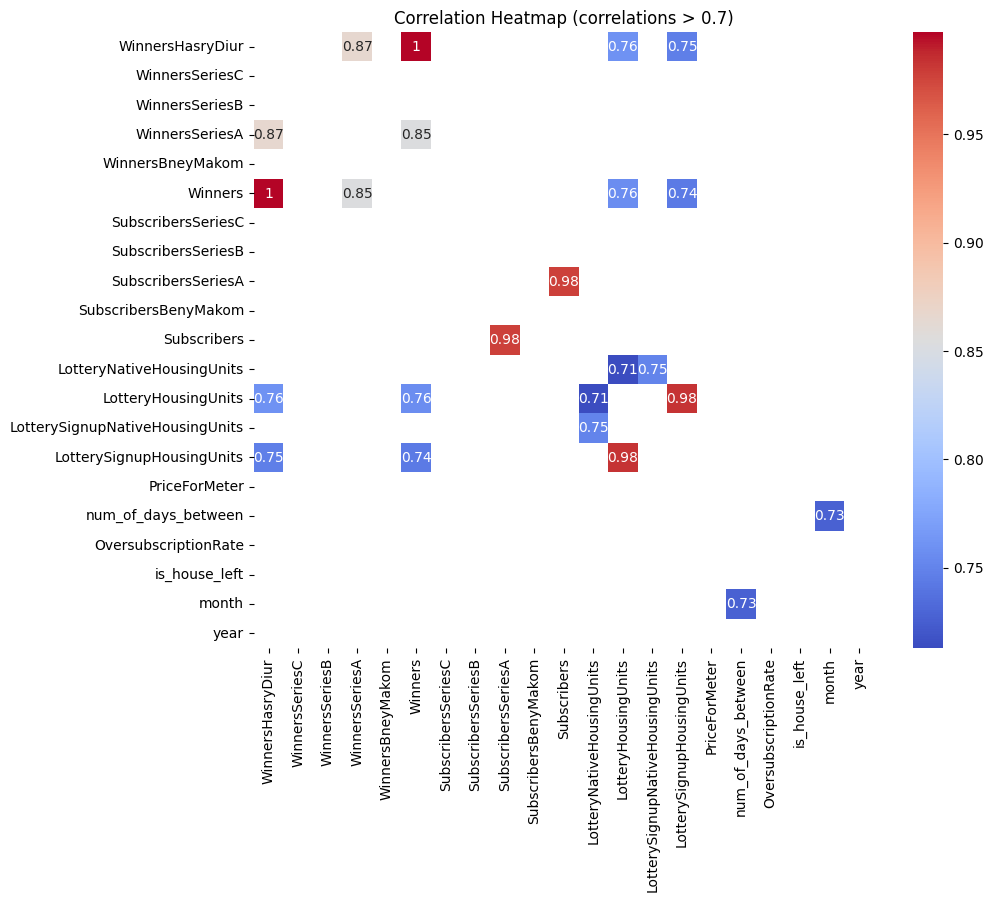

In [78]:
num_cols=df_model.select_dtypes(include=[np.number]).columns
# Compute the correlation matrix
corr_matrix = df_model[num_cols].corr()

# Filter correlations greater than 0.8
filtered_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1)]

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull(), cbar=True)
plt.title("Correlation Heatmap (correlations > 0.7)")
plt.show()


In [79]:
#dropping the columns we sayed at the beggining or columns with high correlation to different columns
df_model=df_model.drop(['WinnersHasryDiur','WinnersBneyMakom','Winners','SubscribersBenyMakom','Subscribers','LotterySignupNativeHousingUnits','LotterySignupHousingUnits','OversubscriptionRate'],axis=1)

In [80]:
#drop the dates columns:
df_model=df_model.drop(['LotteryExecutionDate','LotteryEndSignupDate'],axis=1)

In [81]:
df_model.columns

Index(['WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA',
       'SubscribersSeriesC', 'SubscribersSeriesB', 'SubscribersSeriesA',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits', 'PriceForMeter',
       'ConstructionPermitName', 'ProjectStatus', 'ProviderName',
       'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName', 'LamasCode',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between', 'is_house_left',
       'month', 'year'],
      dtype='object')

# Prediction model

In [82]:
def optimize_and_convert(df):
    # המרת עמודות קטגוריאליות לקטגוריות
    for col in df.select_dtypes(include=['object']).columns:
        if col!= 'chance_of_winning_category':
            if df[col].nunique() == len(df):  # עמודה עם ערכים ייחודיים לכל שורה
                df = df.drop(columns=[col])
            else:
                df[col] = df[col].astype('category')

    

    # המרת דאמיז
    df_dummies = pd.get_dummies(df, drop_first=True)
    for col in df_dummies.select_dtypes(include=[bool]).columns:
        df_dummies[col] = df_dummies[col].astype(int)
    
        
    
    
    # מחזיר את הדאטה עם רשימת שמות העמודות
    return df_dummies, df_dummies.columns

In [83]:
df_model,df_model_cols=optimize_and_convert(df_model)

In [84]:
def build_and_train_model(X, y, save_path=None):
    """
    בונה מודל, מאמן אותו ומחזיר את המודל הטוב ביותר יחד עם שמות הפיצ'רים והדיוק שלו.
    אם save_path נמסר, השווה את הגרף לכונן.
    """
    # חלוקה לסטים של אימון ובדיקה
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    best_model = None
    best_score = 0
    
    # הגדרת המודלים האפשריים לקלאסיפיקציה
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "XGBClassifier": XGBClassifier(),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GaussianNB": GaussianNB(),
        "MLPClassifier": MLPClassifier(max_iter=500)  # רשת עצבית בסיסית
    }

    accuracy_scores = {}  # לדירוג הדיוק של כל מודל

    # אימון ובדיקת כל מודל
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        accuracy_scores[model_name] = accuracy
        
        # שמירה במודל הטוב ביותר
        if accuracy > best_score:
            best_model = model
            best_score = accuracy

    # הצגת גרף השוואת דיוק
    plt.figure(figsize=(10, 6))
    plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # אם נתיב שמירה נמסר, נשמור את הגרף לקובץ
    if save_path:
        plt.savefig(save_path)  # שמירה לקובץ
        print(f"Graph saved to {save_path}")

    # הצגת הגרף
    plt.show()

    return best_model, best_score, accuracy_scores

In [85]:
df_model.columns

Index(['WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA',
       'SubscribersSeriesC', 'SubscribersSeriesB', 'SubscribersSeriesA',
       'LotteryNativeHousingUnits', 'LotteryHousingUnits', 'PriceForMeter',
       'num_of_days_between',
       ...
       'CentralizationType_יולי 2022', 'CentralizationType_יוני 2017',
       'CentralizationType_ינואר 2020', 'CentralizationType_מרץ 2018',
       'CentralizationType_מרץ 2019', 'CentralizationType_ספטמבר 2017',
       'CentralizationType_ספטמבר 2018', 'CentralizationType_ספטמבר 2019',
       'CentralizationType_פברואר 2020', 'LotteryType_ראשונה'],
      dtype='object', length=2276)

#### we will drop the winner columns because they wont help us for future predictions (we dont have the winners in the future

In [86]:
X=df_model.drop(['is_house_left','WinnersSeriesC', 'WinnersSeriesB', 'WinnersSeriesA'],axis=1)
y=df_model['is_house_left']

In [87]:
# שמירת שמות העמודות המקוריים
original_columns = X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])]

# נרמול הנתונים
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# המרת המערך חזרה ל-DataFrame עם שמות העמודות
X = pd.DataFrame(X_normalized, columns=original_columns)


Graph saved to model results.png


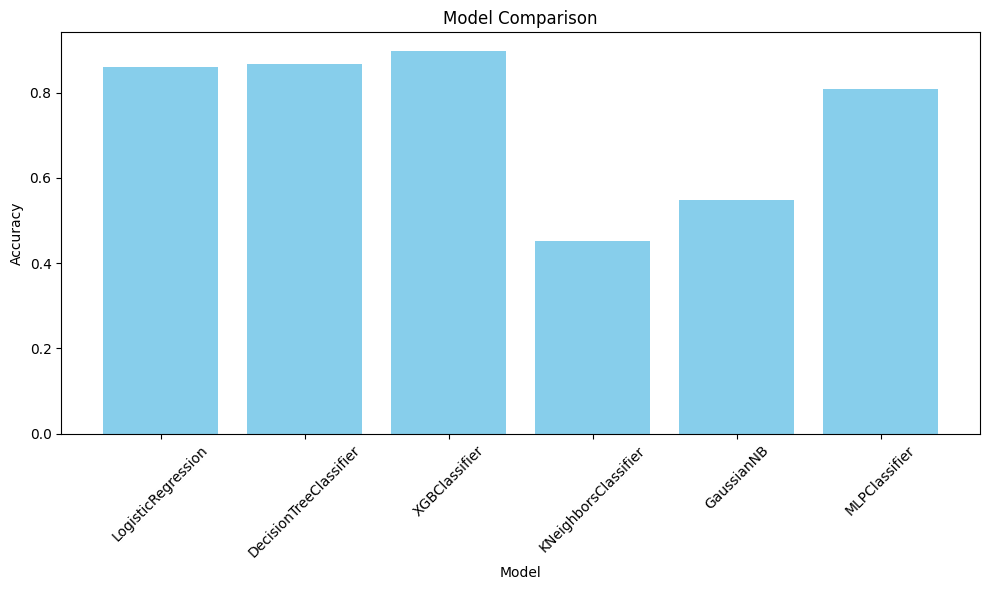

In [88]:
best_model, best_score, accuracy_scores = build_and_train_model(X, y,'model results.png')

In [89]:
# הדפסת התוצאות
print(f"Best Model: {type(best_model).__name__}")
print(f"Accuracy of the Best Model: {best_score:.2f}")

Best Model: XGBClassifier
Accuracy of the Best Model: 0.90


In [90]:
def explain_model_with_shap(model, X):
    """
    ניתוח SHAP עם גרפים נוספים והסבר האם כל פיצ'ר דוחף לכיוון 1 או 0.
    """
    try:
        # אם מדובר במודל שיכול להשתמש ב-TreeExplainer (מודלים מבוססי עצים)
        if isinstance(model, (DecisionTreeClassifier, RandomForestClassifier, XGBClassifier)):
            explainer = shap.TreeExplainer(model, feature_perturbation='interventional')
            shap_values = explainer.shap_values(X)

            
            # אם מדובר בסיווג בינארי, shap_values יהיה ערך יחיד.
            # אם מדובר בסיווג מרובה קטגוריות, shap_values יהיה רשימה של ערכים לכל מחלקה.
            if isinstance(shap_values, list):
                # במקרה של סיווג מרובה קטגוריות, אנחנו לוקחים את הערכים עבור כל מחלקה.
                shap_values = np.array(shap_values).mean(axis=0)

            # גרף סיכום SHAP
            print("גרף סיכום SHAP:")
            plt.figure(figsize=(8, 5))
            shap.summary_plot(shap_values, X, show=False)
            plt.tight_layout()
            plt.subplots_adjust(left=0.1)
            plt.show()

            # גרף ברים SHAP
            print("גרף ברים של ערכי SHAP:")
            plt.figure(figsize=(8, 5))
            shap.summary_plot(shap_values, X, plot_type="bar", show=False)
            plt.tight_layout()
            plt.subplots_adjust(left=0.1)
            plt.show()

            # סיכום טקסטואלי של החשיבות והכיוון
            mean_shap_values = np.abs(shap_values).mean(axis=0)
            importance_df = pd.DataFrame({
                "Feature": X.columns,
                "Mean SHAP Value": mean_shap_values
            }).sort_values(by="Mean SHAP Value", ascending=False)

            print("\n5 הפיצ'רים החשובים ביותר לפי SHAP והכיוון שלהם:")
            for i, row in importance_df.head(5).iterrows():
                feature = row['Feature']
                mean_value = row['Mean SHAP Value']      
                print(f"פיצ'ר: {feature}, ערך SHAP ממוצע: {mean_value:.4f}")

        # אם מדובר במודל לוגיסטי או רשת עצבית, ניתן להשתמש ב-`KernelExplainer`
        elif isinstance(model, (LogisticRegression, KNeighborsClassifier, GaussianNB, MLPClassifier)):
            explainer = shap.KernelExplainer(model.predict_proba, X)
            shap_values = explainer.shap_values(X)
            
            # גרף סיכום SHAP
            print("גרף סיכום SHAP:")
            plt.figure(figsize=(8, 5))
            shap.summary_plot(shap_values, X, show=False)
            plt.tight_layout()
            plt.subplots_adjust(left=0.1)
            plt.show()

            # גרף ברים SHAP
            print("גרף ברים של ערכי SHAP:")
            plt.figure(figsize=(8, 5))
            shap.summary_plot(shap_values, X, plot_type="bar", show=False)
            plt.tight_layout()
            plt.subplots_adjust(left=0.1)
            plt.show()

            # סיכום טקסטואלי של החשיבות והכיוון
            mean_shap_values = np.abs(shap_values).mean(axis=0)
            importance_df = pd.DataFrame({
                "Feature": X.columns,
                "Mean SHAP Value": mean_shap_values
            }).sort_values(by="Mean SHAP Value", ascending=False)

            print("\n5 הפיצ'רים החשובים ביותר לפי SHAP והכיוון שלהם:")
            for i, row in importance_df.head(5).iterrows():
                feature = row['Feature']
                mean_value = row['Mean SHAP Value']      
                print(f"פיצ'ר: {feature}, ערך SHAP ממוצע: {mean_value:.4f}")

    except Exception as e:
        print(f"שגיאה ביצירת ניתוח SHAP: {e}")





גרף סיכום SHAP:


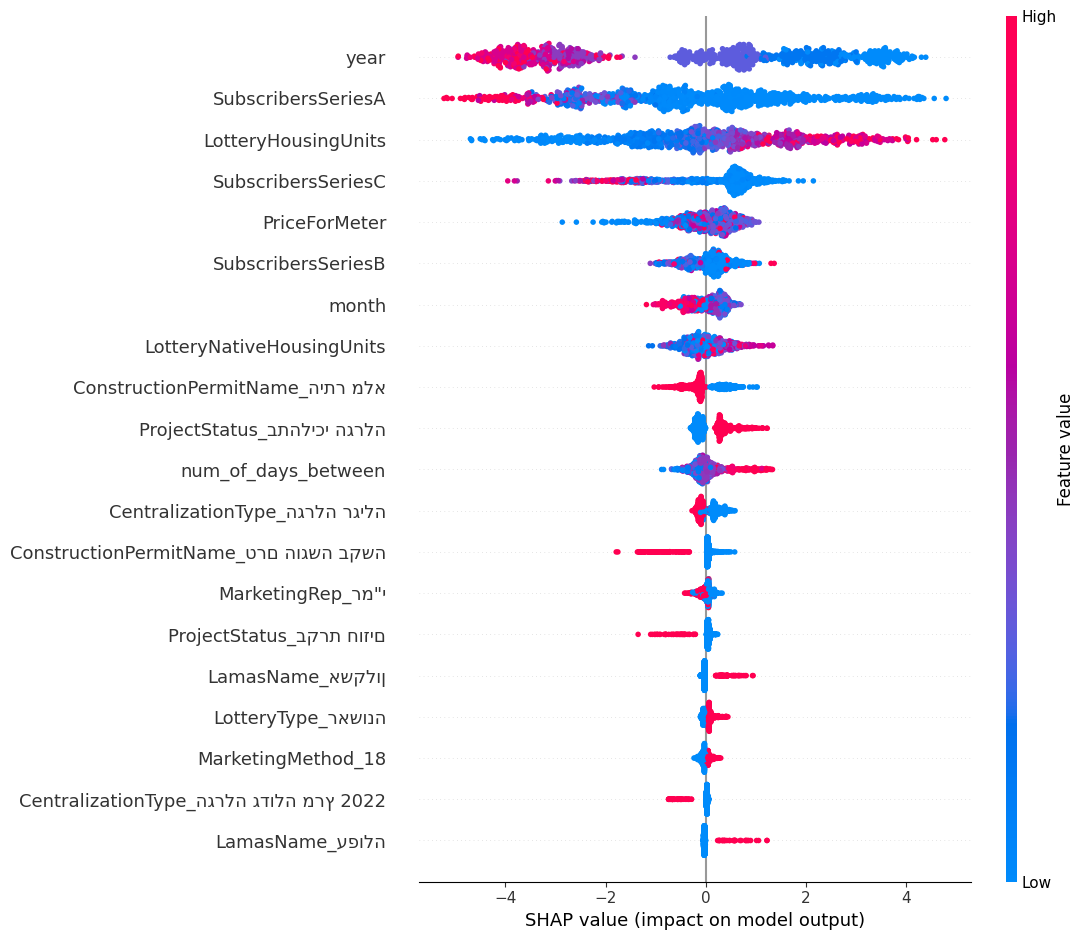

גרף ברים של ערכי SHAP:


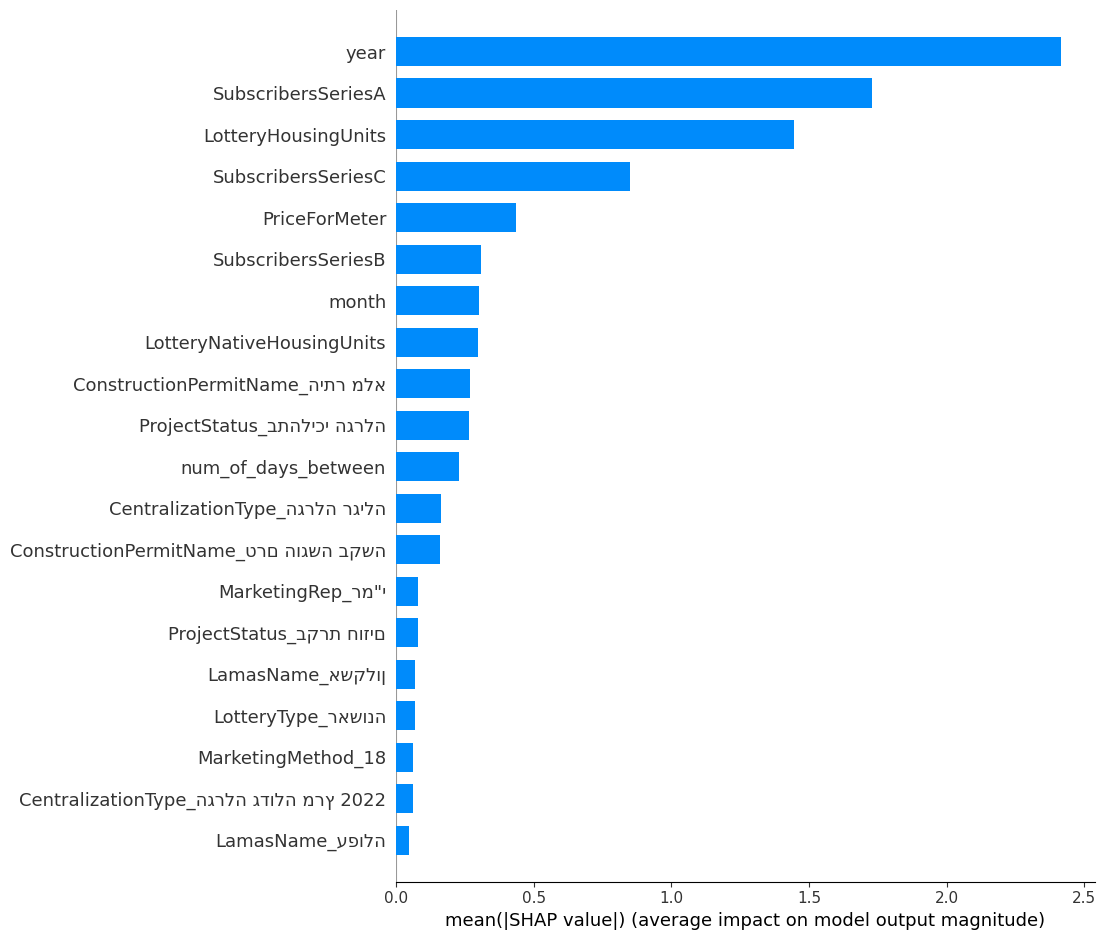


5 הפיצ'רים החשובים ביותר לפי SHAP והכיוון שלהם:
פיצ'ר: year, ערך SHAP ממוצע: 2.4172
פיצ'ר: SubscribersSeriesA, ערך SHAP ממוצע: 1.7300
פיצ'ר: LotteryHousingUnits, ערך SHAP ממוצע: 1.4451
פיצ'ר: SubscribersSeriesC, ערך SHAP ממוצע: 0.8496
פיצ'ר: PriceForMeter, ערך SHAP ממוצע: 0.4352


In [91]:
X_sample = X.sample(1000)  # דוגמת 1000 רשומות בלבד
explain_model_with_shap(best_model, X_sample)


### הסבר על הגרף הראשון

הגרף הראשון מציג את מידת ההשפעה של כל פיצר על ערך החיזוי
ראשית כל שורה מדברת על פיצר מסויים
כל נקודה מדברת על דגימה מסויימת
צבע הנקודה מצביע על ערך הפיצר (לדוגמא במשתנים קטגוריאלים אדום זה 1 וכחול זה 0)
המיקום על ציר האיקס מצביע על כמה זה תרם לגדילה (בכיוון ימין) או לדעיכה (בכיוון שמאל) של ערך החיזוי.
לדוגמא אפשר לראות מהגרף שהשנה משפיעה ביחס הפוך על הסיכוי שישארו דירות ריקות-זאת אומרת שככל שערך הפיצר גדול יותר (אדום) כך הסיכוי שישארו דירות ריקות קטן יותר

# Clustering

## feature engeneering for the clustering

In [92]:
no_outliers.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners', 'SubscribersSeriesC',
       'SubscribersSeriesB', 'SubscribersSeriesA', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'LotteryExecutionDate', 'LotteryEndSignupDate',
       'Eligibility', 'MarketingRep', 'MarketingMethod', 'CentralizationType',
       'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate'],
      dtype='object')

In [93]:
new_data=no_outliers

In [94]:
# המרת העמודה 'LotteryExecutionDate' לפורמט תאריך
new_data['LotteryExecutionDate'] = pd.to_datetime(new_data['LotteryExecutionDate'])

# קביעת תאריך ההגרלה האחרון
end_date = new_data['LotteryExecutionDate'].max()
# חישוב הימים מאז ההגרלה האחרונה
new_data['days_since_end'] = (end_date - new_data['LotteryExecutionDate']).dt.days

In [95]:
new_data=new_data.drop(['LotteryExecutionDate','LotteryEndSignupDate'],axis=1)

In [96]:
new_data.columns

Index(['WinnersHasryDiur', 'WinnersSeriesC', 'WinnersSeriesB',
       'WinnersSeriesA', 'WinnersBneyMakom', 'Winners', 'SubscribersSeriesC',
       'SubscribersSeriesB', 'SubscribersSeriesA', 'SubscribersBenyMakom',
       'Subscribers', 'LotteryNativeHousingUnits', 'LotteryHousingUnits',
       'LotterySignupNativeHousingUnits', 'LotterySignupHousingUnits',
       'PriceForMeter', 'ConstructionPermitName', 'ProjectStatus',
       'ProviderName', 'ProjectName', 'ProjectId', 'Neighborhood', 'LamasName',
       'LamasCode', 'Eligibility', 'MarketingRep', 'MarketingMethod',
       'CentralizationType', 'LotteryType', 'LotteryId', 'num_of_days_between',
       'OversubscriptionRate', 'days_since_end'],
      dtype='object')

non importent columns for the clustering

In [97]:
new_data=new_data.drop(['LotteryId','Neighborhood','ProjectId','ProviderName','ConstructionPermitName','CentralizationType'],axis=1)

In [98]:
# 1. Encoding לנתונים קטגוריאליים
encoded_data = pd.get_dummies(new_data)

# 2. נרמול הנתונים
scaler = StandardScaler()
normalized_data = scaler.fit_transform(encoded_data)

visualization with T-sne

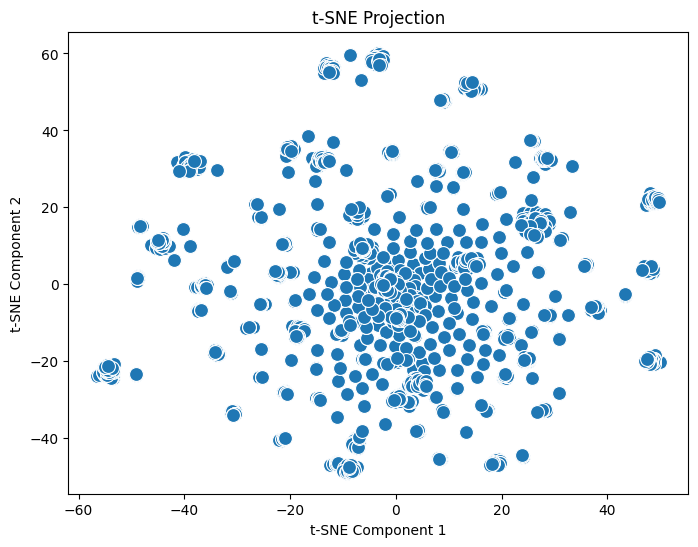

In [99]:
# 1. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_data = tsne.fit_transform(normalized_data)

# 2. גרף תוצאות
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], s=100)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


## The models we will compare is K-Means,GaussianMixture,AgglomerativeClustering,Birch

### for each algoritm we will find the optimal parameters and will run the algoritm with the optimal parameters

### compering the models:

Best parameters for KMeans: {'n_clusters': 2}
Best parameters for Gaussian Mixture: {'n_components': 2}
Best parameters for Agglomerative Clustering: {'n_clusters': 2}
Best parameters for birch: {'n_clusters': 2}


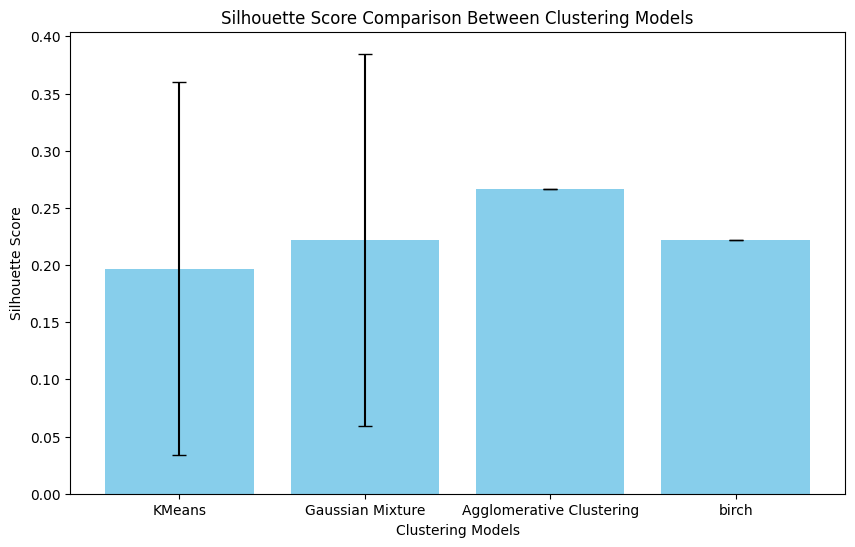

The best model is Agglomerative Clustering with score: 0.26616068767707
Best parameters: {'n_clusters': 2}


In [100]:
# פרמטרים אופטימליים עבור כל מודל, נבצע חיפוש פרמטרים על מנת למצוא את הטובים ביותר
optimal_params = {
    "KMeans": {"n_clusters": [2, 3, 4, 5, 6]},  
    "Gaussian Mixture": {"n_components": [2, 3, 4, 5]},  
    "Agglomerative Clustering": {"n_clusters": [2, 3, 4, 5, 6]},  
    "birch": {"n_clusters": [2, 3, 4, 5]}  
}

# מודלים להשוואה
models = {
    "KMeans": KMeans(),
    "Gaussian Mixture": GaussianMixture(),
    "Agglomerative Clustering": AgglomerativeClustering(),
    "birch": Birch()
}

# הגדרת פונקציית Scorer לחישוב Silhouette Score
silhouette_scorer = make_scorer(silhouette_score, metric='euclidean')

# חישוב silhouette score לכל מודל עם הרצה מספר פעמים
sil_scores = {}
sil_mean = {}
sil_std = {}

best_model = None
best_model_name = None
best_params = None
best_score = -1  # נתחיל עם ערך קטן כדי למצוא את המודל הכי טוב

for model_name, model in models.items():
    # ביצוע חיפוש פרמטרים אופטימליים
    grid_search = GridSearchCV(model, optimal_params[model_name], cv=3, scoring=silhouette_scorer)
    grid_search.fit(normalized_data)
    
    best_model_params = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_model_params}")
    
    # הגדרת המודל עם הפרמטרים האופטימליים
    model.set_params(**best_model_params)

    # הרצת המודל מספר פעמים ושמירת ה-Silhouette Score
    scores = []
    for _ in range(10):  # הרצה 10 פעמים
        labels = model.fit_predict(normalized_data)
        score = silhouette_score(normalized_data, labels)
        scores.append(score)

    sil_scores[model_name] = scores
    sil_mean[model_name] = np.mean(scores)
    sil_std[model_name] = np.std(scores)

    # בדיקת המודל עם ה-Silhouette Score הכי גבוה
    if sil_mean[model_name] > best_score:
        best_score = sil_mean[model_name]
        best_model = model
        best_model_name = model_name
        best_params = best_model_params

# הצגת התוצאות בגרף
plt.figure(figsize=(10, 6))

# ציור התוצאות עבור כל המודלים
for model_name, mean_score in sil_mean.items():
    plt.bar(model_name, mean_score, yerr=sil_std[model_name], color='skyblue', capsize=5)

plt.title("Silhouette Score Comparison Between Clustering Models")
plt.xlabel("Clustering Models")
plt.ylabel("Silhouette Score")
plt.show()

# הצגת המודל הכי טוב
print(f"The best model is {best_model_name} with score: {best_score}")
print(f"Best parameters: {best_params}")



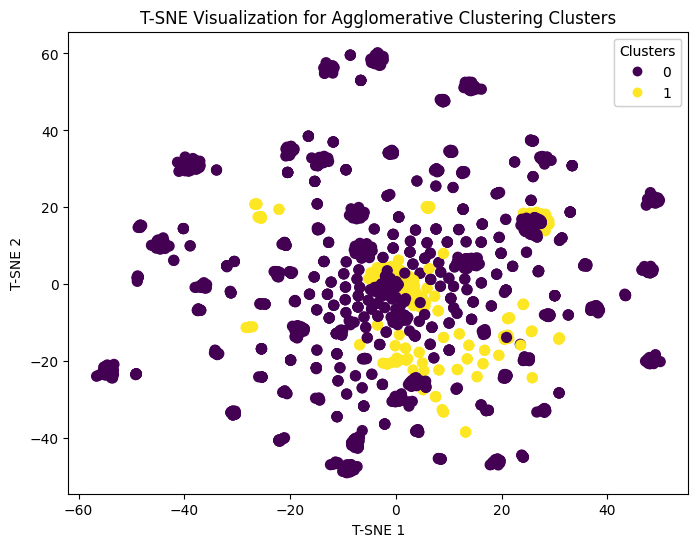

In [101]:
import matplotlib.colors as mcolors
# נניח שכבר יש לך את המודל הכי טוב עם הפרמטרים הכי טובים
# (best_model, best_model_name, best_params, best_score)

# הרצת המודל עם הנתונים הנורמליים
labels = best_model.fit_predict(normalized_data)

# הפחתת ממדים באמצעות T-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(normalized_data)

# יצירת גרף T-SNE
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', s=50)

# הוספת כותרת ותגיות לצירים
plt.title(f"T-SNE Visualization for {best_model_name} Clusters")
plt.xlabel("T-SNE 1")
plt.ylabel("T-SNE 2")

# הצגת מקרא עם צבעים המתאימים לכל קלאסטר
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)


# הקצאת הצבעים לקטגוריות
unique_labels = np.unique(labels)
cmap = plt.cm.viridis  # השתמש ב-colormap שאתה משתמש בו ב-T-SNE

# שמירה על הצבעים שמוקצים לכל קלאסטר
colors = [cmap(label / len(unique_labels)) for label in unique_labels]

# המרת הצבעים לערכים HEX
hex_colors = [mcolors.rgb2hex(color) for color in colors]


# הצגת הגרף
plt.show()



In [102]:
hex_colors

['#440154', '#21918c']

### feature importence on the clustering

In [103]:
normalized_df = pd.DataFrame(normalized_data, columns=encoded_data.columns)

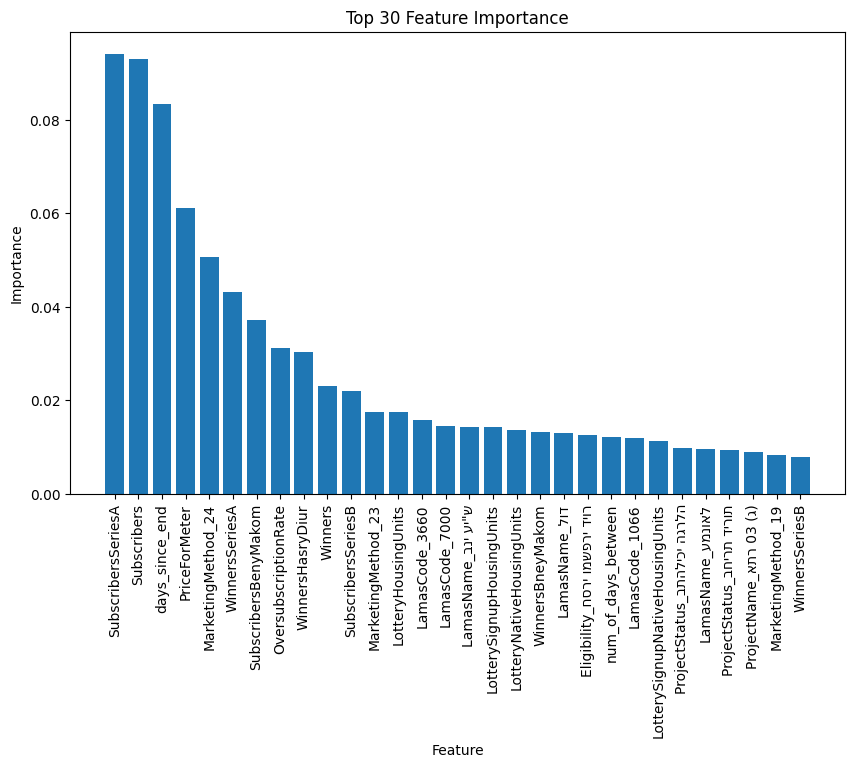

In [104]:
# שימוש ב-Random Forest כדי לחשב את ה-feature importance
X = normalized_df  # הנתונים שלך
y = labels  # הקלאסטרים שהתקבלו

# חצי מהנתונים לאימון וחצי לבדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# אימון המודל
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# הוצאת ה-feature importance
importances = rf.feature_importances_

# סדר את התכונות לפי החשיבות
indices = importances.argsort()[::-1]

# הצגת ה-10 פיצ'רים הכי משפיעים
top_n = 30
plt.figure(figsize=(10, 6))
plt.title(f"Top {top_n} Feature Importance")
plt.bar(range(top_n), importances[indices][:top_n], align="center")
plt.xticks(range(top_n), [X.columns[i] for i in indices[:top_n]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


נתמקד בהשוואות סטטיסטיות בין ה4 פיצרים הכי משפיעים על החלוקה על מנת להציג תובנות משום שהם הכי משפיעים בפער


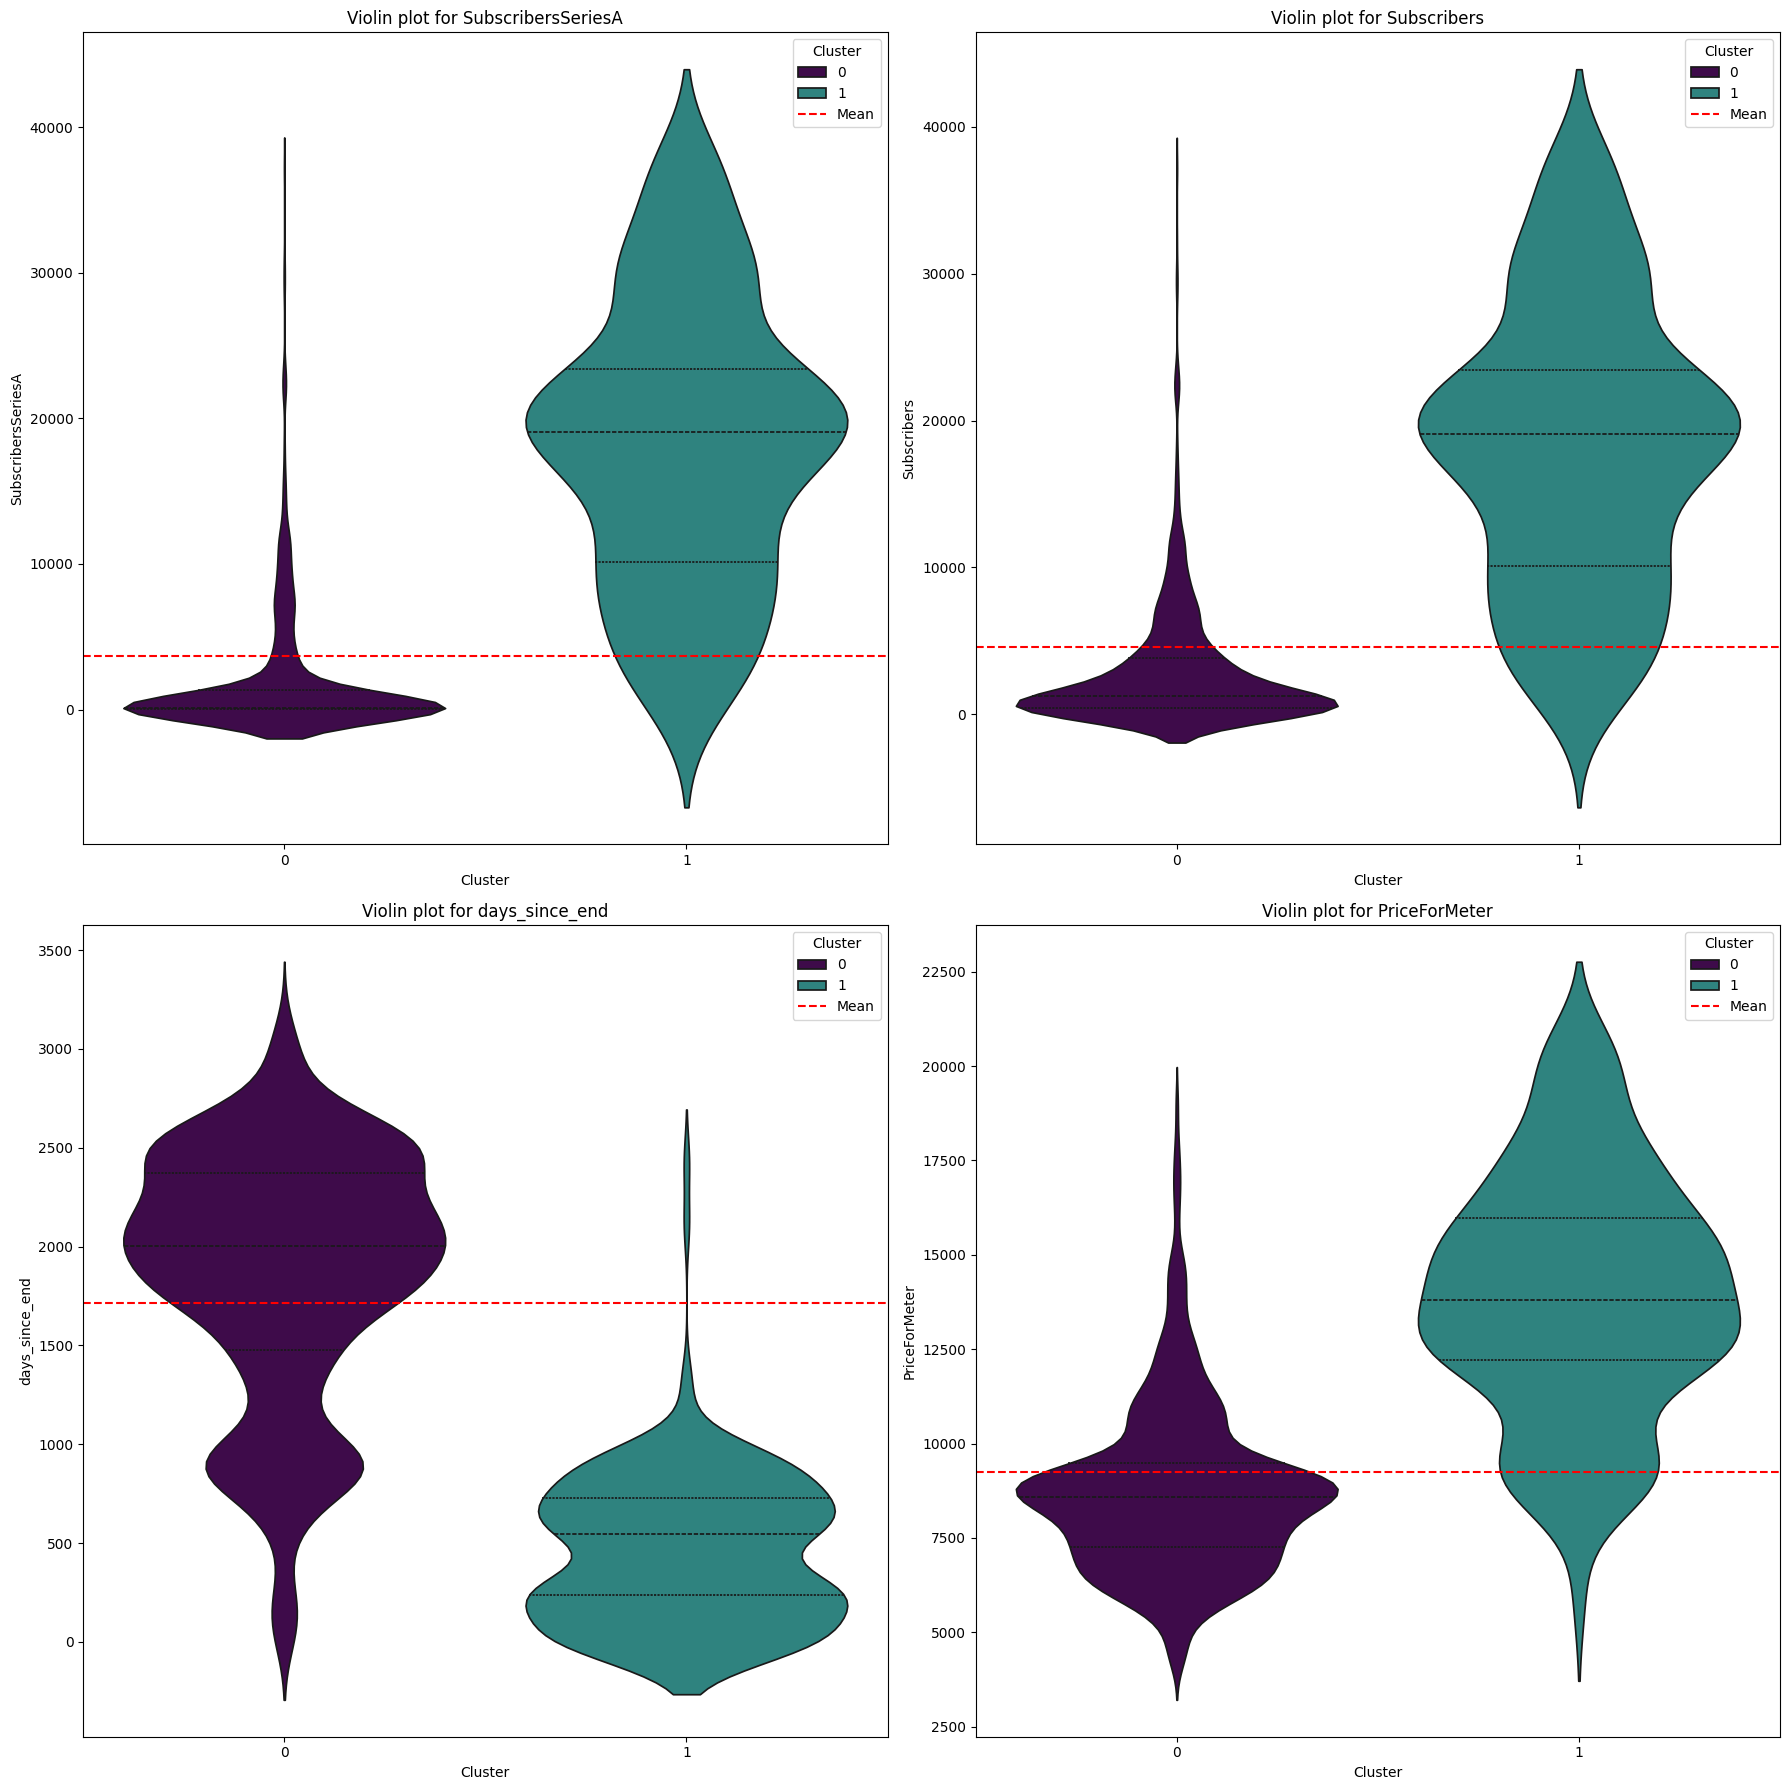

In [105]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE

# נניח ש-`labels` הם הקלאסטרים ו-`tsne_results` הם תוצאות ה-T-SNE
# הקצאת הצבעים לקלאסטרים
unique_labels = np.unique(labels)
cmap = plt.cm.viridis  # השתמש ב-colormap שאתה משתמש בו ב-T-SNE

# שמירה על הצבעים המוקצים לכל קלאסטר
colors = [cmap(label / len(unique_labels)) for label in unique_labels]

# המרת הצבעים לערכים HEX
hex_colors = [mcolors.rgb2hex(color) for color in colors]

# עכשיו תוכל להשתמש ב-hex_colors בגרפים שלך
# בחר את 4 הפיצ'רים הכי חשובים
top_features = [X.columns[i] for i in indices[:4]]

# הגדרת גרפים
plt.figure(figsize=(18, 18))

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    
    # אם הפיצ'ר הוא בינארי, השתמש בקאונטפלוט
    if encoded_data[feature].nunique() == 2:  # בודק אם הפיצ'ר הוא בינארי
        ax = sns.countplot(x=encoded_data[feature], hue=labels, palette=hex_colors)
        plt.title(f'Count plot for {feature}')
        plt.xlabel(f'{feature}')
        plt.ylabel('Count')
    
    # אם הפיצ'ר הוא מספרי, השתמש בויולין
    else:
        ax = sns.violinplot(x=labels, y=encoded_data[feature], inner="quart", hue=labels, 
                            palette=hex_colors)
        plt.axhline(encoded_data[feature].mean(), color='r', linestyle='--', label="Mean")
        plt.title(f'Violin plot for {feature}')
        plt.xlabel("Cluster")
        plt.ylabel(f'{feature}')
    
    # הוספת קלאסטרים ללגנד
    plt.legend(title="Cluster")

plt.tight_layout()
plt.show()




## T-test for the most importent features:

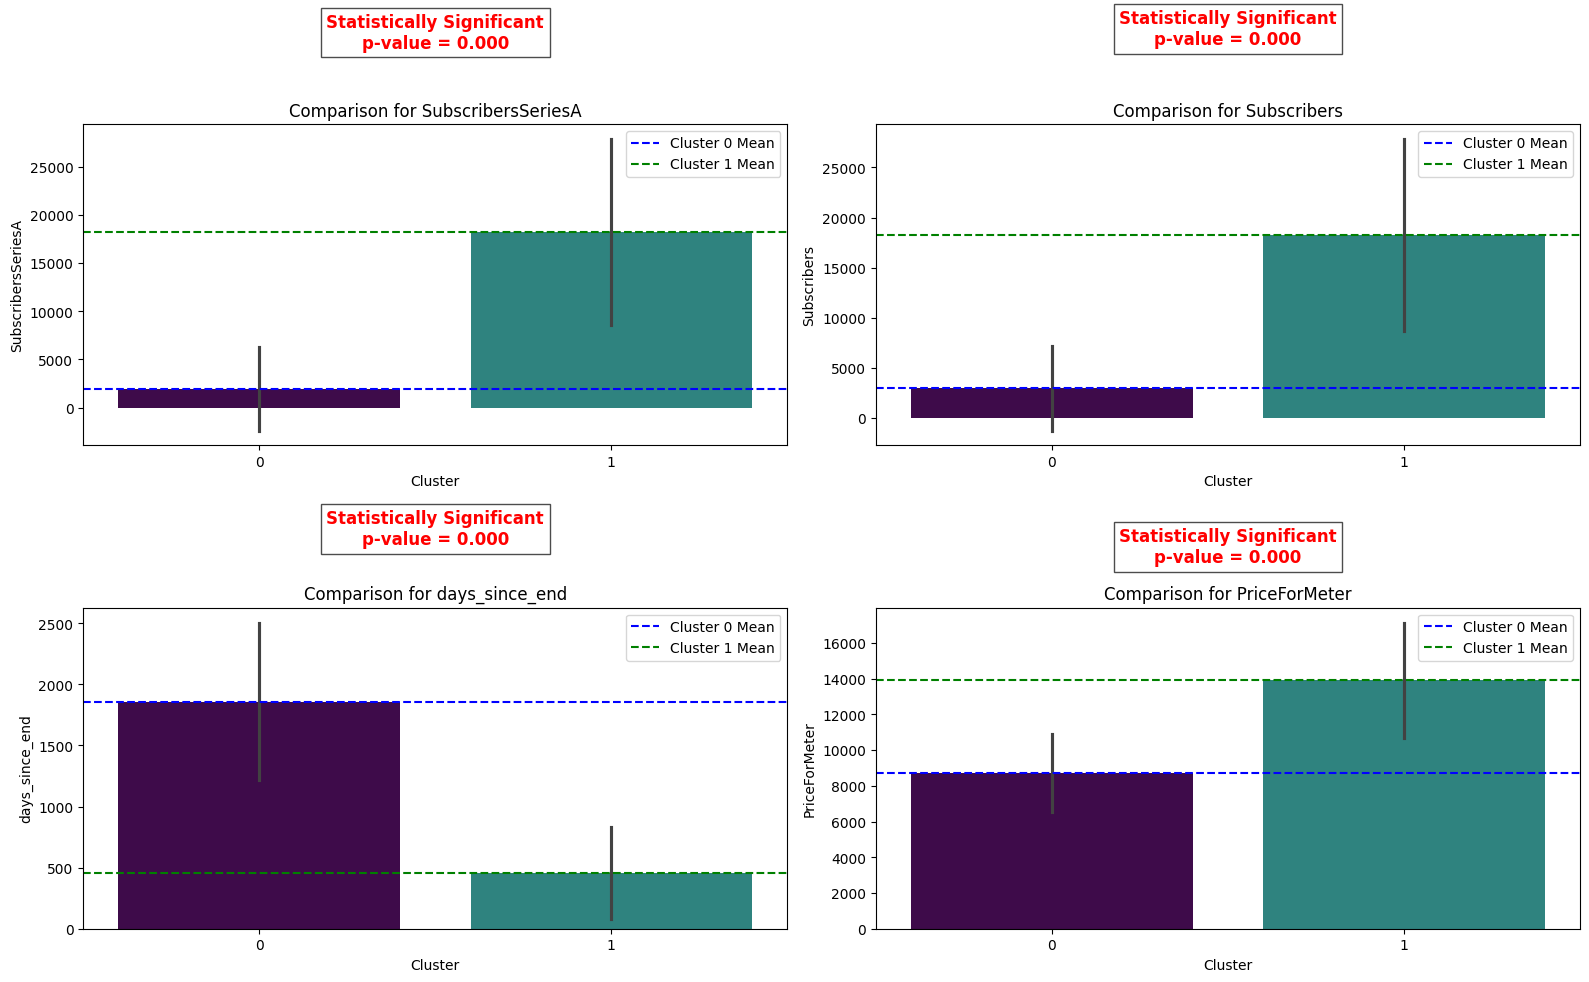

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# בחר את 4 הפיצ'רים הכי חשובים
top_features = [X.columns[i] for i in indices[:4]]

# יצירת רשימה לשמירת התוצאות של ה-T-test
ttest_results = {}

# יצירת גרף ברור
plt.figure(figsize=(16, 10))

for i, feature in enumerate(top_features):
    plt.subplot(2, 2, i+1)
    
    # חישוב ה-T-test עבור שני קלאסטרים
    cluster_0_data = encoded_data[labels == 0][feature]
    cluster_1_data = encoded_data[labels == 1][feature]
    
    # חישוב ה-T-test בין קלאסטר 0 ו-1
    t_stat, p_value = stats.ttest_ind(cluster_0_data, cluster_1_data)
    
    # שמירת התוצאות
    ttest_results[feature] = {'t-statistic': t_stat, 'p-value': p_value}
    
    # יצירת barplot של הממוצעים בקלאסטרים
    sns.barplot(x=labels, y=encoded_data[feature], ci="sd", palette=hex_colors)
    
    # הוספת קו הממוצע של כל קלאסטר
    plt.axhline(cluster_0_data.mean(), color='blue', linestyle='--', label=f"Cluster 0 Mean")
    plt.axhline(cluster_1_data.mean(), color='green', linestyle='--', label=f"Cluster 1 Mean")
    
    # הוספת כותרת ותגיות
    plt.title(f'Comparison for {feature}')
    plt.xlabel("Cluster")
    plt.ylabel(f'{feature}')
    
    # הוספת מובהקות סטטיסטית אם p-value נמוך מ-0.05
    if p_value < 0.05:
        plt.text(0.5, max(encoded_data[feature]), f'Statistically Significant\np-value = {p_value:.3f}', 
                 ha='center', color='red', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', alpha=0.7))

    # הצגת תוצאות המובהקות בגרף
    plt.legend()

plt.tight_layout()
plt.show()





## :תובנות ומסקנות

קודם כל ניתן לראות שאכן עבור הפיצרים הכי משפיעים יש הבדל סטטיסטי מובהק בממוצעים בין שני הקלאסטריים שלנו

קלאסטר 0: מדובר בקלאסטר של הגרלות פחות עדכניות אשר כמות הרשומים אליהן הייתה נמוכה ביחס להגרלות היותר עדכניות. הגרלות אלה מאופיינות גם במחירים זולים משמעותית ביחס להגרלות של הקלאסטר השני

קלאסטר 1: מדובר בהגרלות יחסית עדכניות שבוצעו אשר מחירם גבוה ביחס לקלאסטר 0 וכמות הנרשמים גבוהה משמעותית מהקלאסטר השני

קלאסטר 0:הגרלות ישנות וזולות שכמות הנרשמים אליה קטנה
קלאסטר 1: הגרלות עדכניות ויקרות שכמות הנרשמים אליהן גבוהה